In [1]:
%cd ~/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe_distro/
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import itertools
from scipy import stats

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt
import matplotlib
from statsmodels.stats.multitest import multipletests


# Say, "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


/Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe_distro


In [2]:
def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    end = 30*60
    
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        print('Working on: '+experiment)
        print(df.columns)
        end=end/60
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]

    print(df.columns)
    print(end)
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
        print('replicate.columns: %s'%str(replicate.columns))
        print('zero.columns: %s'%str(zero.columns))
        lines_1 = plt.plot(df[time], replicate, 'b')
        lines_3 = plt.plot(df[time], zero, 'k')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()
        
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
        norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
                   scale=np.std(zero,axis=1).values.reshape(-1,1))
        probability=norms.sf(replicate).T       
#         print(replicate)
#         print(probability)
        [plt.scatter(df[time], replicate[col], c=(probability[i]<0.05)) for i,col in enumerate(replicate.columns)]
        lines_1 = plt.plot(df[time], replicate, 'b')
        lines_3 = plt.plot(df[time], zero, 'k')
#         plt.axvline(14*60)
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.ylim(1,2)
        plt.xlim(6*60,30*60)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()
        
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
        norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
                   scale=np.std(zero,axis=1).values.reshape(-1,1))
        probability=norms.sf(replicate).T       
#         print(replicate)
#         print(probability)
        [plt.scatter(df[time], replicate[col], c=(probability[i]<0.05)) for i,col in enumerate(replicate.columns)]
        lines_1 = plt.plot(df[time], replicate, 'b')
        lines_3 = plt.plot(df[time], zero, 'k')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.ylim(1,1.3)
        plt.xlim(6*60,15*60)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()

['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

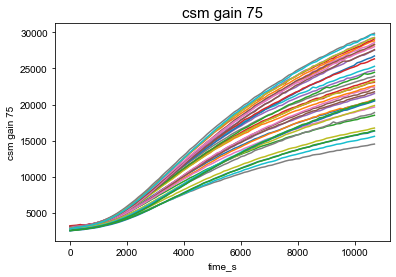

Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R19', '0-R2', '0-R20', '0-R3', '0-R4', '0-R5',
       '0-R6', '0-R7', '0-R8', '0-R9', '31-R1', '31-R10', '31-R11', '31-R12',
       '31-R13', '31-R14', '31-R15', '31-R16', '31-R17', '31-R18', '31-R19',
       '31-R2', '31-R20', '31-R3', '31-R4', '31-R5', '31-R6', '31-R7', '31-R8',
       '31-R9', 'time_s'],
      dtype='object', name='label')
1800
replicate.columns: Index(['31-R1', '31-R2', '31-R3', '31-R4', '31-R5'], dtype='object', name='label')
zero.columns: Index(['0-R1', '0-R2', '0-R3', '0-R4', '0-R5'], dtype='object', name='label')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


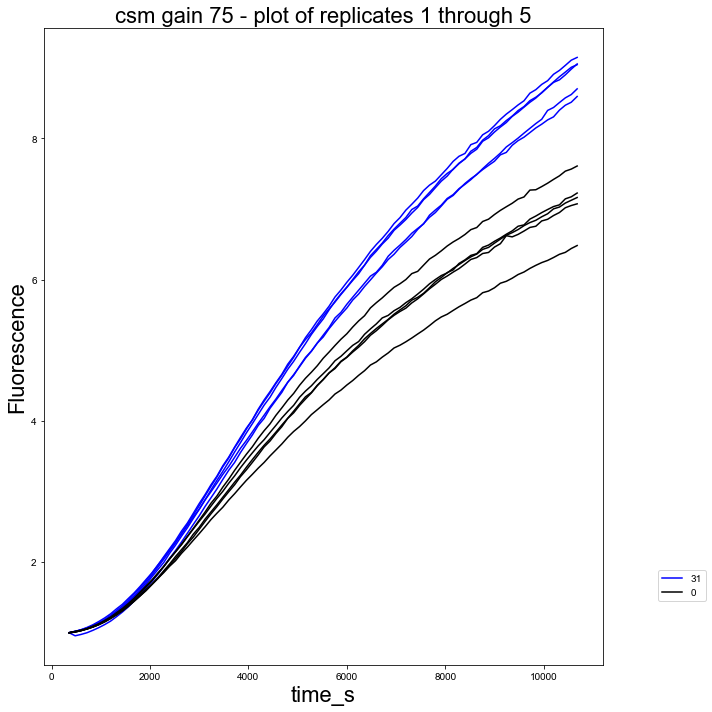

replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


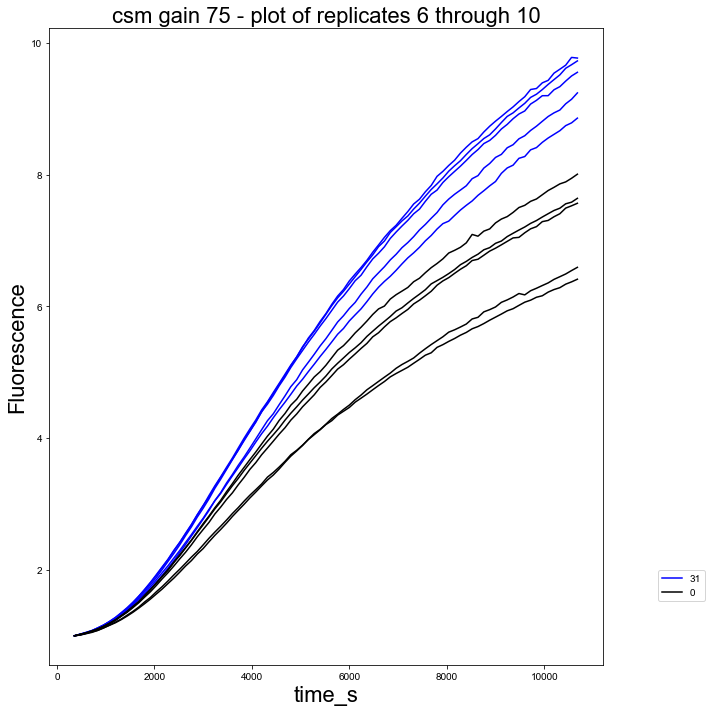

replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


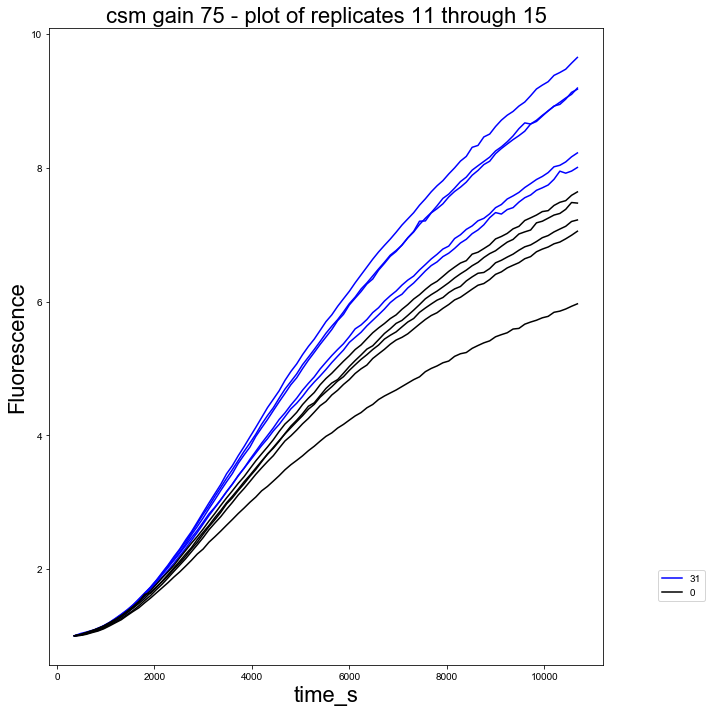

replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


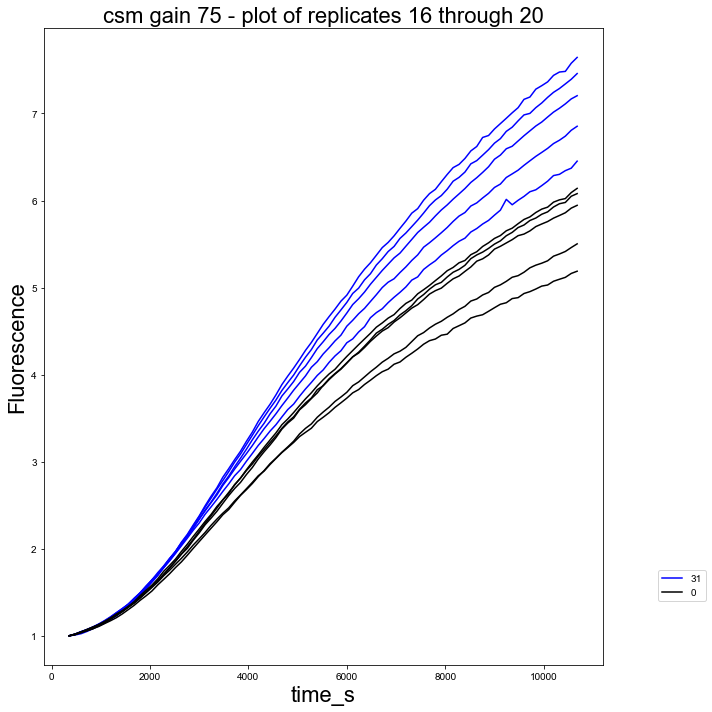

/Users/jackdesmarais/Library/Python/3.8/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/jackdesmarais/Library/Python/3.8/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


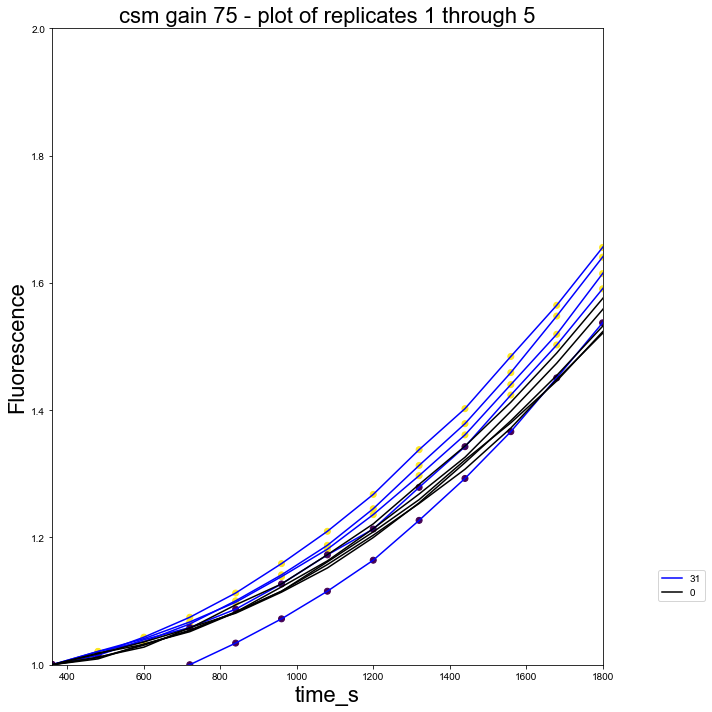

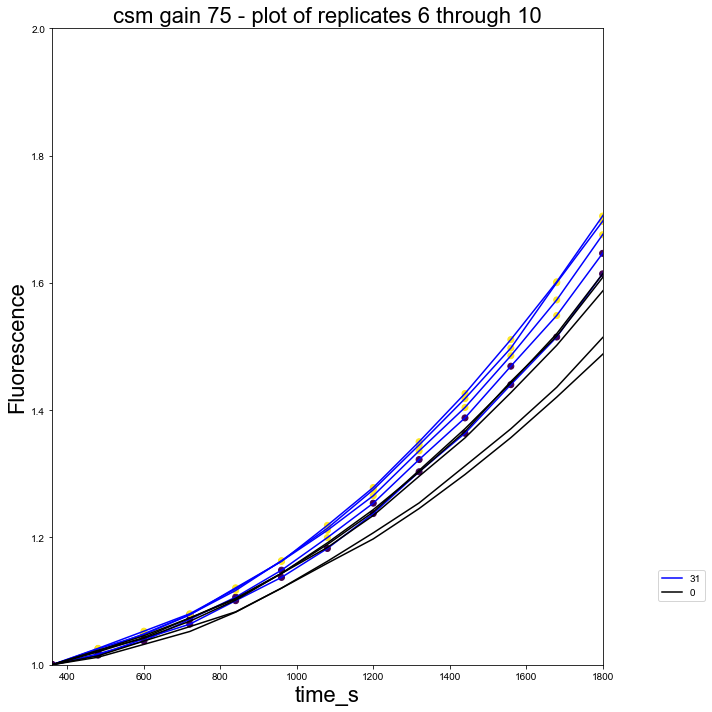

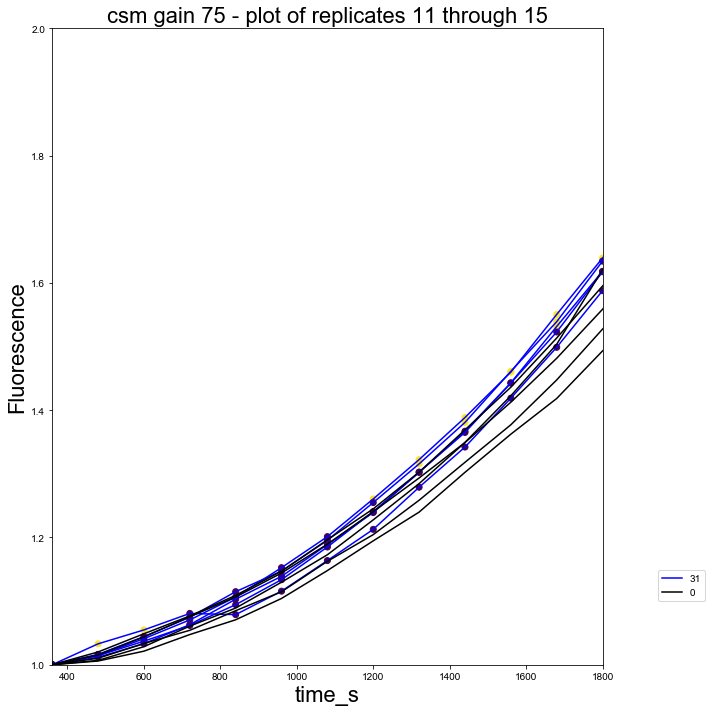

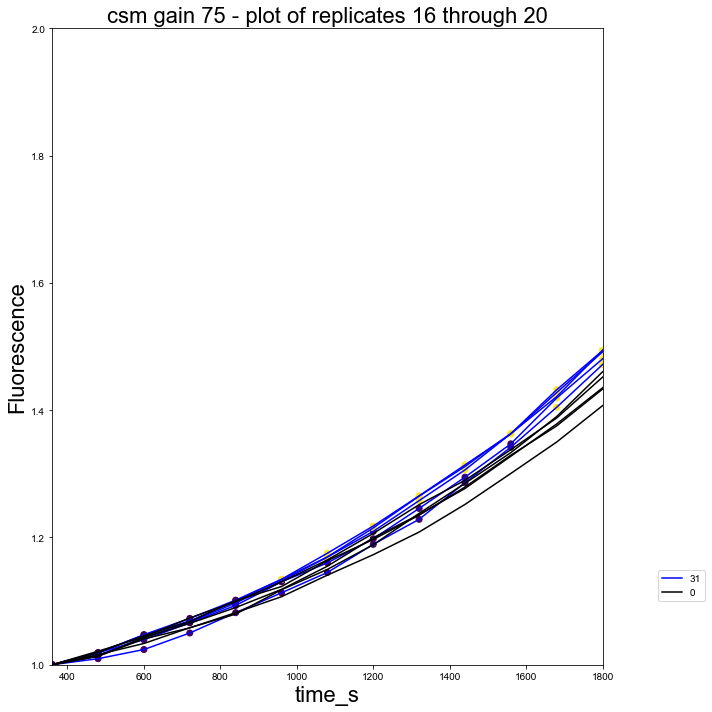

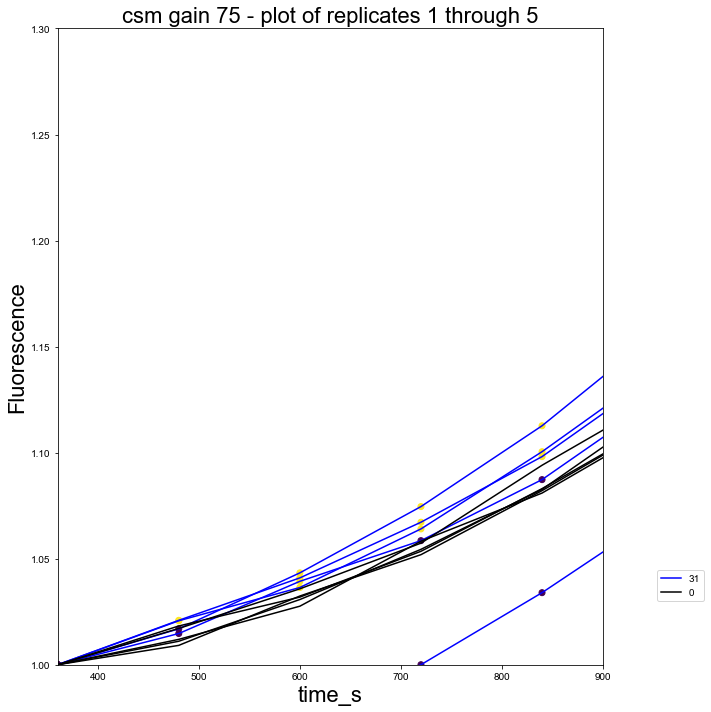

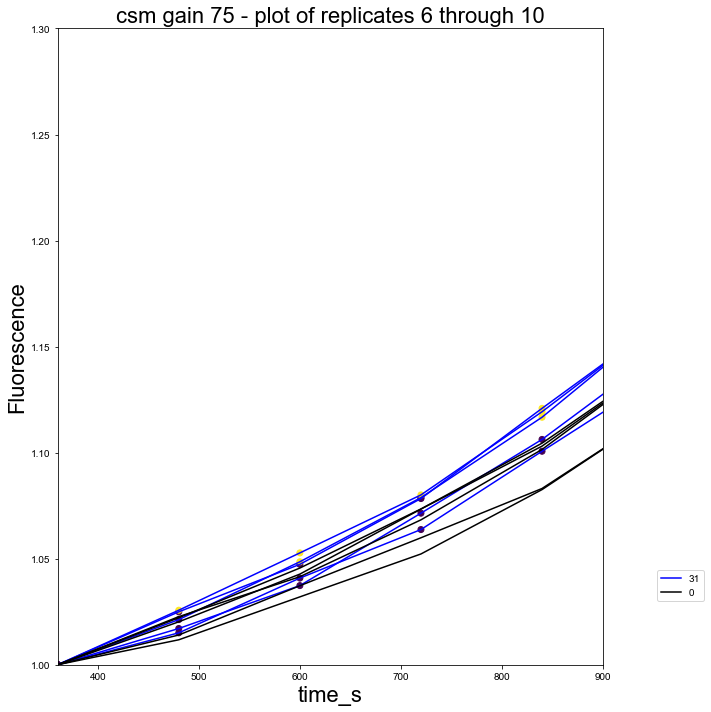

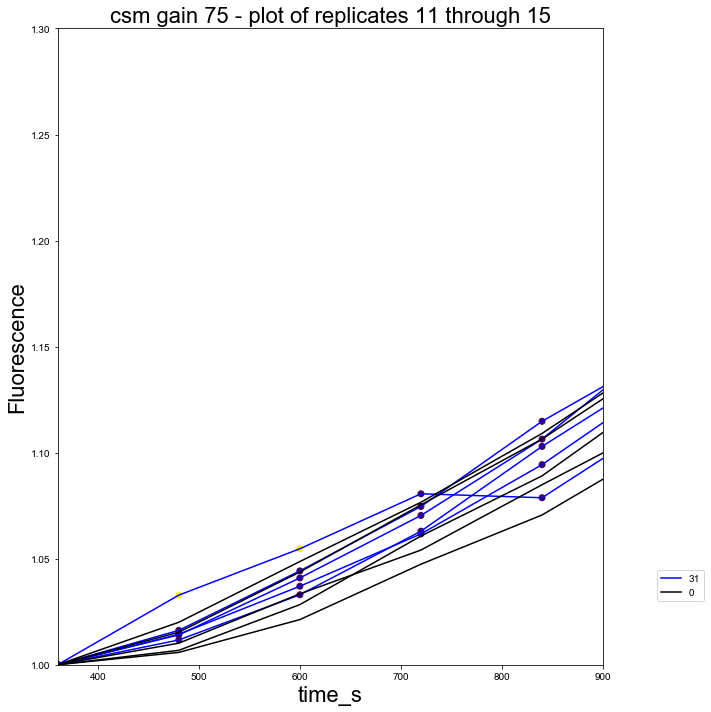

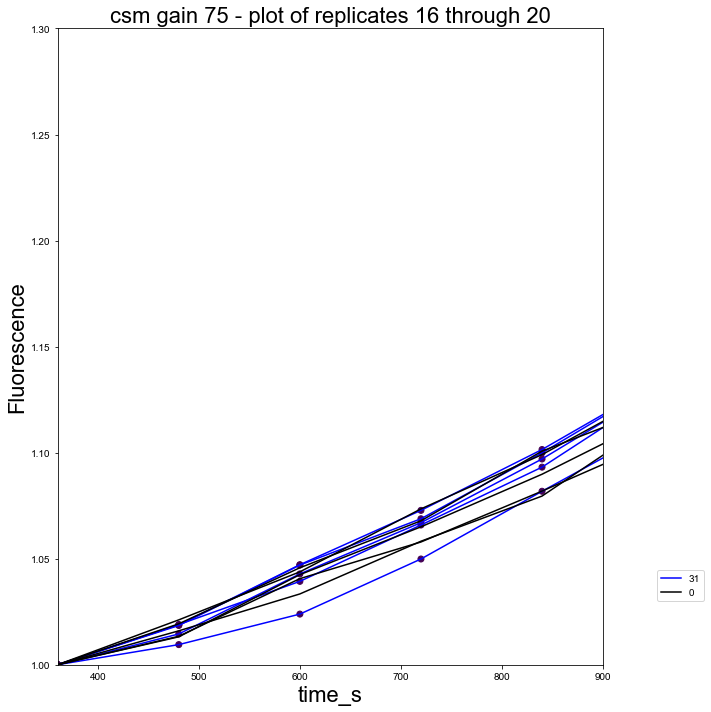

In [3]:
run_tests(plate_size=384, 
         plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
         data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
         conc = '31', norm_point = '4', experiment = 'csm gain 75',
         replicate_format='-R')

['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

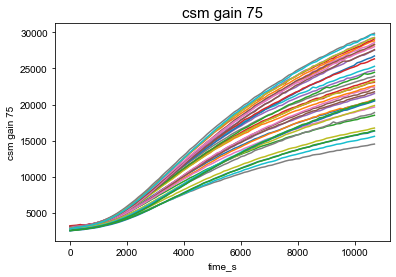

Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R19', '0-R2', '0-R20', '0-R3', '0-R4', '0-R5',
       '0-R6', '0-R7', '0-R8', '0-R9', '31-R1', '31-R10', '31-R11', '31-R12',
       '31-R13', '31-R14', '31-R15', '31-R16', '31-R17', '31-R18', '31-R19',
       '31-R2', '31-R20', '31-R3', '31-R4', '31-R5', '31-R6', '31-R7', '31-R8',
       '31-R9', 'time_s'],
      dtype='object', name='label')
1800
replicate.columns: Index(['31-R1', '31-R2', '31-R3', '31-R4', '31-R5'], dtype='object', name='label')
zero.columns: Index(['0-R1', '0-R2', '0-R3', '0-R4', '0-R5'], dtype='object', name='label')


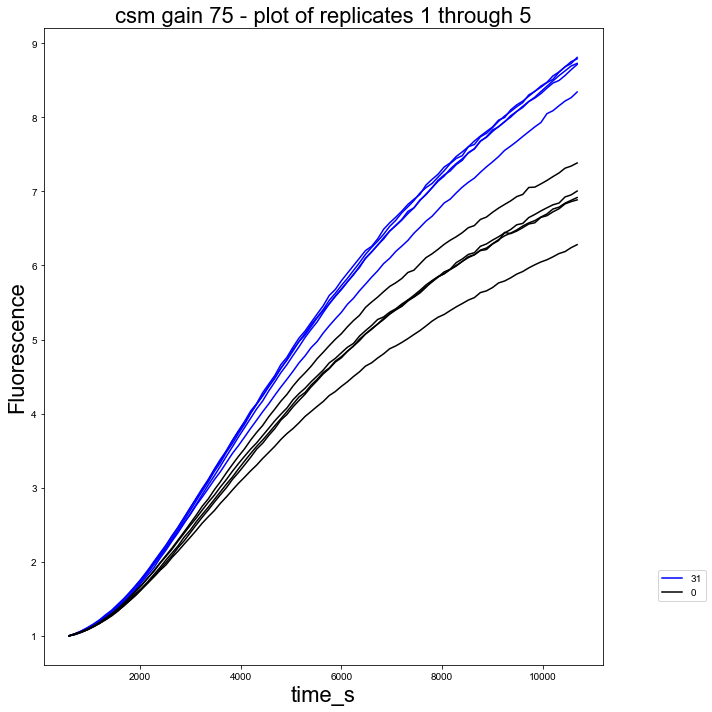

replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


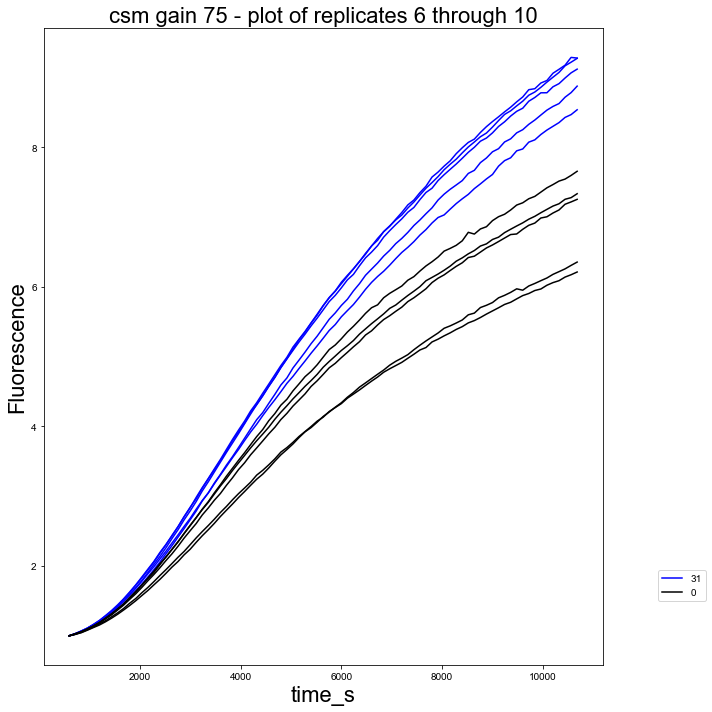

replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


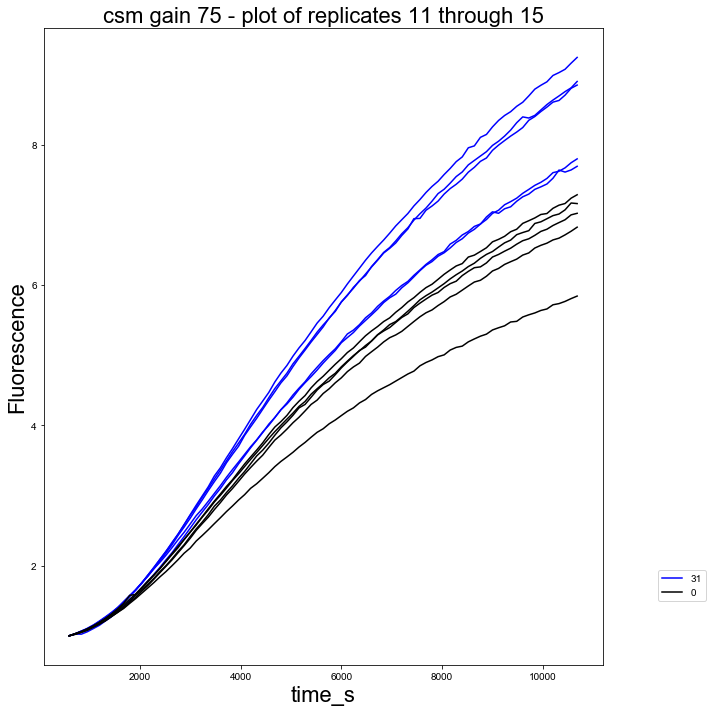

replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


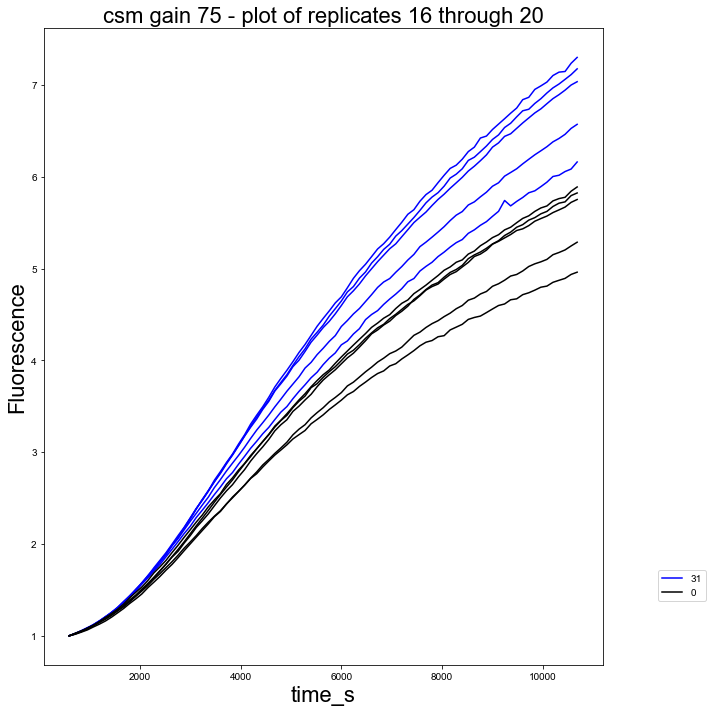

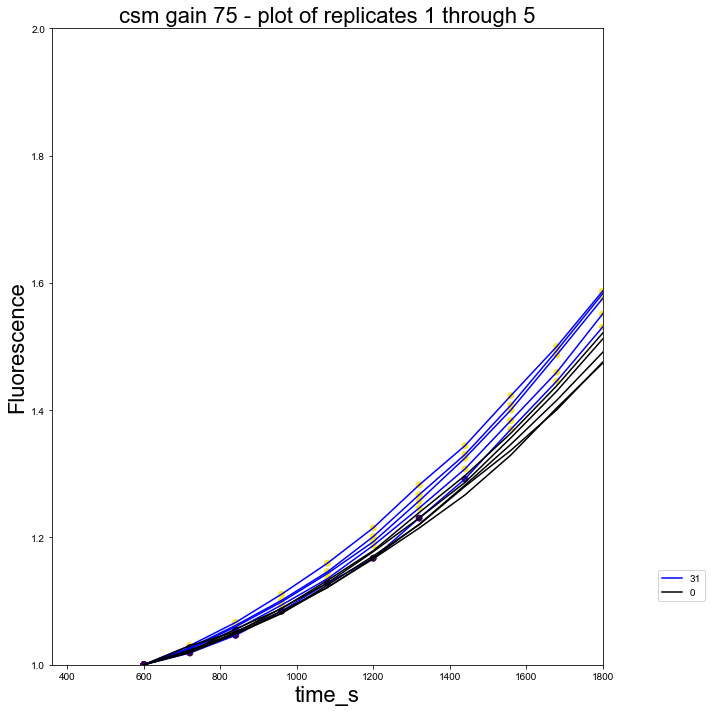

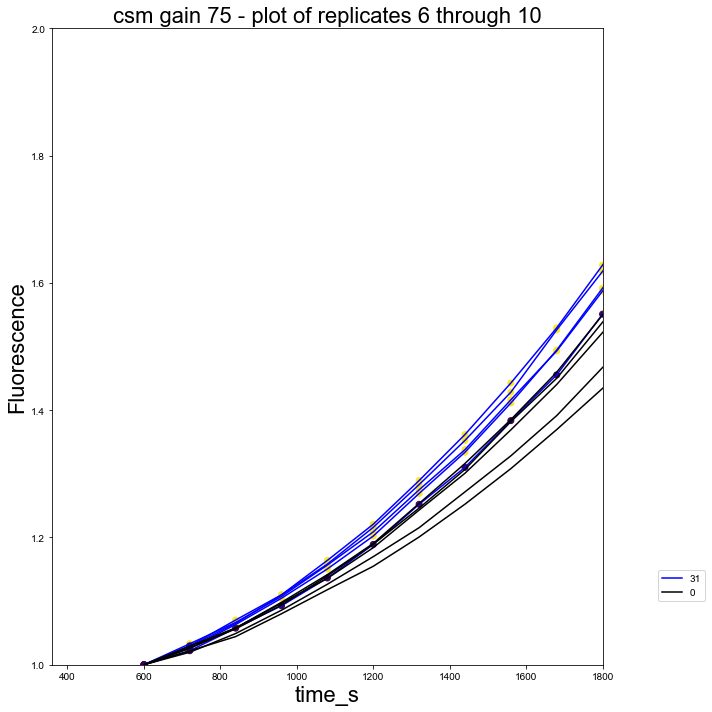

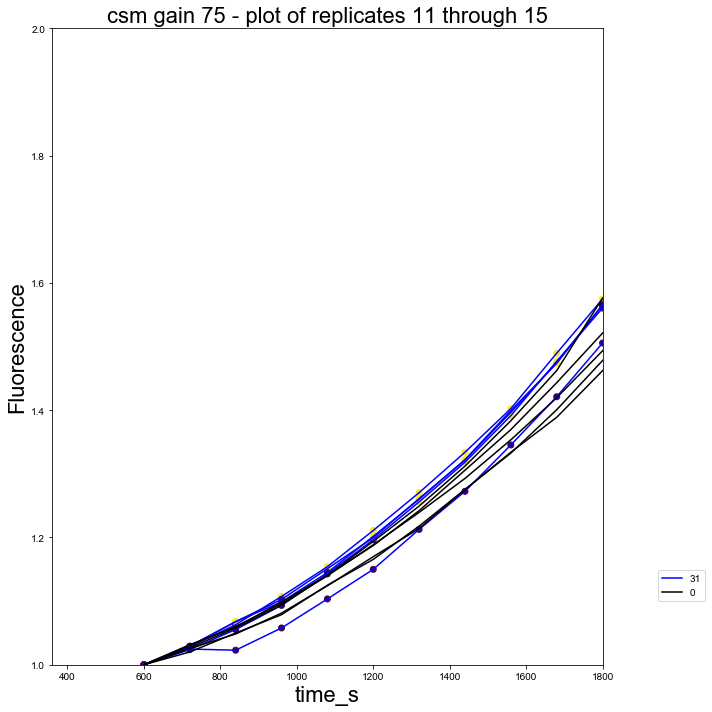

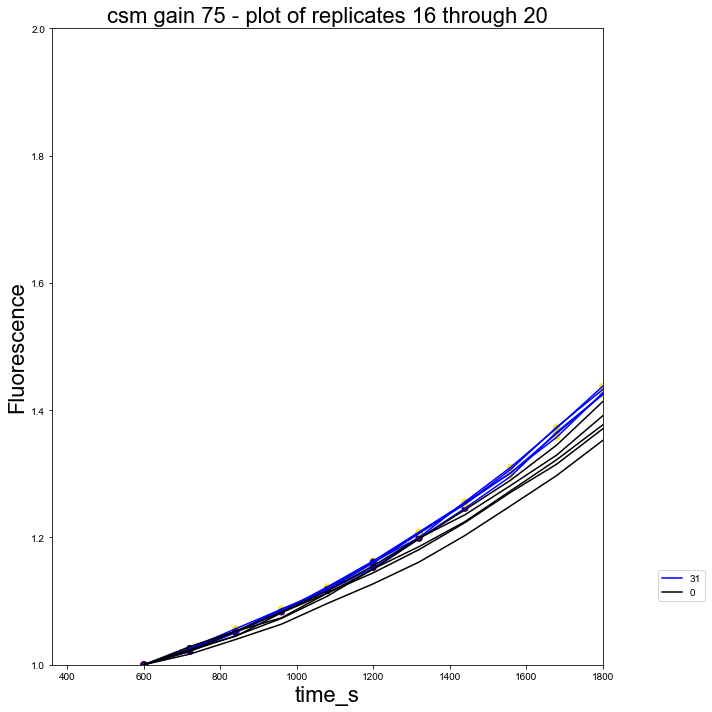

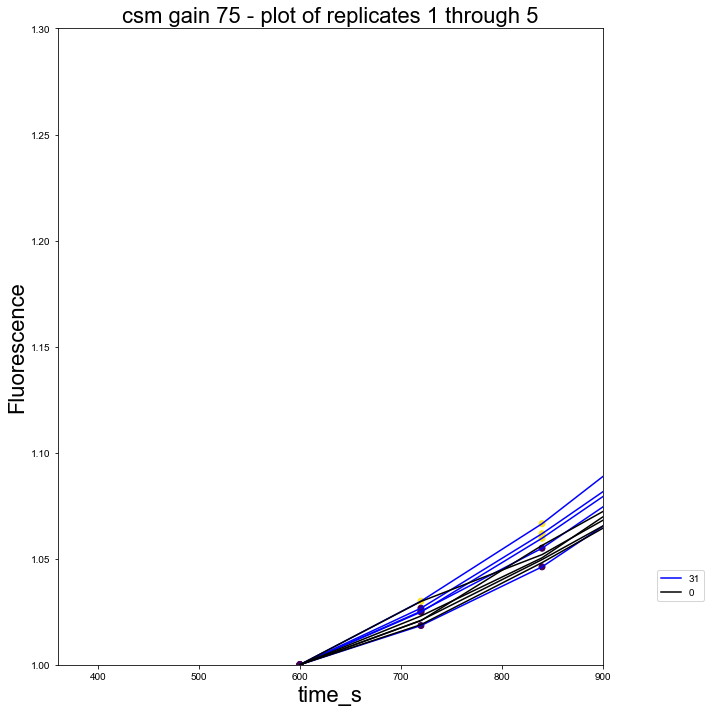

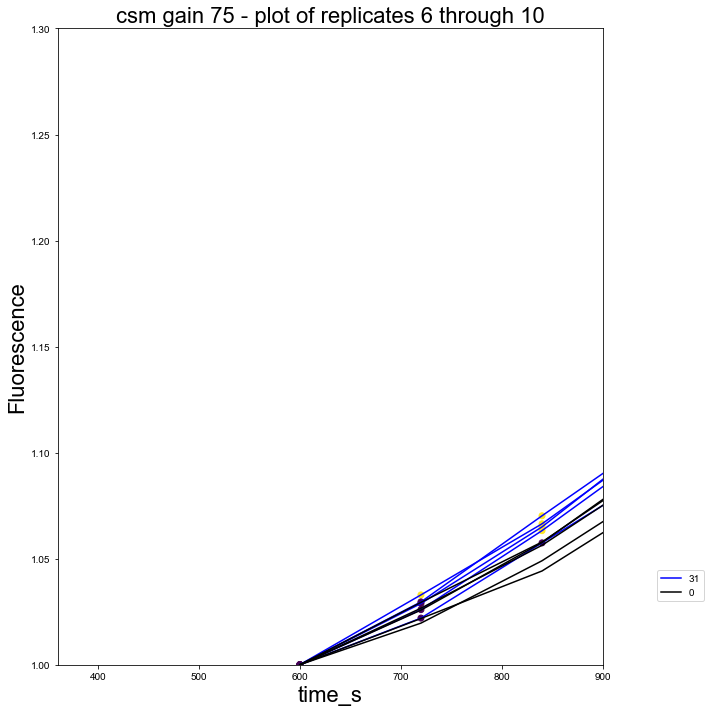

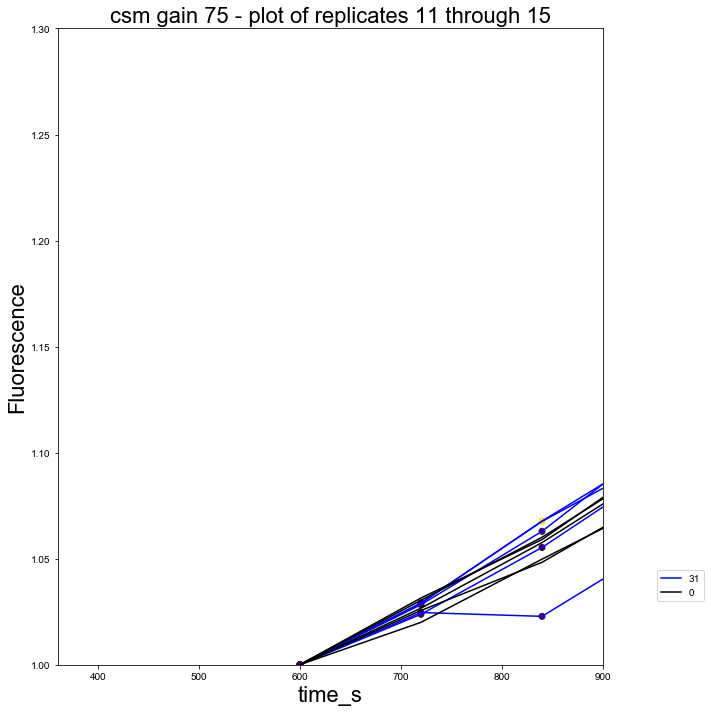

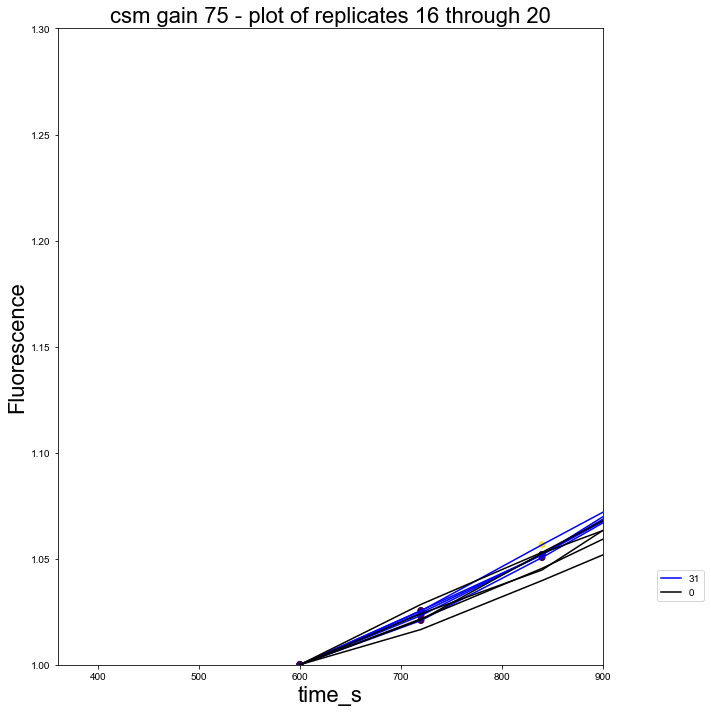

In [4]:
run_tests(plate_size=384, 
         plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
         data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
         conc = '31', norm_point = '6', experiment = 'csm gain 75',
         replicate_format='-R')

In [5]:
def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    end = 30*60
    
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        print('Working on: '+experiment)
        print(df.columns)
        end=end/60
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]

    print(df.columns)
    print(end)
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
        print('replicate.columns: %s'%str(replicate.columns))
        print('zero.columns: %s'%str(zero.columns))
        lines_1 = plt.plot(df[time], replicate, 'b')
        lines_3 = plt.plot(df[time], zero, 'k')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()
        
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
        norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
                   scale=np.std(zero,axis=1).values.reshape(-1,1))
        probability=norms.sf(replicate).T       
#         print(replicate)
#         print(probability)
        [plt.scatter(df[time], replicate[col], c=(probability[i]<0.05)) for i,col in enumerate(replicate.columns)]
        lines_1 = plt.plot(df[time], replicate, 'b')
        lines_3 = plt.plot(df[time], zero, 'k')
#         plt.axvline(14)
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.ylim(1,2)
        plt.xlim(6,30)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()
        
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
        norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
                   scale=np.std(zero,axis=1).values.reshape(-1,1))
        probability=norms.sf(replicate).T       
#         print(replicate)
#         print(probability)
        [plt.scatter(df[time], replicate[col], c=(probability[i]<0.05)) for i,col in enumerate(replicate.columns)]
        lines_1 = plt.plot(df[time], replicate, 'b')
        lines_3 = plt.plot(df[time], zero, 'k')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.ylim(1,1.3)
        plt.xlim(6,15)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()

dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '15.6 cp/µl R8', '15.6 cp/µl R9', '15.6 cp/µl R10', '15.6 cp/µl R11',
       '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14', '15.6 cp/µl R15',
       '15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3',
       '0 cp/µl R4', '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8',
       '0 cp/µl R9', '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12',
       '0 cp/µl R13', '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16',
       '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20',
       'Reporter-1', 'Reporter-2', 'Reporter-3'],
      dtype='object')
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '

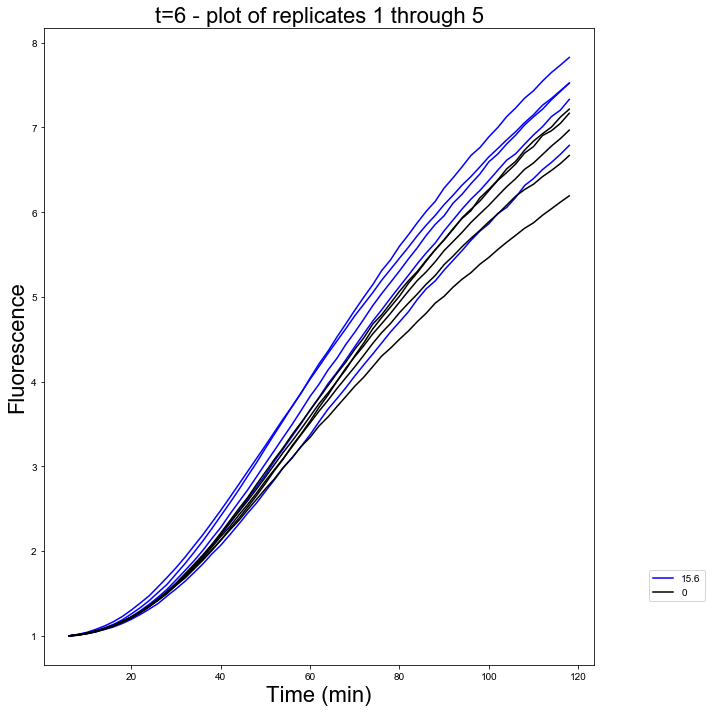

replicate.columns: Index(['15.6 cp/µl R6', '15.6 cp/µl R7', '15.6 cp/µl R8', '15.6 cp/µl R9',
       '15.6 cp/µl R10'],
      dtype='object')
zero.columns: Index(['0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8', '0 cp/µl R9', '0 cp/µl R10'], dtype='object')


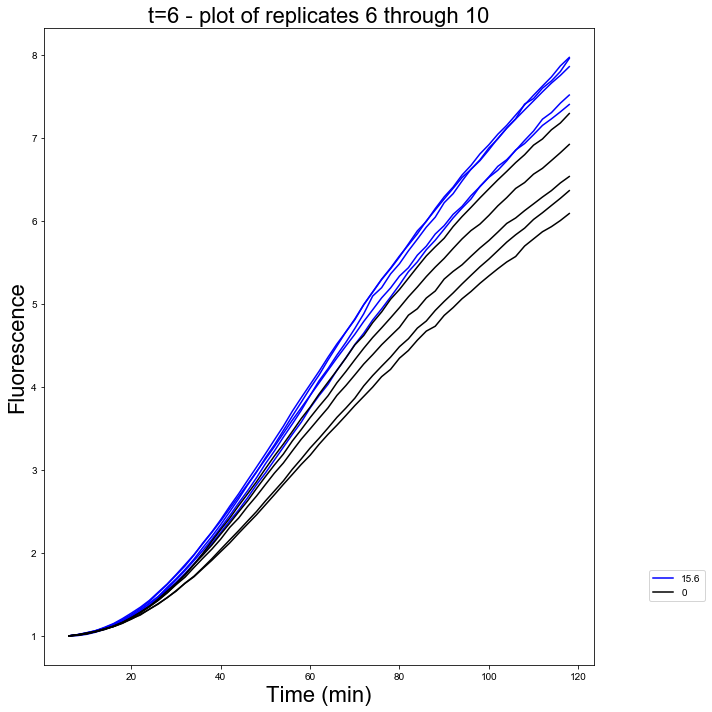

replicate.columns: Index(['15.6 cp/µl R11', '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14',
       '15.6 cp/µl R15'],
      dtype='object')
zero.columns: Index(['0 cp/µl R11', '0 cp/µl R12', '0 cp/µl R13', '0 cp/µl R14',
       '0 cp/µl R15'],
      dtype='object')


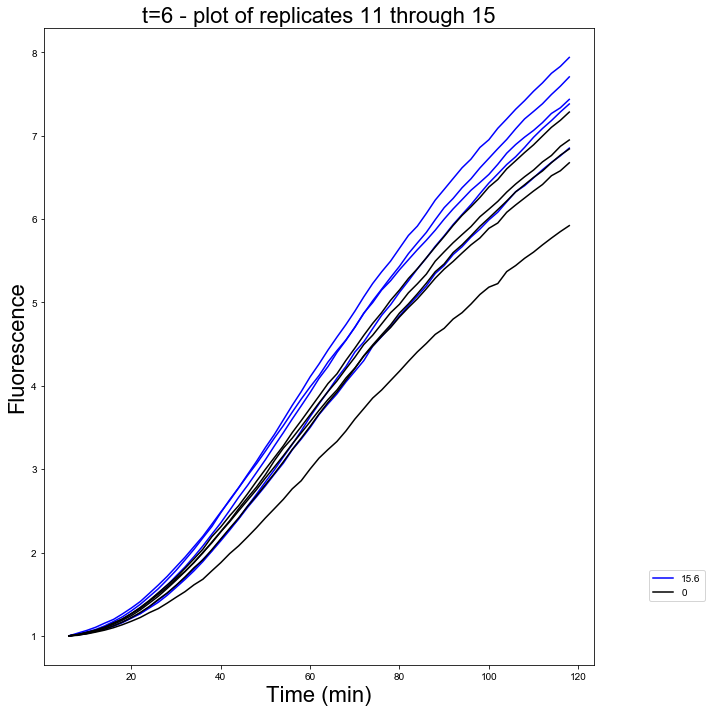

replicate.columns: Index(['15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20'],
      dtype='object')
zero.columns: Index(['0 cp/µl R16', '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19',
       '0 cp/µl R20'],
      dtype='object')


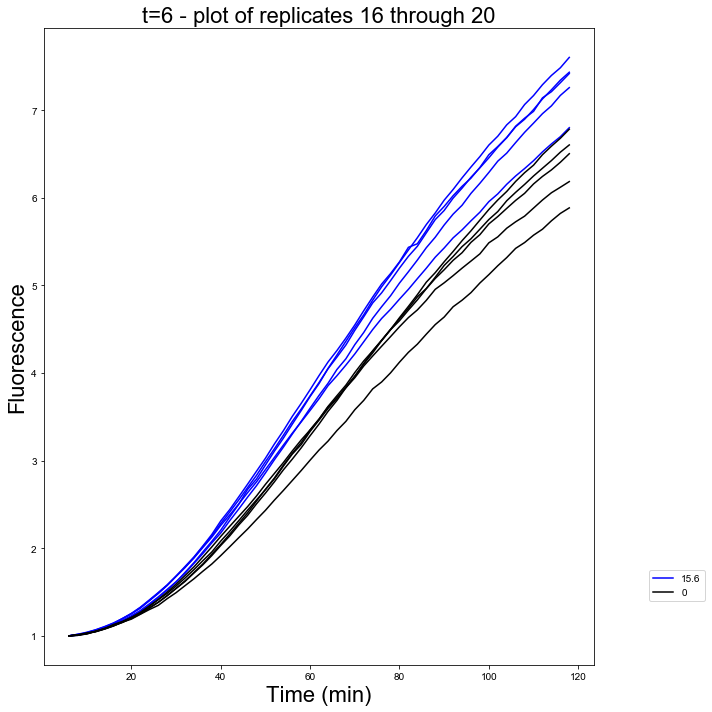

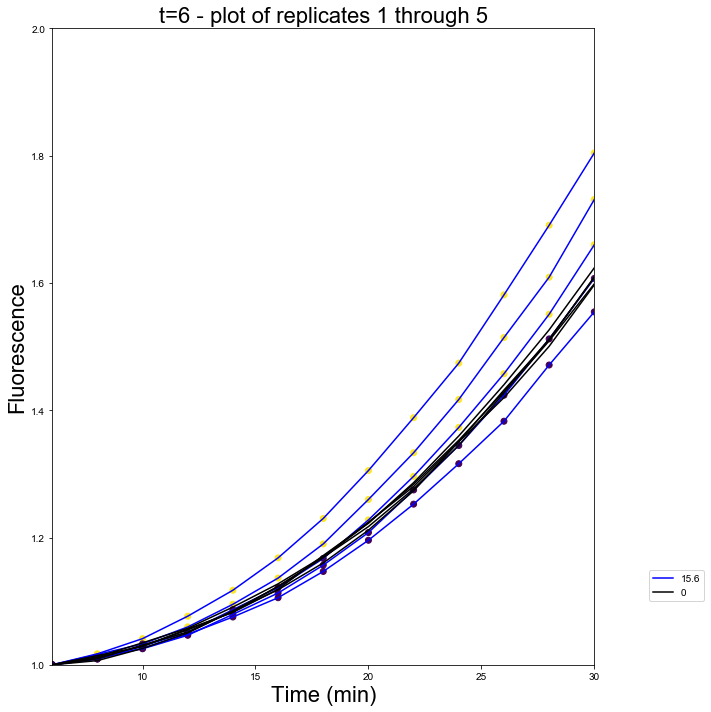

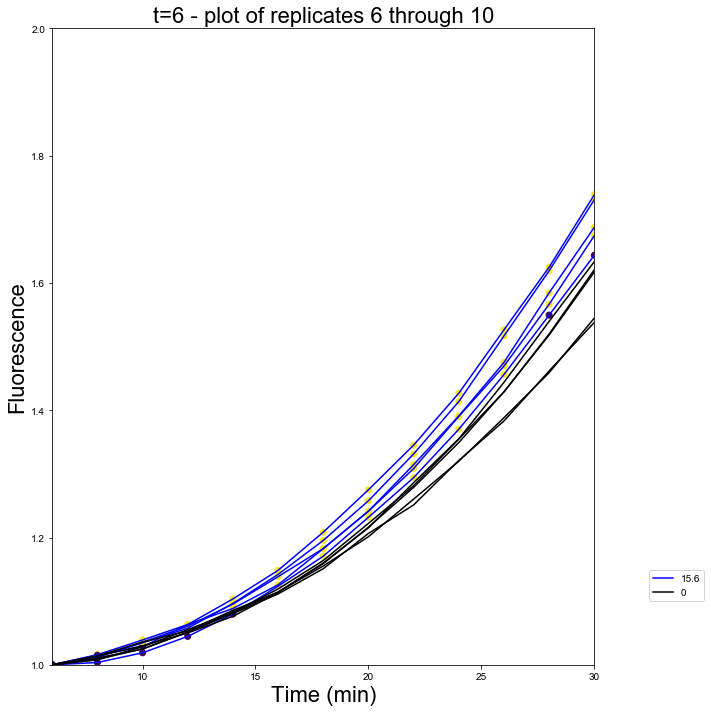

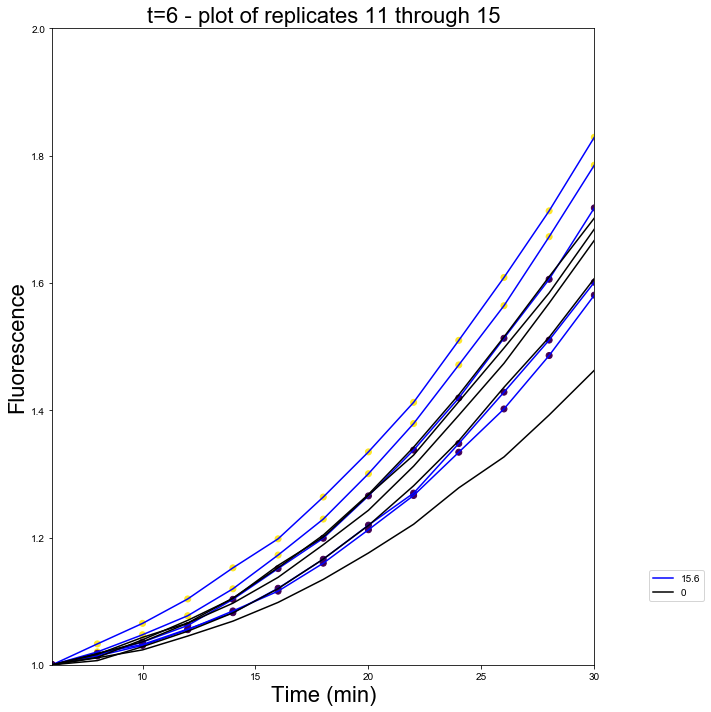

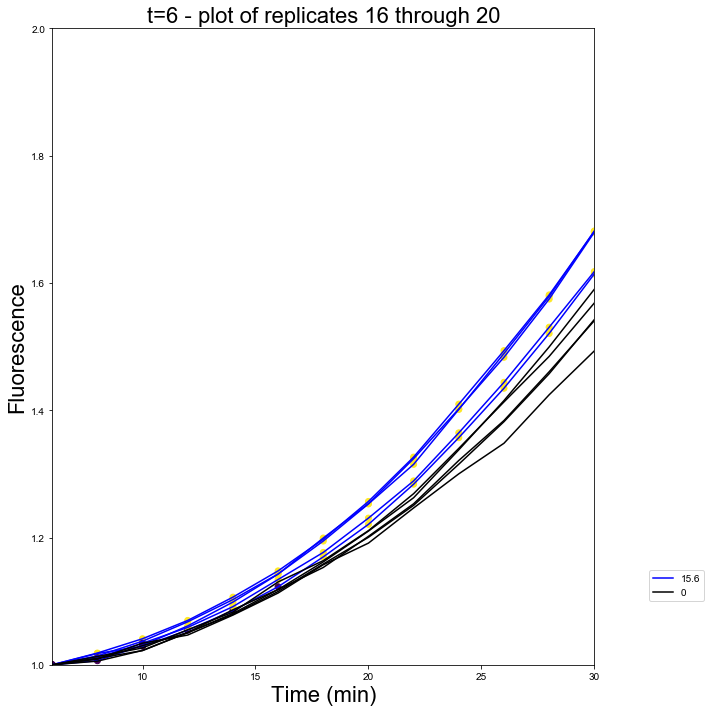

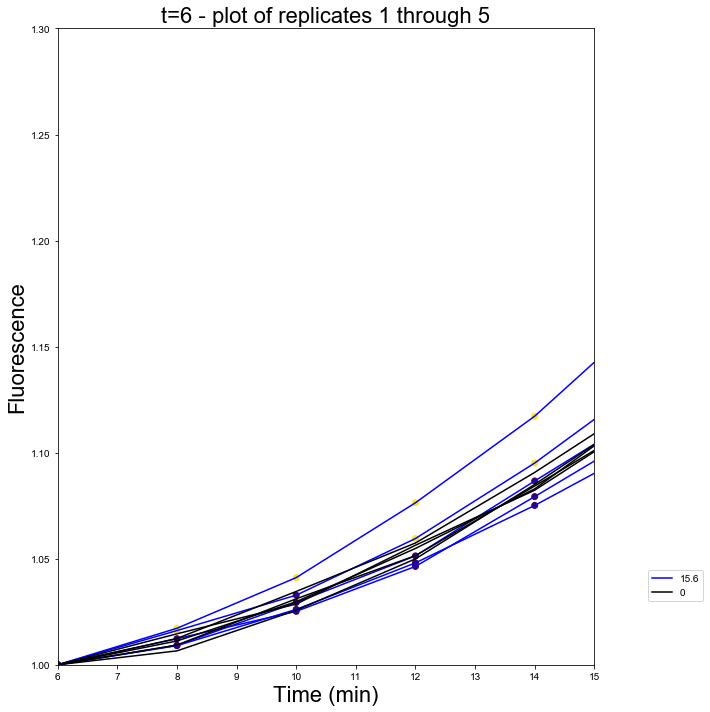

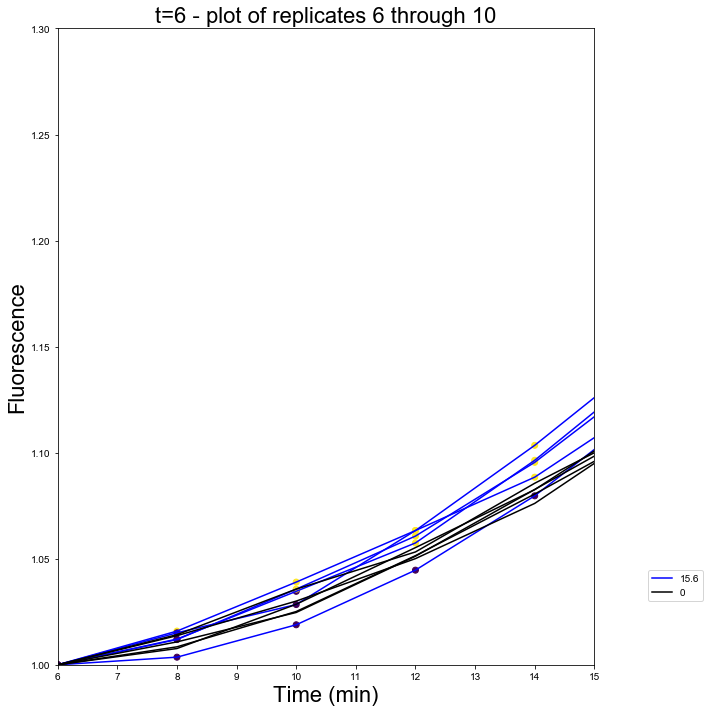

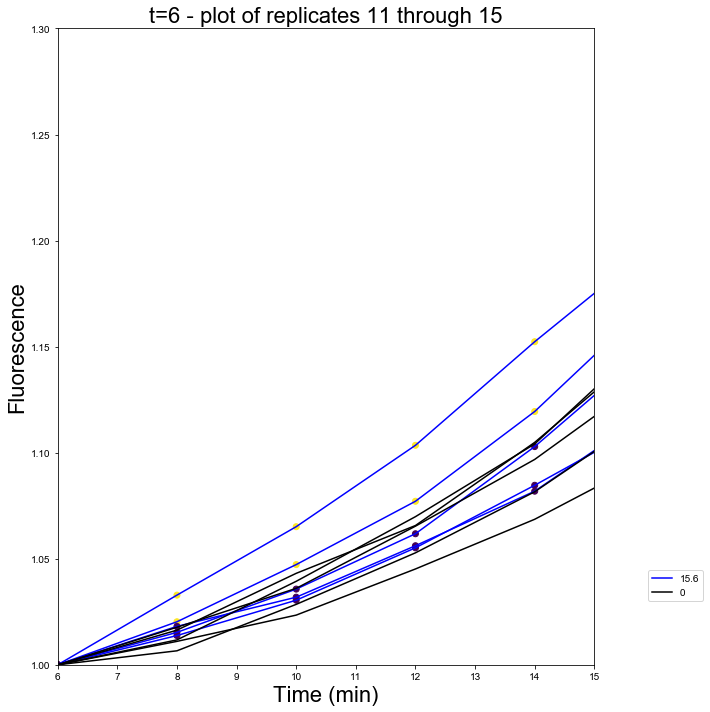

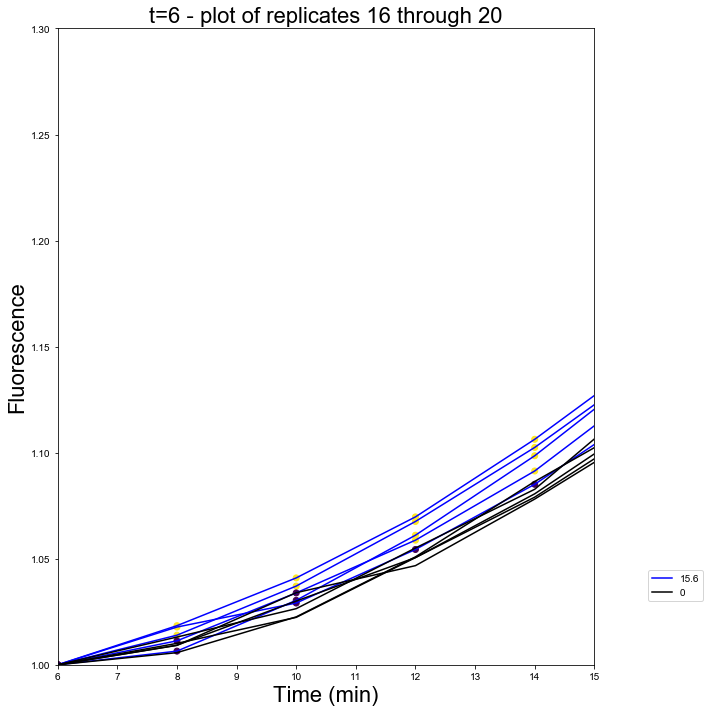

In [6]:
run_tests(data_file ='./LOD/2021-02-02 16 cp .xlsx', conc = '15.6',
                                             experiment = 't=6', replicate_format=' cp/µl R')

In [7]:
%cd ~/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe_distro/
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import itertools
from scipy import stats

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt
import matplotlib
from statsmodels.stats.multitest import multipletests


# Say, "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


/Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe_distro


In [8]:
main_text = './LOD/Reviewer/main_text/'
supplements = './LOD/Reviewer/Supplements/'

!mkdir ./LOD/Reviewer/
!mkdir ./LOD/Reviewer/main_text/
!mkdir ./LOD/Reviewer/Supplements/
!ls
print()
!ls ./LOD/Reviewer/

mkdir: ./LOD/Reviewer/: File exists
mkdir: ./LOD/Reviewer/main_text/: File exists
mkdir: ./LOD/Reviewer/Supplements/: File exists
Icon?               growth              notebooks
LOD                 main_text           prisim_format.py
__init__.py         making_prisim_files supplements

Icon?       Supplements main_text


['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

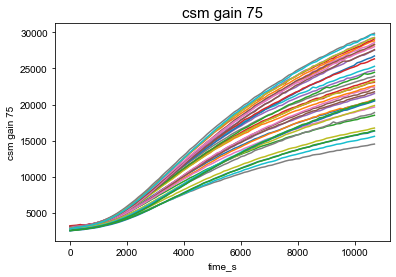

cycle_n
4       360.009
5       480.013
6       600.016
7       720.020
8       840.025
        ...    
86    10200.455
87    10320.464
88    10440.471
89    10560.473
90    10680.476
Name: time_s, Length: 87, dtype: float64
Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R19', '0-R2', '0-R20', '0-R3', '0-R4', '0-R5',
       '0-R6', '0-R7', '0-R8', '0-R9', '31-R1', '31-R10', '31-R11', '31-R12',
       '31-R13', '31-R14', '31-R15', '31-R16', '31-R17', '31-R18', '31-R19',
       '31-R2', '31-R20', '31-R3', '31-R4', '31-R5', '31-R6', '31-R7', '31-R8',
       '31-R9', 'time_s'],
      dtype='object', name='label')
cycle_n
8      840.025
9      960.029
16    1800.050
31    3600.164
60    7080.364
Name: time_s, dtype: float64
replicate.columns: Index(['31-R1', '31-R2', '31-R3', '31-R4', '31-R5'], dtype='object', name='label')
zero.columns: Index(['0-R1', '0-R2', '0-R3', '0-R4', '0-R5'], dtype='object', name='label')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


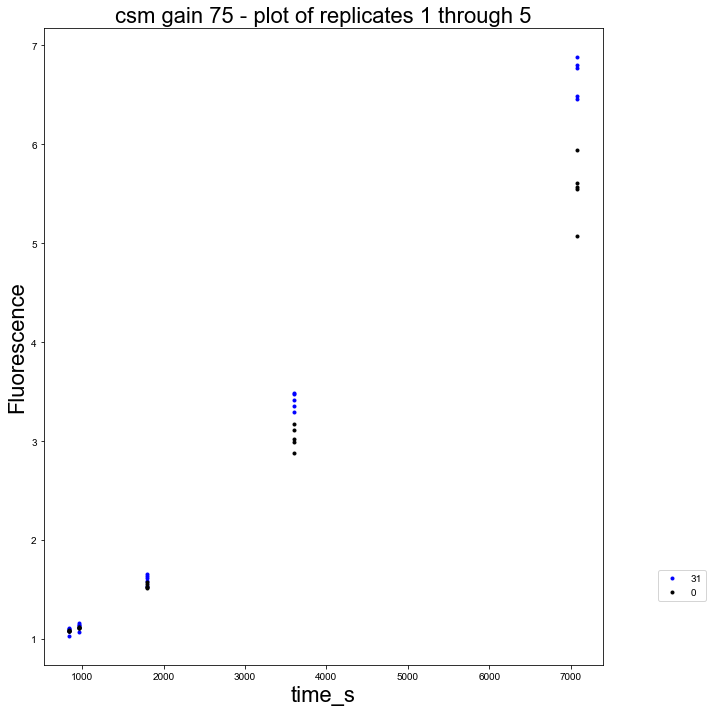

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


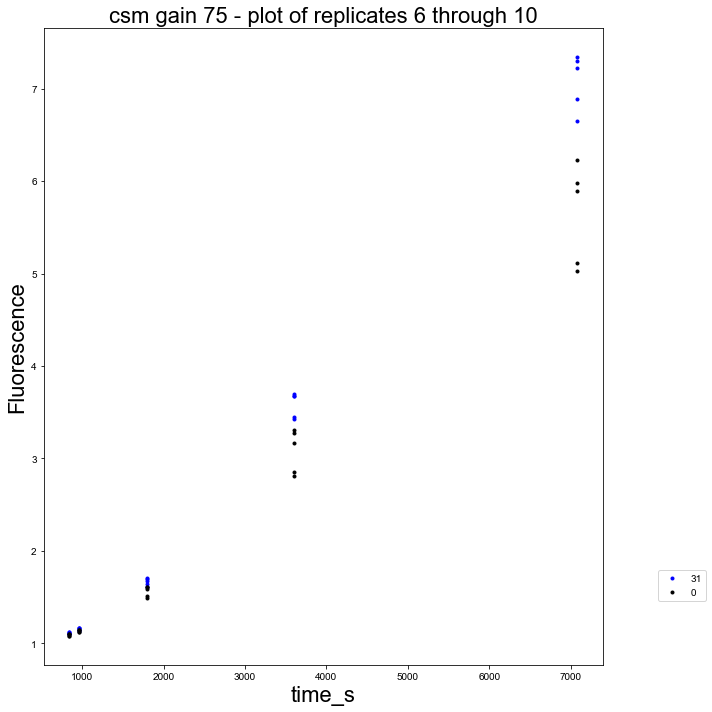

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


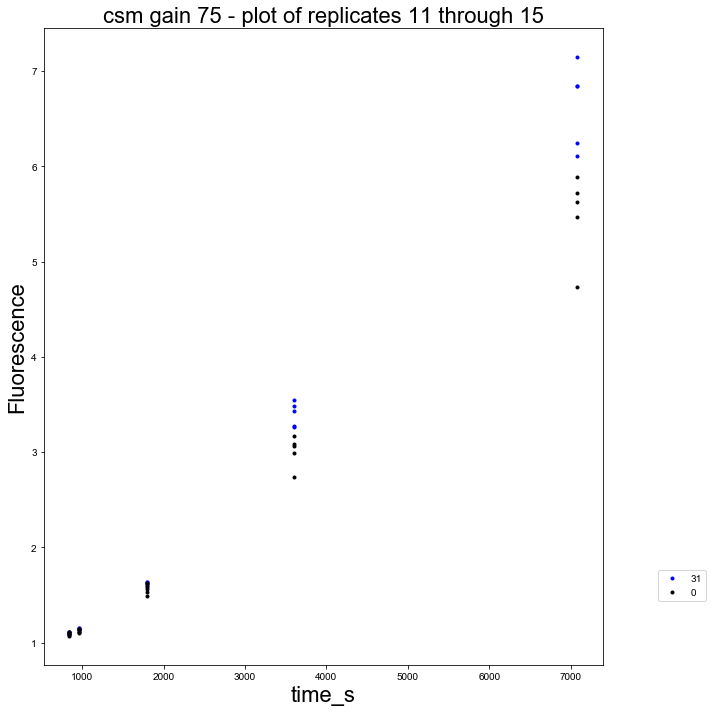

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


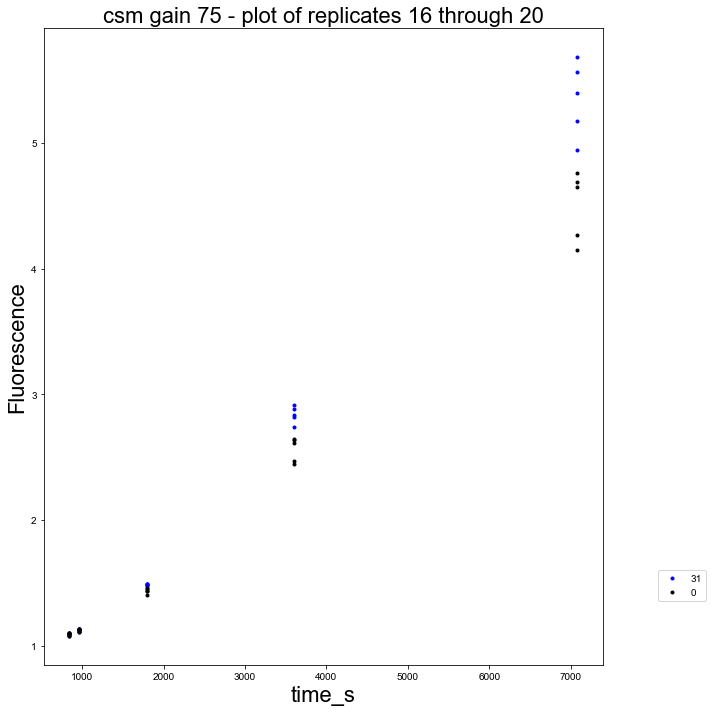

5
5
5
5
5
5
5
5
5
5
(40, 5)
Experimental probability shape
(5, 40)
Zero probability shape
(0,)
Experimental detected shape
[ 6  8 13 19 19]
[ 5  6  9 15 16]
[ 2  3  4  9 14]
['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

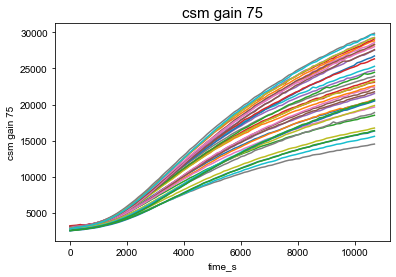

cycle_n
5       480.013
6       600.016
7       720.020
8       840.025
9       960.029
        ...    
86    10200.455
87    10320.464
88    10440.471
89    10560.473
90    10680.476
Name: time_s, Length: 86, dtype: float64
Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R19', '0-R2', '0-R20', '0-R3', '0-R4', '0-R5',
       '0-R6', '0-R7', '0-R8', '0-R9', '31-R1', '31-R10', '31-R11', '31-R12',
       '31-R13', '31-R14', '31-R15', '31-R16', '31-R17', '31-R18', '31-R19',
       '31-R2', '31-R20', '31-R3', '31-R4', '31-R5', '31-R6', '31-R7', '31-R8',
       '31-R9', 'time_s'],
      dtype='object', name='label')
cycle_n
8      840.025
9      960.029
16    1800.050
31    3600.164
60    7080.364
Name: time_s, dtype: float64
replicate.columns: Index(['31-R1', '31-R2', '31-R3', '31-R4', '31-R5'], dtype='object', name='label')
zero.columns: Index(['0-R1', '0-R2', '0-R3', '0-R4', '0-R5'], dtype='object', name='label')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


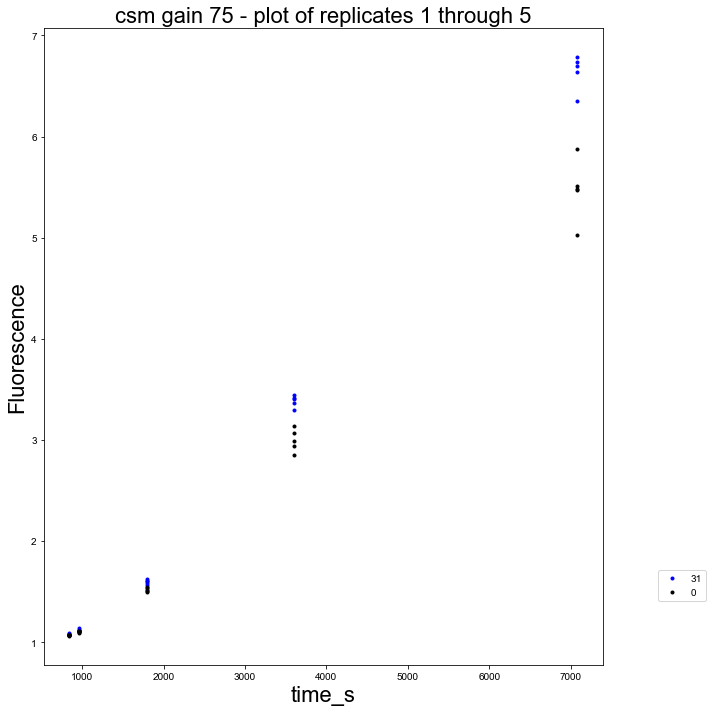

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


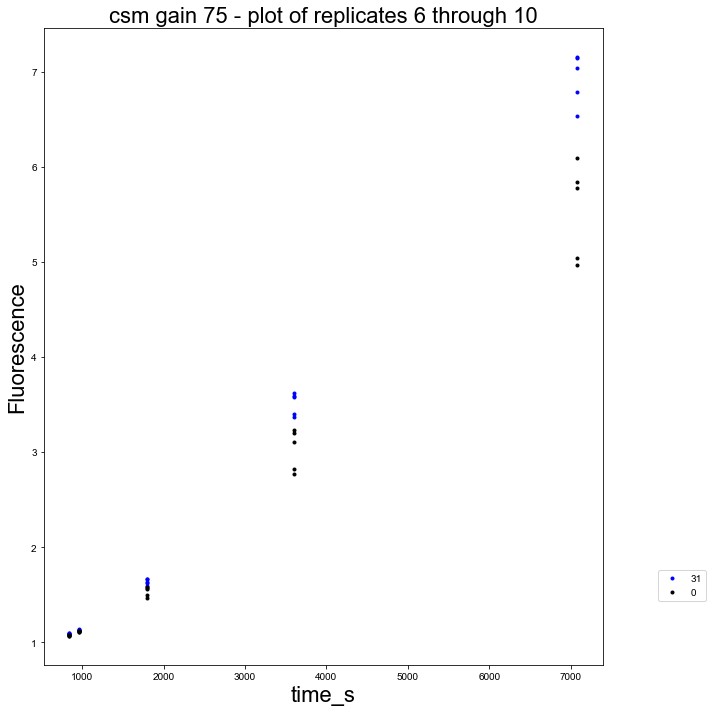

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


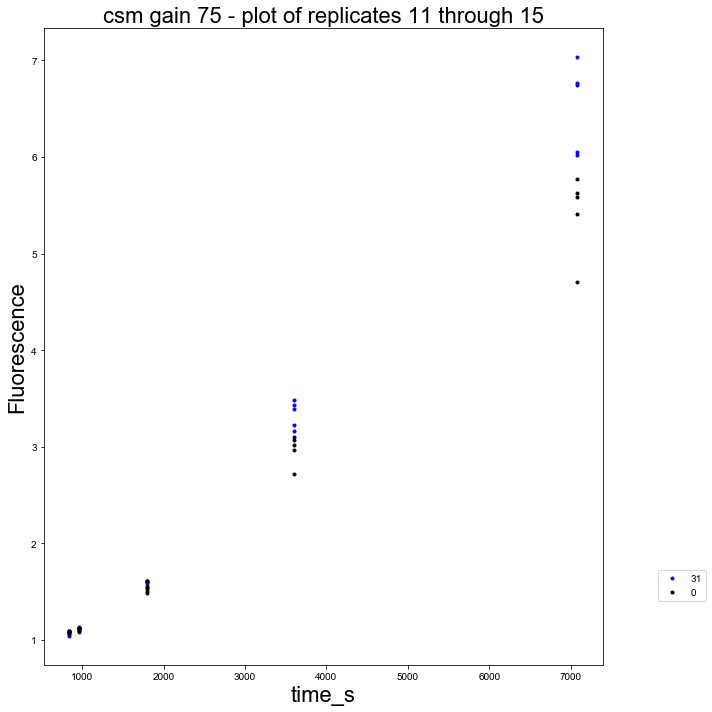

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


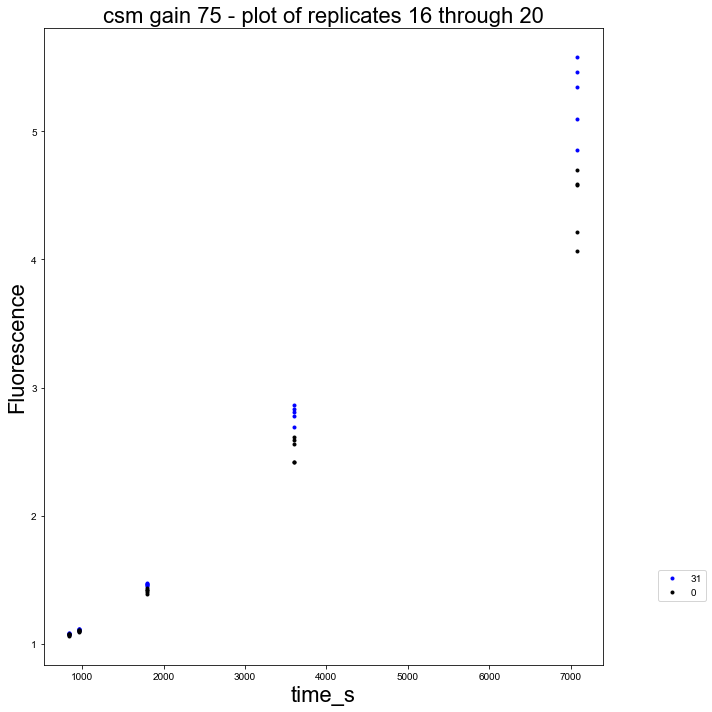

5
5
5
5
5
5
5
5
5
5
(40, 5)
Experimental probability shape
(5, 40)
Zero probability shape
(0,)
Experimental detected shape
[ 9 13 15 19 19]
[ 5  9 11 15 16]
[ 3  3  5  9 14]
['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

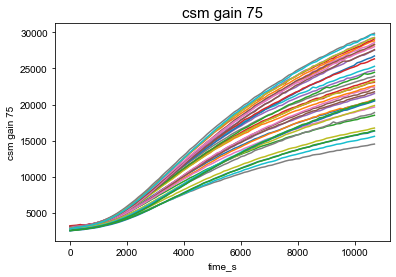

cycle_n
6       600.016
7       720.020
8       840.025
9       960.029
10     1080.033
        ...    
86    10200.455
87    10320.464
88    10440.471
89    10560.473
90    10680.476
Name: time_s, Length: 85, dtype: float64
Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R19', '0-R2', '0-R20', '0-R3', '0-R4', '0-R5',
       '0-R6', '0-R7', '0-R8', '0-R9', '31-R1', '31-R10', '31-R11', '31-R12',
       '31-R13', '31-R14', '31-R15', '31-R16', '31-R17', '31-R18', '31-R19',
       '31-R2', '31-R20', '31-R3', '31-R4', '31-R5', '31-R6', '31-R7', '31-R8',
       '31-R9', 'time_s'],
      dtype='object', name='label')
cycle_n
8      840.025
9      960.029
16    1800.050
31    3600.164
60    7080.364
Name: time_s, dtype: float64
replicate.columns: Index(['31-R1', '31-R2', '31-R3', '31-R4', '31-R5'], dtype='object', name='label')
zero.columns: Index(['0-R1', '0-R2', '0-R3', '0-R4', '0-R5'], dtype='object', name='label')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


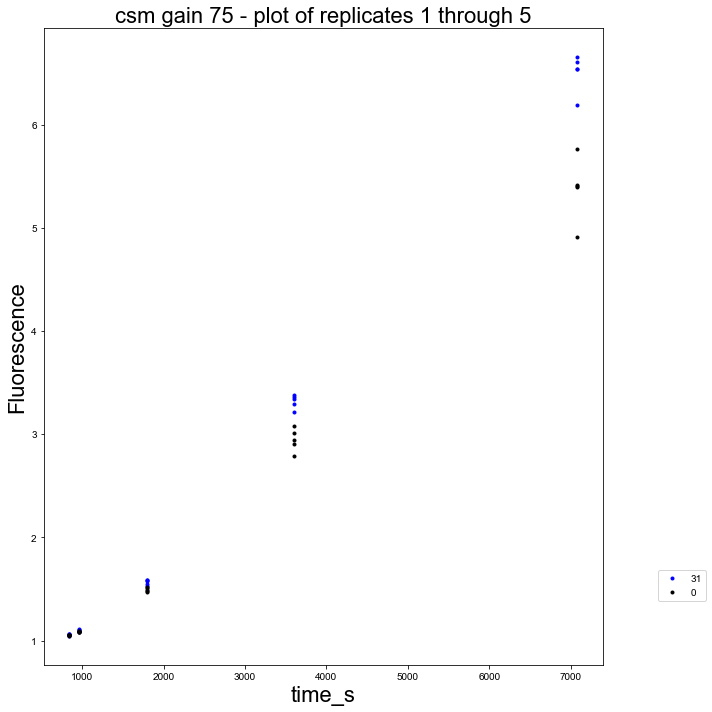

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


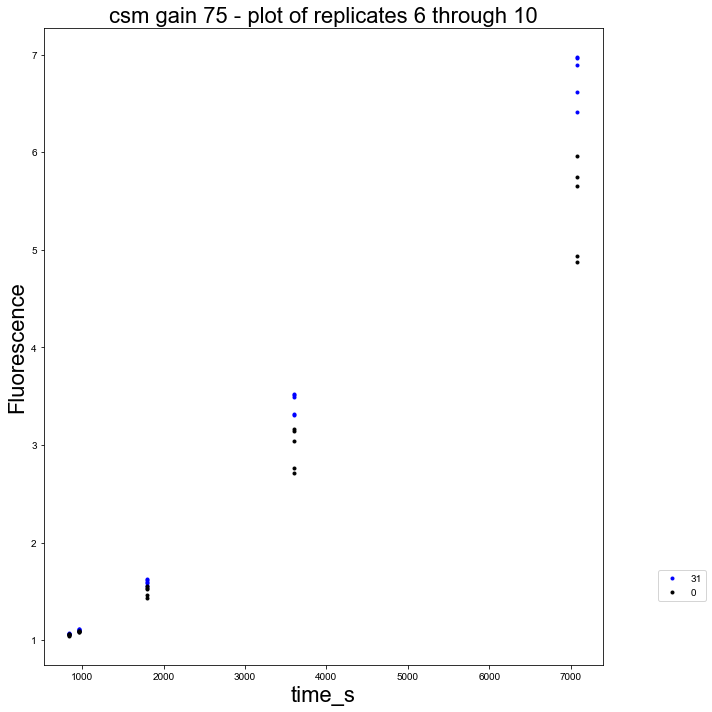

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


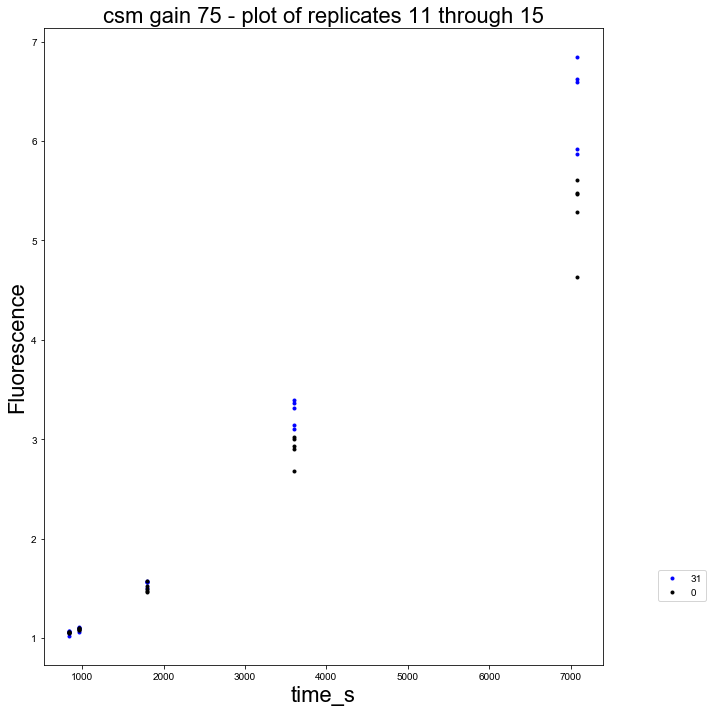

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


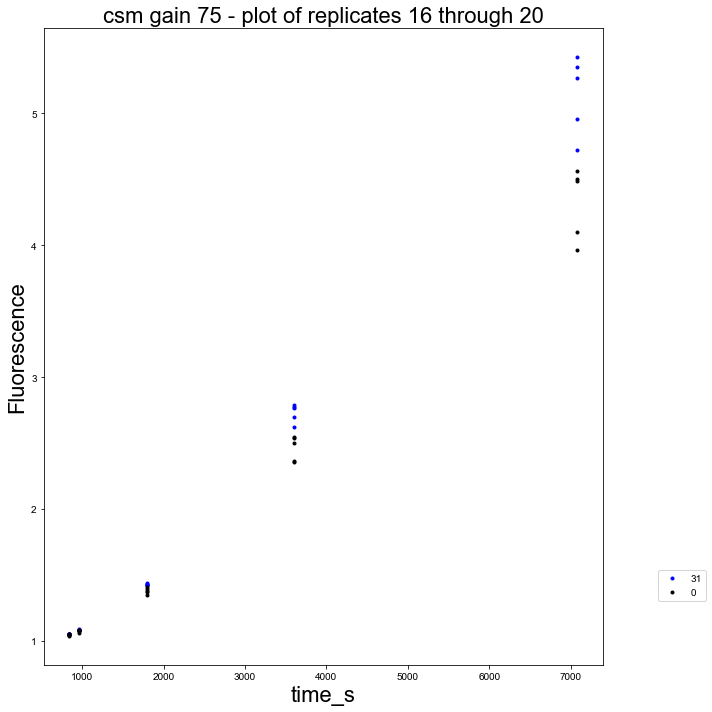

5
5
5
5
5
5
5
5
5
5
(40, 5)
Experimental probability shape
(5, 40)
Zero probability shape
(0,)
Experimental detected shape
[10 11 15 19 19]
[ 7  7  8 15 16]
[ 3  3  3 10 13]
['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

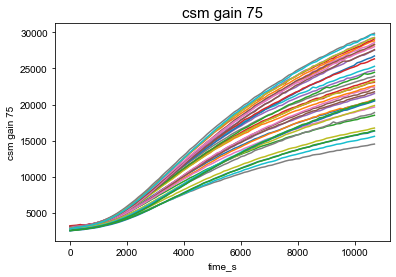

cycle_n
6       600.016
7       720.020
8       840.025
9       960.029
10     1080.033
        ...    
86    10200.455
87    10320.464
88    10440.471
89    10560.473
90    10680.476
Name: time_s, Length: 85, dtype: float64
Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R19', '0-R2', '0-R20', '0-R3', '0-R4', '0-R5',
       '0-R6', '0-R7', '0-R8', '0-R9', '31-R1', '31-R10', '31-R11', '31-R12',
       '31-R13', '31-R14', '31-R15', '31-R16', '31-R17', '31-R18', '31-R19',
       '31-R2', '31-R20', '31-R3', '31-R4', '31-R5', '31-R6', '31-R7', '31-R8',
       '31-R9', 'time_s'],
      dtype='object', name='label')
cycle_n
8      840.025
9      960.029
16    1800.050
31    3600.164
60    7080.364
Name: time_s, dtype: float64
replicate.columns: Index(['31-R1', '31-R2', '31-R3', '31-R4', '31-R5'], dtype='object', name='label')
zero.columns: Index(['0-R1', '0-R2', '0-R3', '0-R4', '0-R5'], dtype='object', name='label')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


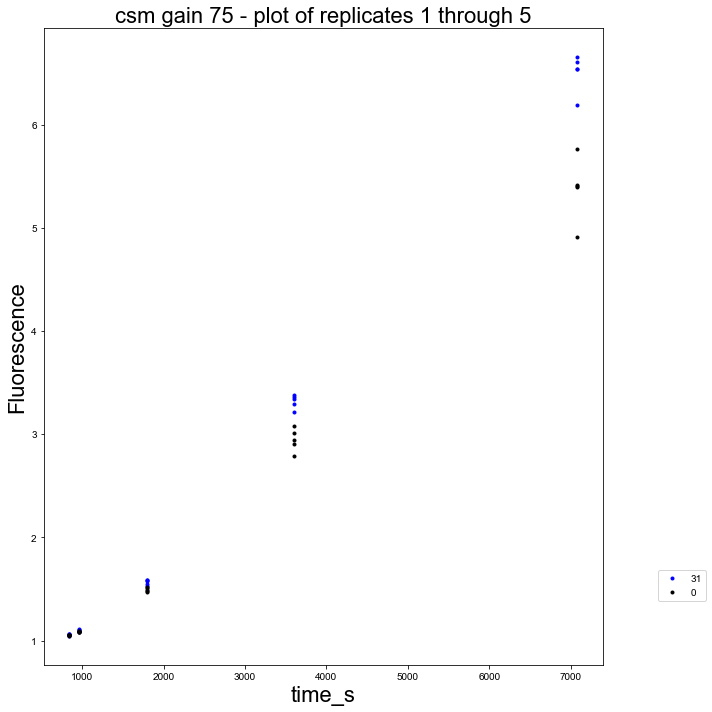

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


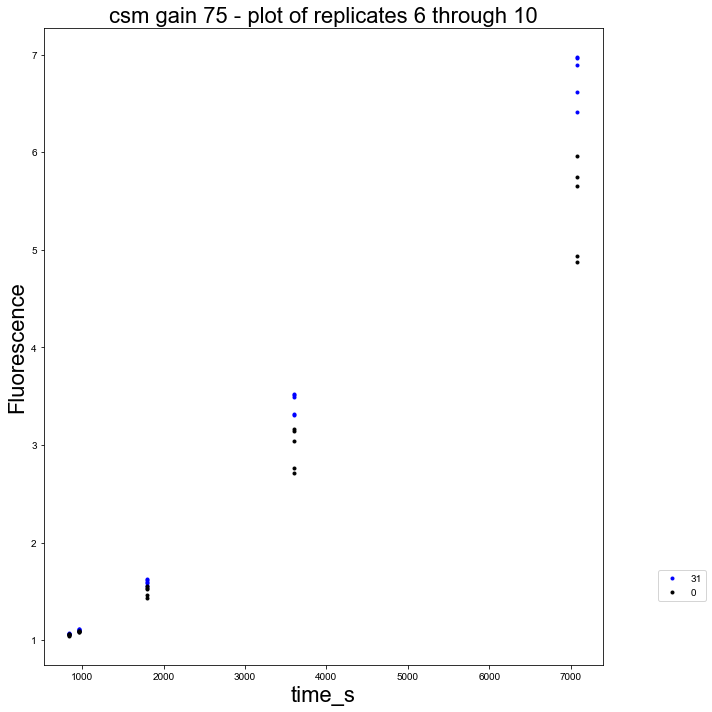

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


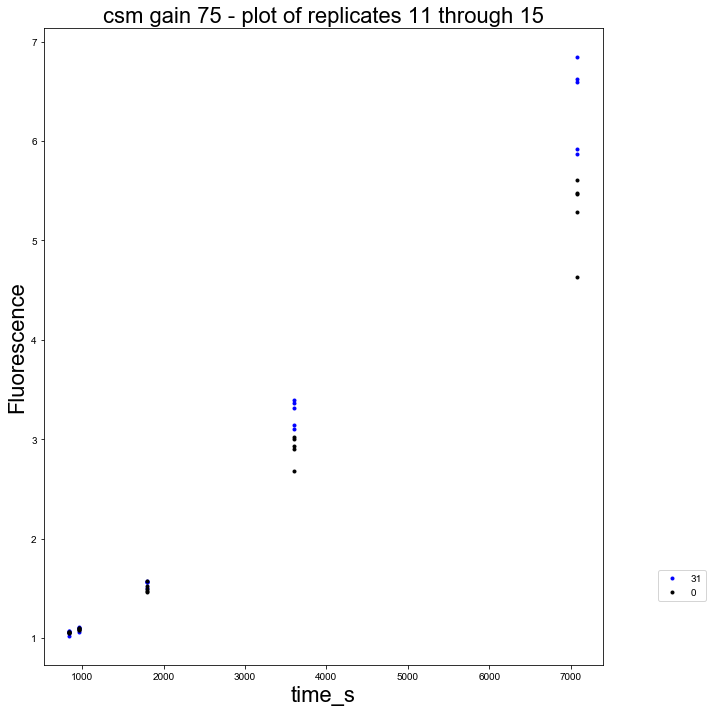

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


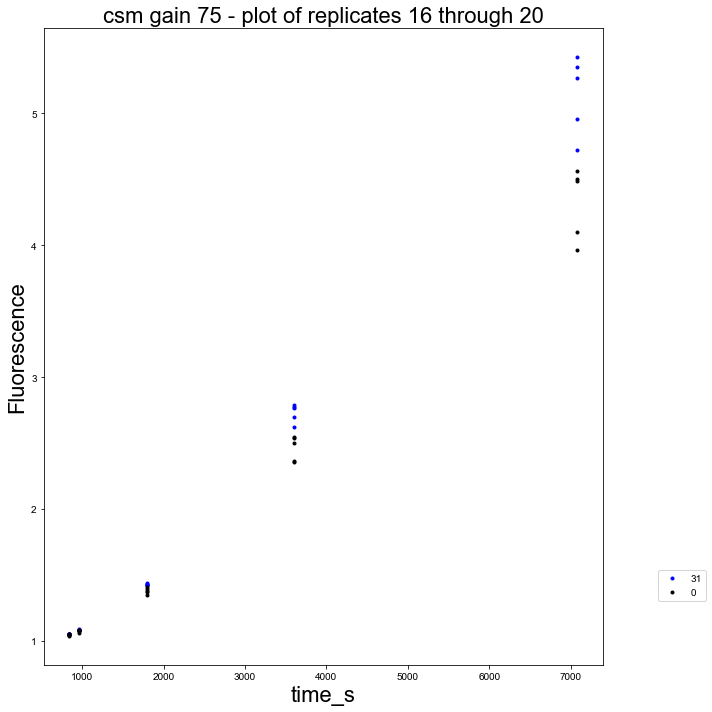

5
5
5
5
5
5
5
5
5
5
(40, 5)
Experimental probability shape
(5, 40)
Zero probability shape
(0,)
Experimental detected shape
[10 11 15 19 19]
[ 7  7  8 15 16]
[ 3  3  3 10 13]
dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '15.6 cp/µl R8', '15.6 cp/µl R9', '15.6 cp/µl R10', '15.6 cp/µl R11',
       '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14', '15.6 cp/µl R15',
       '15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3',
       '0 cp/µl R4', '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8',
       '0 cp/µl R9', '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12',
       '0 cp/µl R13', '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16',
       '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20',
       'Reporter-1', 'Reporter-2', 'Reporter-3'],
   

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


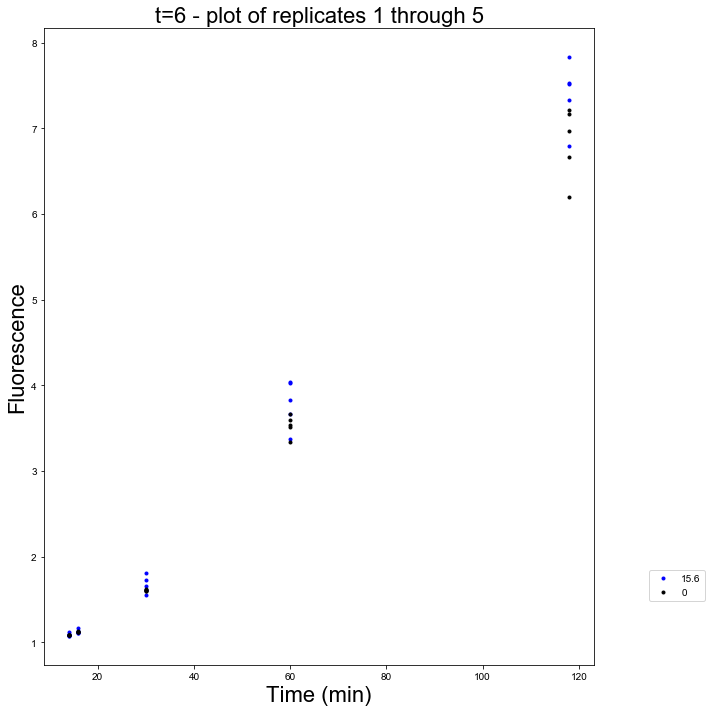

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['15.6 cp/µl R6', '15.6 cp/µl R7', '15.6 cp/µl R8', '15.6 cp/µl R9',
       '15.6 cp/µl R10'],
      dtype='object')
zero.columns: Index(['0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8', '0 cp/µl R9', '0 cp/µl R10'], dtype='object')


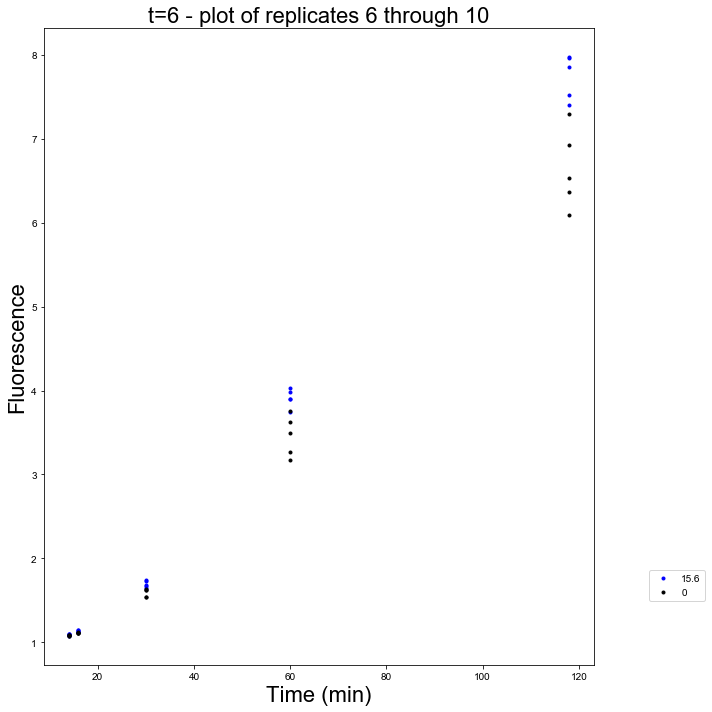

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['15.6 cp/µl R11', '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14',
       '15.6 cp/µl R15'],
      dtype='object')
zero.columns: Index(['0 cp/µl R11', '0 cp/µl R12', '0 cp/µl R13', '0 cp/µl R14',
       '0 cp/µl R15'],
      dtype='object')


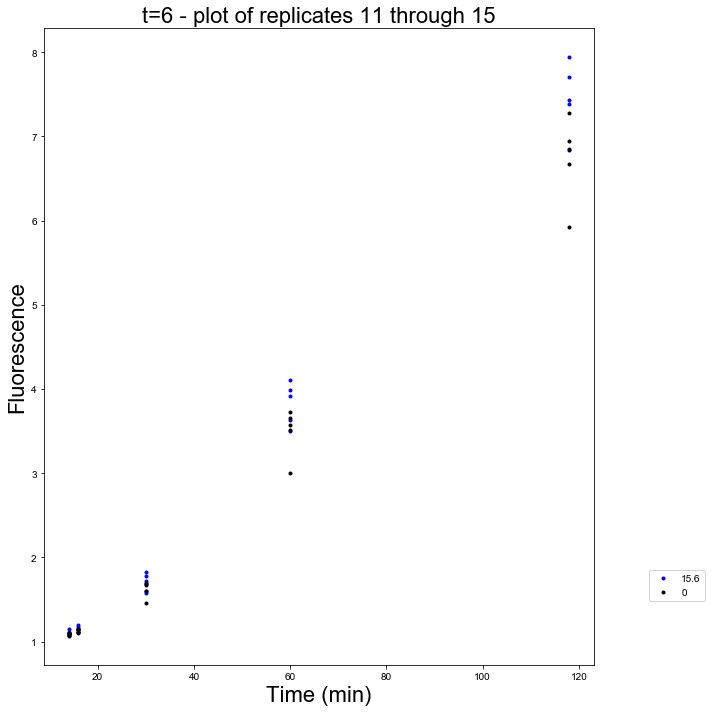

5
5
5
5
5
5
5
5
5
5
replicate.columns: Index(['15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20'],
      dtype='object')
zero.columns: Index(['0 cp/µl R16', '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19',
       '0 cp/µl R20'],
      dtype='object')


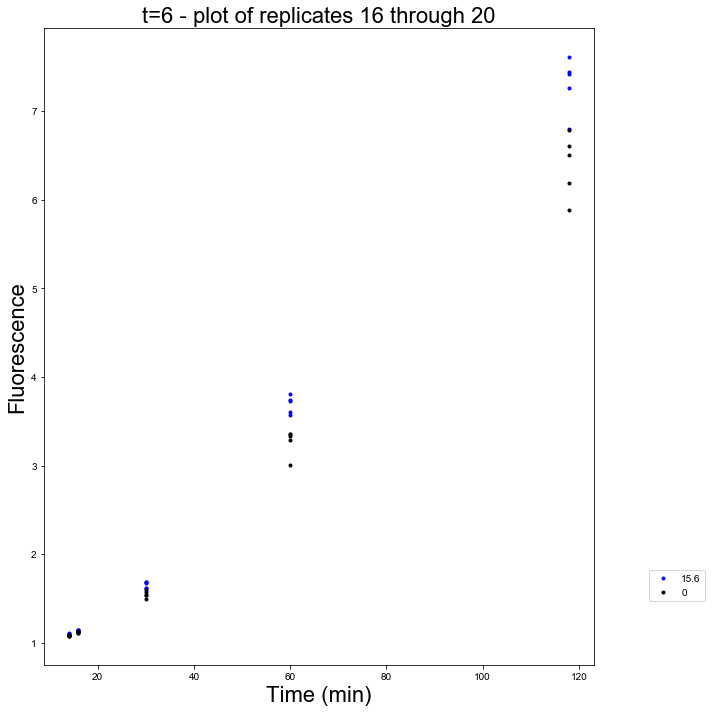

5
5
5
5
5
5
5
5
5
5
(40, 5)
Experimental probability shape
(5, 40)
Zero probability shape
(0,)
Experimental detected shape
[12 13 14 15 14]
[10 12 10 11  9]
[10 10  8  5  5]


In [9]:
# time points only

def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    
    time_points = [14,16,30,60,118]
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        
        indexing = df[time].astype('int')
        mask=[any(tup) for tup in zip(*[indexing==i for i in time_points])]
        print('Working on: '+experiment)
        print(df.columns)
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]
        print(df[time])
        indexing = df[time].astype('int')
        mask=[any(tup) for tup in zip(*[indexing==i*60 for i in time_points])]

    print(df.columns)
    
    
#     print(time_points)
#     print(df[time])
    
#     print(indexing)
    
    time_points = df[time][mask]
    print(time_points)
    
    probability = []
    zero_prob = []
    detected_05 = []
    detected_01 = []
    detected_001 = []
    z_detected_05 = []
    z_detected_01 = []
    z_detected_001 = []
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]][mask]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]][mask]
        print('replicate.columns: %s'%str(replicate.columns))
        print('zero.columns: %s'%str(zero.columns))
        lines_1 = plt.plot(time_points, replicate, 'b.')
        lines_3 = plt.plot(time_points, zero, 'k.')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        file= '_'.join((supplements+conc+' '+experiment+' - plot of replicates %s through %s'%(start, end)).split())
        plt.savefig(file+'.png',format='png')
        plt.savefig(file+'.svg',format='svg')
        plt.show()
        
        norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
                   scale=np.std(zero,axis=1).values.reshape(-1,1))
        
        pvals = norms.sf(replicate)
#         probability.append(pvals)
        
        z_pvals = norms.sf(zero)
#         zero_prob.append(z_pvals)
        
        for row in pvals.T:
            print(len(row))
            detected_05.append(row<=0.05)
            detected_01.append(row<=0.01)
            detected_001.append(row<=0.001)
            probability.append(row)
            
        for row in z_pvals.T:
            print(len(row))
            z_detected_05.append(row<=0.05)
            z_detected_01.append(row<=0.01)
            z_detected_001.append(row<=0.001)
            probability.append(row)
            
            
        
        
    print(np.array(probability).shape)
    
    print('Experimental probability shape')
    p = np.array(probability).T
    print(p.shape)
#     p=p.transpose(1,2,0)
#     print(p.shape)
#     p=p.reshape(p.shape[0],p.shape[1]*p.shape[2])
#     print(p.shape)
    
    print('Zero probability shape')
    zp = np.array(zero_prob).T
    print(zp.shape)
#     zp=zp.transpose(1,2,0)
#     print(p.shape)
#     zp=zp.reshape(zp.shape[0],zp.shape[1]*zp.shape[2])
#     print(zp.shape)
    
    print('Experimental detected shape')
    d_05 = sum(np.array(detected_05))
    d_01 = sum(np.array(detected_01))
    d_001 = sum(np.array(detected_001))
    
    print(d_05)
    print(d_01)
    print(d_001)
    return(d_05, d_01, d_001)




thresh_31_6min = run_tests(plate_size=384, 
                                             plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
                                             data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
                                             conc = '31', norm_point = '4', experiment = 'csm gain 75',
                                             replicate_format='-R')

thresh_31_8min = run_tests(plate_size=384, 
                                             plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
                                             data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
                                             conc = '31', norm_point = '5', experiment = 'csm gain 75',
                                             replicate_format='-R')
thresh_31_10min = run_tests(plate_size=384, 
                                             plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
                                             data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
                                             conc = '31', norm_point = '6', experiment = 'csm gain 75',
                                             replicate_format='-R')
thresh_31_12min = run_tests(plate_size=384, 
                                             plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
                                             data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
                                             conc = '31', norm_point = '6', experiment = 'csm gain 75',
                                             replicate_format='-R')

thresh_15 = run_tests(data_file ='./LOD/2021-02-02 16 cp .xlsx', conc = '15.6',
                                             experiment = 't=6', replicate_format=' cp/µl R')

[[[ 6  5  2]
  [ 8  6  3]
  [13  9  4]
  [19 15  9]
  [19 16 14]]

 [[ 9  5  3]
  [13  9  3]
  [15 11  5]
  [19 15  9]
  [19 16 14]]

 [[10  7  3]
  [11  7  3]
  [15  8  3]
  [19 15 10]
  [19 16 13]]

 [[10  7  3]
  [11  7  3]
  [15  8  3]
  [19 15 10]
  [19 16 13]]

 [[12 10 10]
  [13 12 10]
  [14 10  8]
  [15 11  5]
  [14  9  5]]]
(5, 5, 3)
./LOD/Reviewer/main_text/Fraction_detected


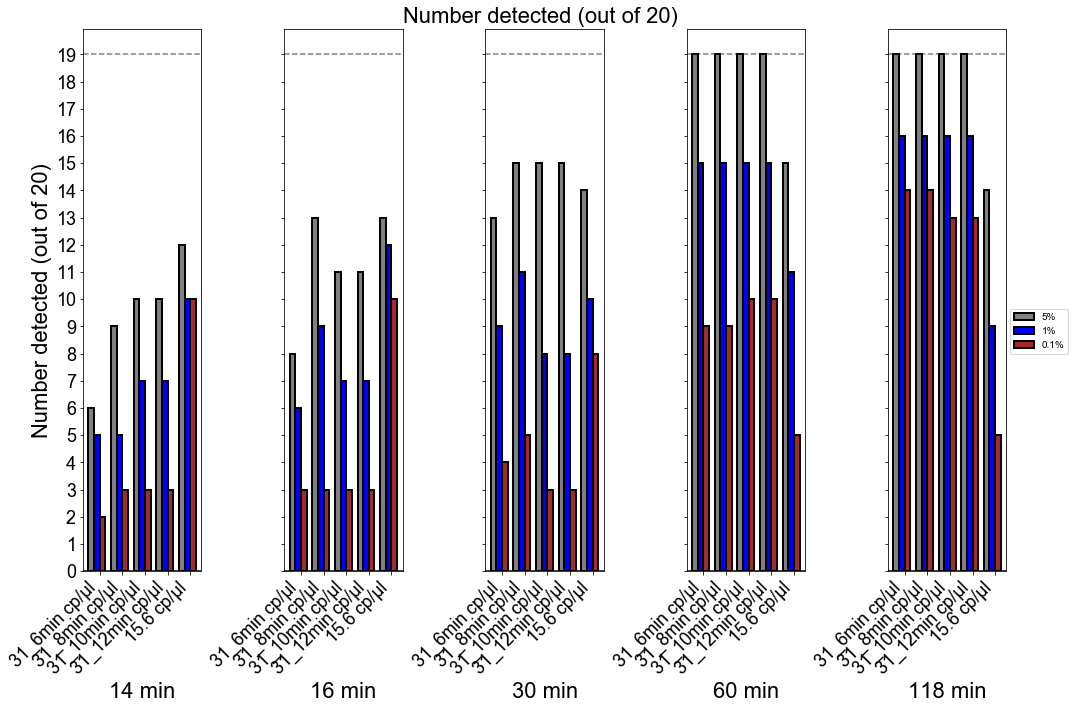

In [10]:
n_det = np.array([np.array(thresh_31_6min).T,
                  np.array(thresh_31_8min).T,
                  np.array(thresh_31_10min).T,
                  np.array(thresh_31_12min).T,
                 np.array(thresh_15).T])
print(n_det)
print(n_det.shape)

colors = ['grey', 'blue','brown','cyan','green']

n_subplots = n_det.shape[1]
n_conditions = n_det.shape[0]
n_threshes = n_det.shape[2]
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(15, 10))  # width, height

axes[0].set_ylabel('Number detected (out of 20)', fontsize=22)
fig.suptitle('Number detected (out of 20)',ha='center', fontsize=22)

axes[0].set_yticks(range(21))
axes[0].set_yticklabels(range(21),ha='right', fontsize=18)

for i in range(n_subplots):
    axes[i].axhline(y=0,c='k',ls='-',)
    axes[i].axhline(y=19,c='k',ls='--',alpha=0.5)
    axes[i].set_xticks(range(n_conditions))
    axes[i].set_xticklabels(['%s cp/µl'%(n) for n in ['31_6min', '31_8min', '31_10min', '31_12min','15.6']],rotation=45, 
                            ha='right', fontsize=18)
    axes[i].set_xlabel([str(t)+' min' for t in [14,16,30,60,118]][i],horizontalalignment='center', fontsize=22)
    for j in range(n_conditions):
        bars = []
        for k in range(n_threshes):
            bars.append(axes[i].bar(j-(0.75/2)+0.25*k,n_det[j,i,k], color= colors[k],
                        width=0.25, edgecolor='k', linewidth=2))

plt.legend(bars,['5%', '1%', '0.1%'],loc=(1.03,0.4))

fig.tight_layout()
plt.subplots_adjust(top=0.95)

file= '_'.join((main_text+'Fraction detected').split())
print(file)
plt.savefig(file+'.png',format='png')
plt.savefig(file+'.svg',format='svg')
plt.show()


['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

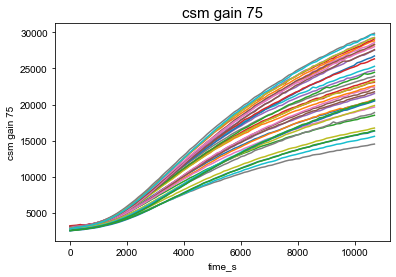

label        0-R1     0-R10     0-R11     0-R12     0-R13     0-R14     0-R15  \
cycle_n                                                                         
4        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5        1.009119  1.014008  1.005803  1.006778  1.010157  1.020014  1.015344   
6        1.032390  1.037249  1.021277  1.028343  1.033421  1.048654  1.043696   
7        1.051887  1.059854  1.047389  1.060690  1.054063  1.076605  1.075384   
8        1.082075  1.083095  1.070600  1.089033  1.084862  1.109041  1.106404   
...           ...       ...       ...       ...       ...       ...       ...   
86       6.314465  6.410379  5.839458  7.041898  6.864024  7.437888  7.293863   
87       6.359748  6.450812  5.856544  7.084720  6.890236  7.484817  7.317879   
88       6.387421  6.492200  5.888459  7.126001  6.938401  7.509317  7.379586   
89       6.441824  6.544094  5.929400  7.197782  6.992136  7.589372  7.481654   
90       6.483962  6.593123  5.966151  7.220579  7.052097  7.640442  7.472982   

label       0-R16     0-R17     0-R18  ...     31-R2    31-R20     31-R3  \
cycle_n                                ...                                 
4        1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
5        1.019286  1.015974  1.013409  ...  1.020716  1.018498  0.956869   
6        1.045714  1.033369  1.040579  ...  1.036409  1.046985  0.975775   
7        1.067857  1.058218  1.057869  ...  1.064030  1.068812  1.000000   
8        1.100714  1.079517  1.081863  ...  1.100439  1.099889  1.033973   
...           ...       ...       ...  ...       ...       ...       ...   
86       5.072500  5.797657  5.360621  ...  8.800691  7.437292  8.306352   
87       5.095357  5.827831  5.385674  ...  8.874451  7.475768  8.401477   
88       5.117143  5.859425  5.414608  ...  8.940678  7.483167  8.471492   
89       5.162143  5.912673  5.459774  ...  9.008475  7.576767  8.513442   
90       5.187857  5.944622  5.502117  ...  9.045825  7.643729  8.594978   

label       31-R4     31-R5     31-R6     31-R7     31-R8     31-R9     time_s  
cycle_n                                                                         
4        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    360.009  
5        1.020938  1.014706  1.017072  1.024944  1.021277  1.025700    480.013  
6        1.040938  1.039322  1.037306  1.047330  1.048537  1.052718    600.016  
7        1.067187  1.058504  1.071451  1.078350  1.078790  1.080066    720.020  
8        1.098125  1.087276  1.106228  1.120883  1.116689  1.119275    840.025  
...           ...       ...       ...       ...       ...       ...        ...  
86       8.909375  8.795077  8.611761  9.288455  9.442819  9.540692  10200.455  
87       8.964375  8.830882  8.667088  9.335785  9.514628  9.600329  10320.464  
88       9.035625  8.901215  8.744230  9.420211  9.614694  9.661944  10440.471  
89       9.109063  8.981777  8.785963  9.497921  9.668883  9.779572  10560.473  
90       9.148438  9.055946  8.858046  9.553566  9.726396  9.769687  10680.476  

[87 rows x 41 columns]

In [11]:
# time points only

def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    
    time_points = [14,16,30,60,118]
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        
        indexing = df[time].astype('int')
        mask=[any(tup) for tup in zip(*[indexing==i for i in time_points])]
        print('Working on: '+experiment)
        print(df.columns)
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]
    return(df)
        





norm_df = run_tests(plate_size=384, 
                                             plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
                                             data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
                                             conc = '31', norm_point = '4', experiment = 'csm gain 75',
                                             replicate_format='-R')
norm_df

In [12]:
norm_df.to_csv(main_text+"31cpul_normalized_at_timepoint4.csv")

['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

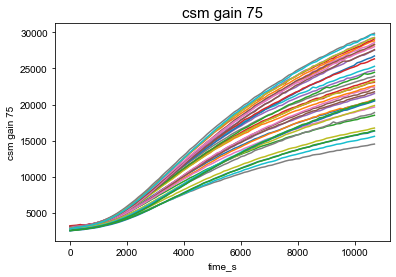

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


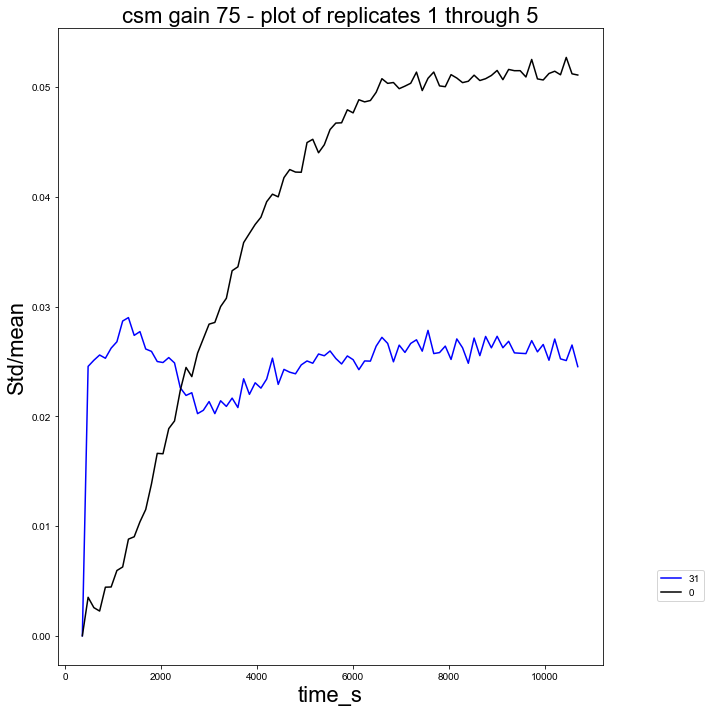

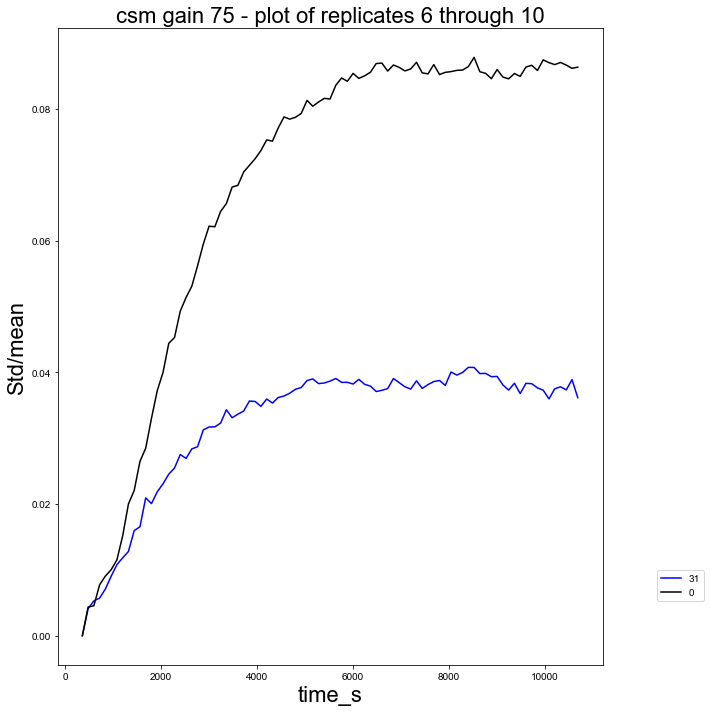

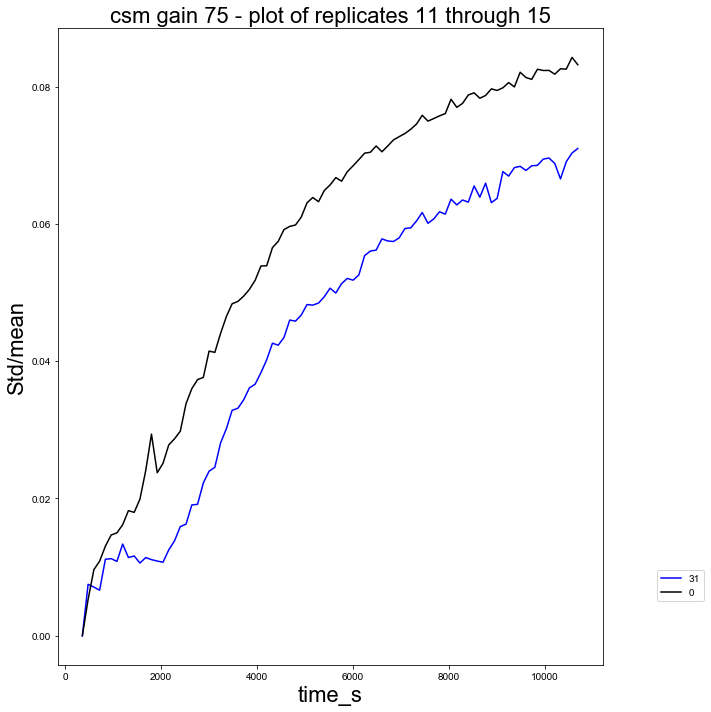

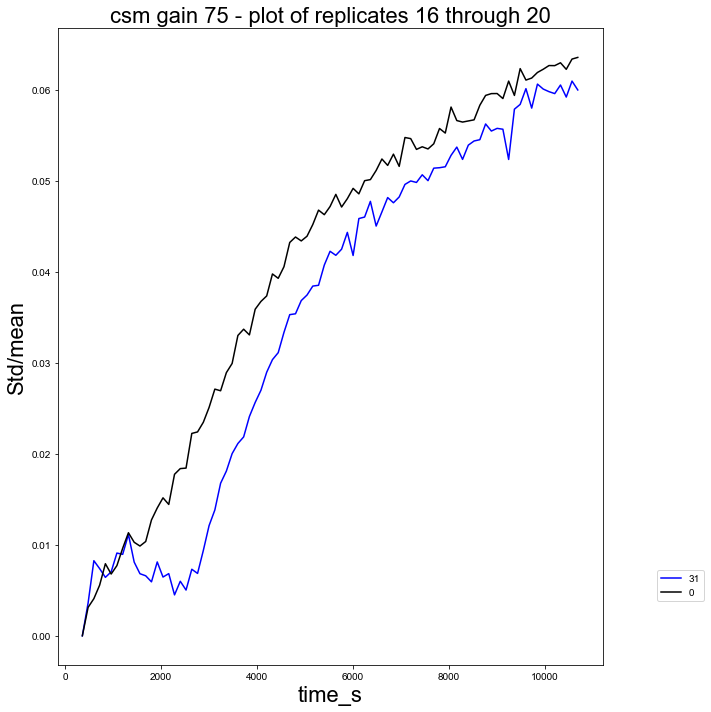

In [13]:
def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    end = 30*60
    
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        print('Working on: '+experiment)
        print(df.columns)
        end=end/60
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]

#     print(df.columns)
#     print(end)
#     for start, end in [(1,5), (6,10),(11,15),(16,20)]:
#         plt.figure(figsize=(10,10))
#         replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
#         zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
#         print('replicate.columns: %s'%str(replicate.columns))
#         print('zero.columns: %s'%str(zero.columns))
#         lines_1 = plt.plot(df[time], replicate, 'b')
#         lines_3 = plt.plot(df[time], zero, 'k')
#         plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
#         plt.xlabel(time, fontsize=22)
#         plt.ylabel('Fluorescence', fontsize=22)
#         plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
#         plt.tight_layout()
#         plt.show()
        
    pct_err = []
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]    
        pct_err.append(np.std(replicate,axis=1).values/np.mean(replicate,axis=1).values)
        lines_1 = plt.plot(df[time], pct_err[-1], 'b')
        lines_3 = plt.plot(df[time], np.std(zero,axis=1).values/np.mean(zero,axis=1).values, 'k')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Std/mean', fontsize=22)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        plt.show()
    
    return((pct_err, df[time]))
        
pct_err_31, time_31 = run_tests(plate_size=384, 
         plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
         data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
         conc = '31', norm_point = '4', experiment = 'csm gain 75',
         replicate_format='-R')

dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '15.6 cp/µl R8', '15.6 cp/µl R9', '15.6 cp/µl R10', '15.6 cp/µl R11',
       '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14', '15.6 cp/µl R15',
       '15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3',
       '0 cp/µl R4', '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8',
       '0 cp/µl R9', '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12',
       '0 cp/µl R13', '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16',
       '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20',
       'Reporter-1', 'Reporter-2', 'Reporter-3'],
      dtype='object')


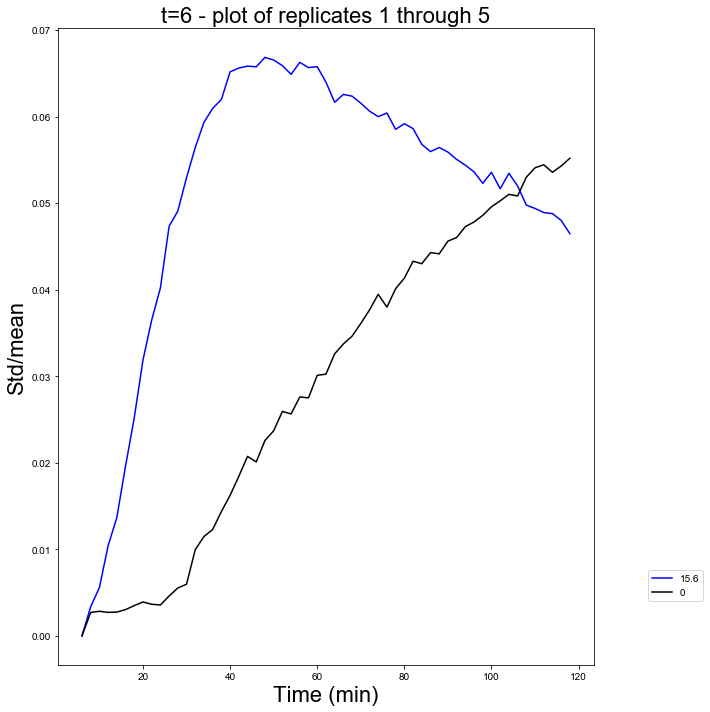

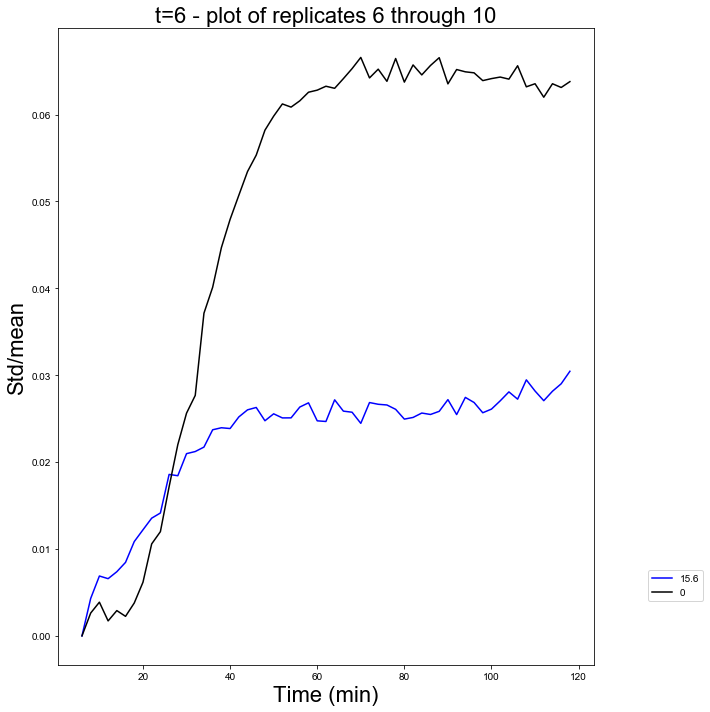

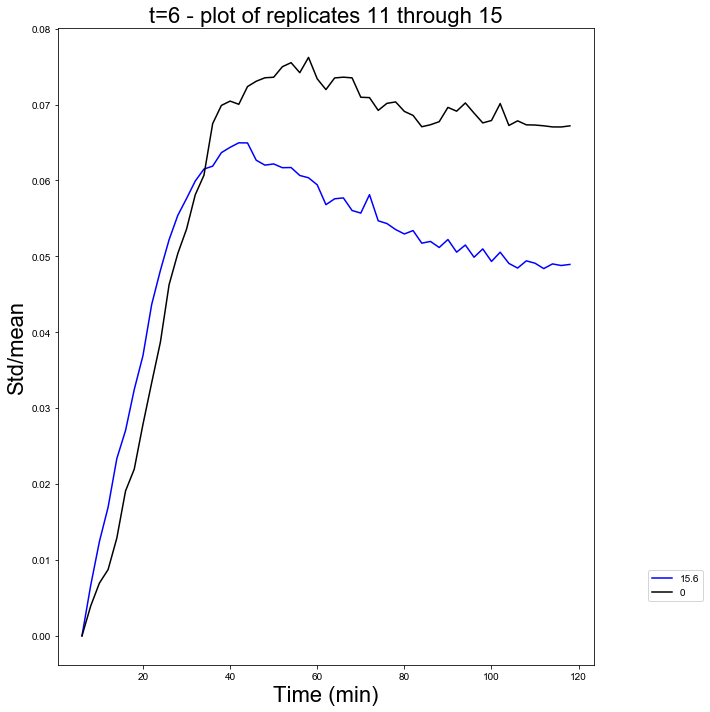

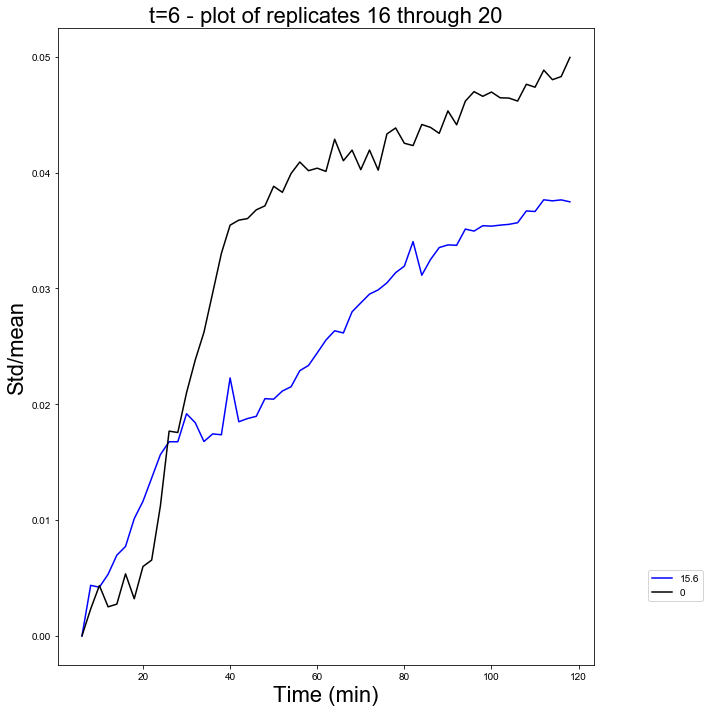

In [14]:
pct__err_15, time_15 = run_tests(data_file ='./LOD/2021-02-02 16 cp .xlsx', conc = '15.6',
                                             experiment = 't=6', replicate_format=' cp/µl R')

dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '63 cp/µl-1', '63 cp/µl-2', '63 cp/µl-3', '63 cp/µl-4',
       '63 cp/µl-5', '63 cp/µl-6', '63 cp/µl-7', '63 cp/µl-8', '63 cp/µl-9',
       '63 cp/µl-10', '63 cp/µl-11', '63 cp/µl-12', '63 cp/µl-13',
       '63 cp/µl-14', '63 cp/µl-15', '63 cp/µl-16', '63 cp/µl-17',
       '63 cp/µl-18', '63 cp/µl-19', '63 cp/µl-20', '0 cp/µl-1', '0 cp/µl-2',
       '0 cp/µl-3', '0 cp/µl-4', '0 cp/µl-5', '0 cp/µl-6', '0 cp/µl-7',
       '0 cp/µl-8', '0 cp/µl-9', '0 cp/µl-10', '0 cp/µl-11', '0 cp/µl-12',
       '0 cp/µl-13', '0 cp/µl-14', '0 cp/µl-15', '0 cp/µl-16', '0 cp/µl-17',
       '0 cp/µl-18', '0 cp/µl-19', '0 cp/µl-20'],
      dtype='object')


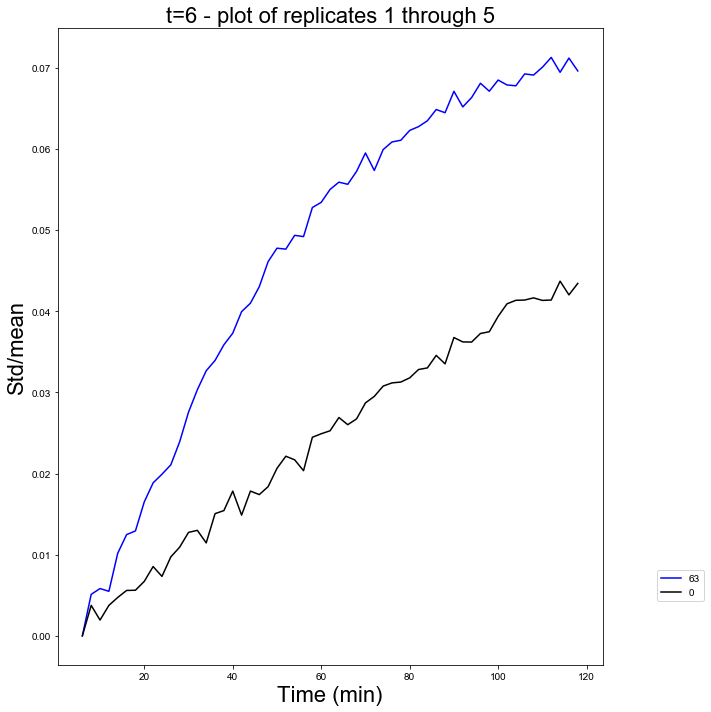

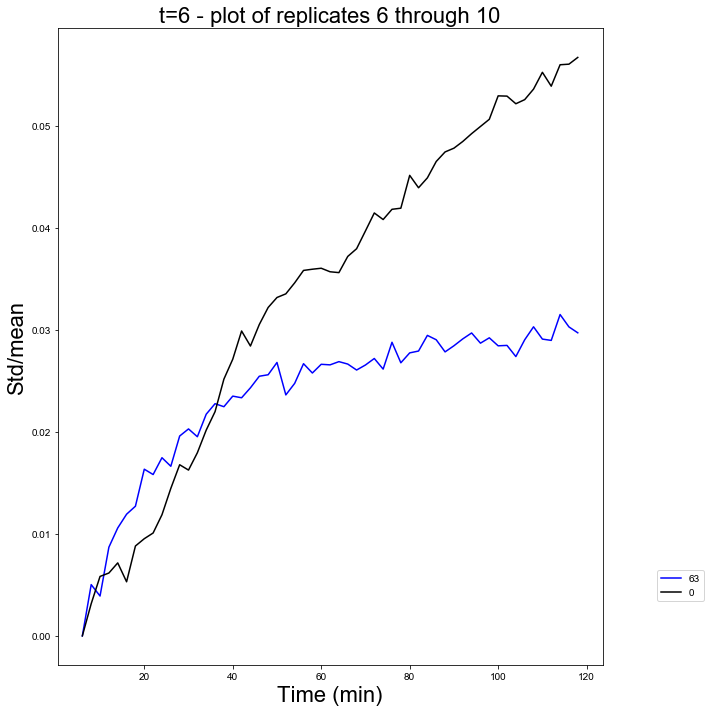

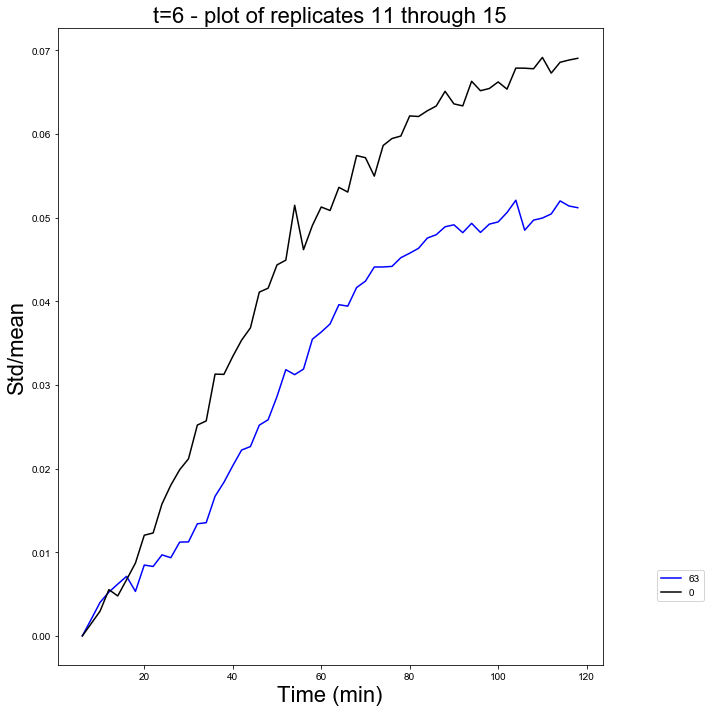

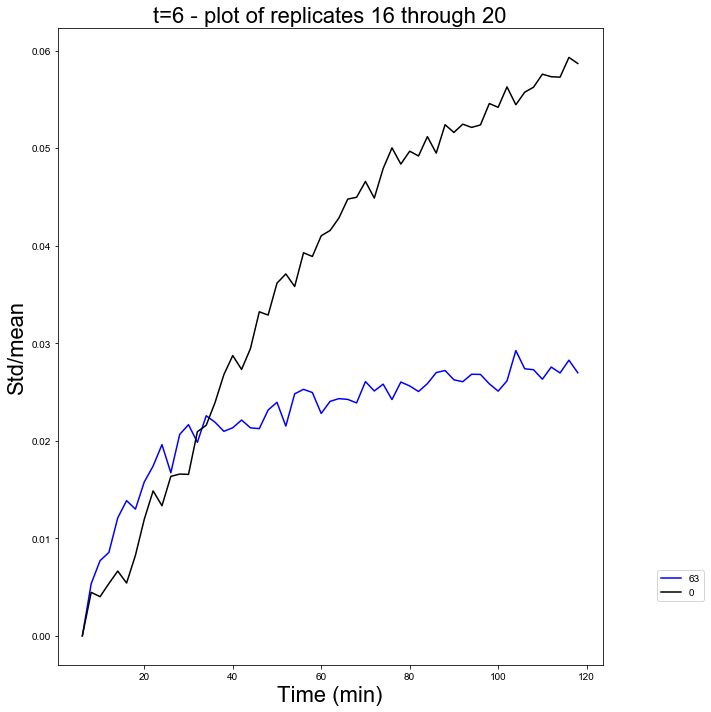

In [15]:
pct_err_63, time_63 = run_tests(data_file ='./LOD/2020-02-04 - 63 cp data.xlsx', conc = '63',
                                             experiment = 't=6', replicate_format=' cp/µl-')

dict_keys(['Raw data', 'Normalized at t=10', 'Normalized at t=6', 'Normalized at t=0'])
Working on: Normalized at t=6
Index(['Time (min)', '125 cp/µl R1', '125 cp/µl R2', '125 cp/µl R3',
       '125 cp/µl R4', '125 cp/µl R5', '125 cp/µl R6', '125 cp/µl R7',
       '125 cp/µl R8', '125 cp/µl R9', '125 cp/µl R10', '125 cp/µl R11',
       '125 cp/µl R12', '125 cp/µl R13', '125 cp/µl R14', '125 cp/µl R15',
       '125 cp/µl R16', '125 cp/µl R17', '125 cp/µl R18', '125 cp/µl R19',
       '125 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3', '0 cp/µl R4',
       '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8', '0 cp/µl R9',
       '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12', '0 cp/µl R13',
       '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16', '0 cp/µl R17',
       '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20', 'Reporter-1', 'Reporter-2',
       'Reporter-3'],
      dtype='object')


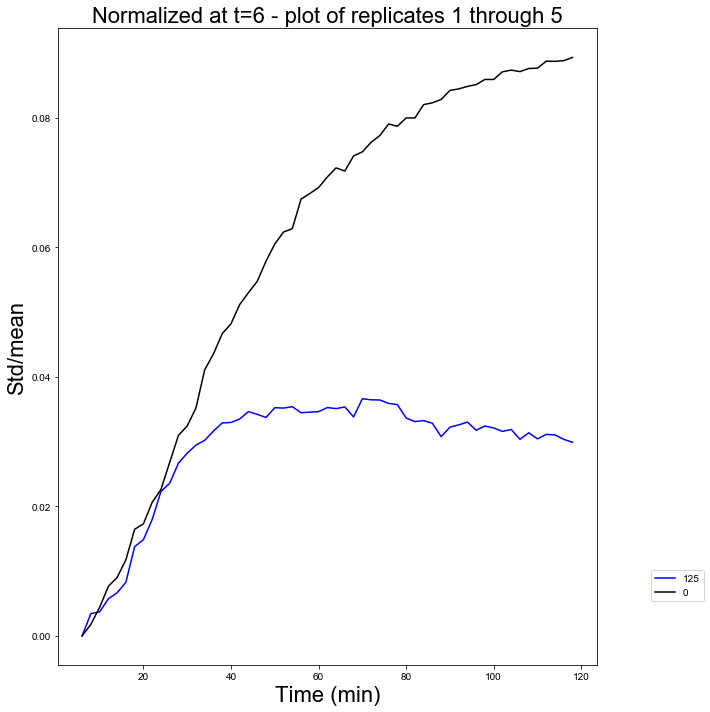

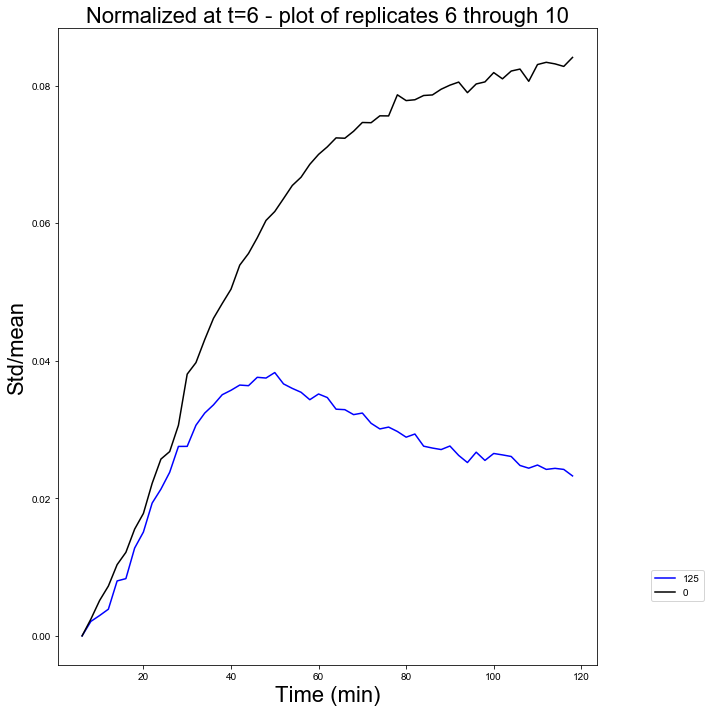

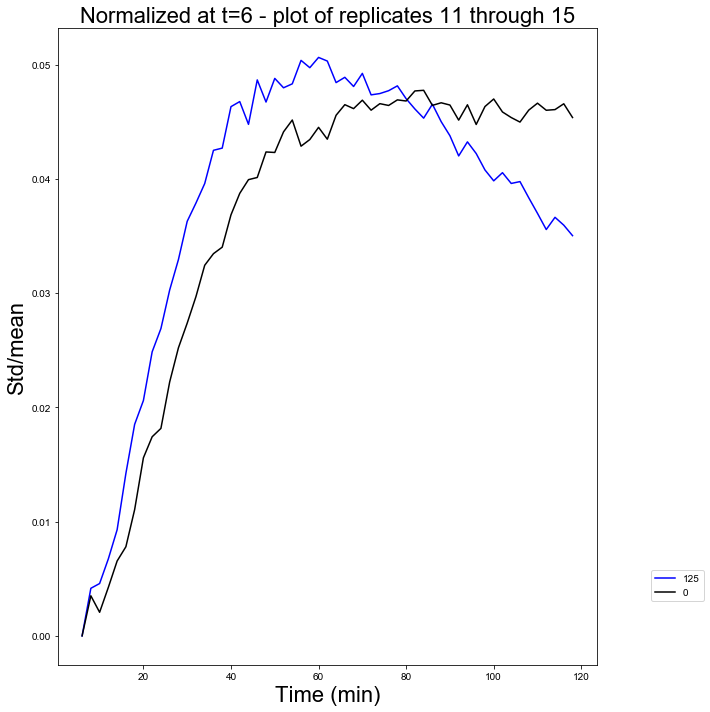

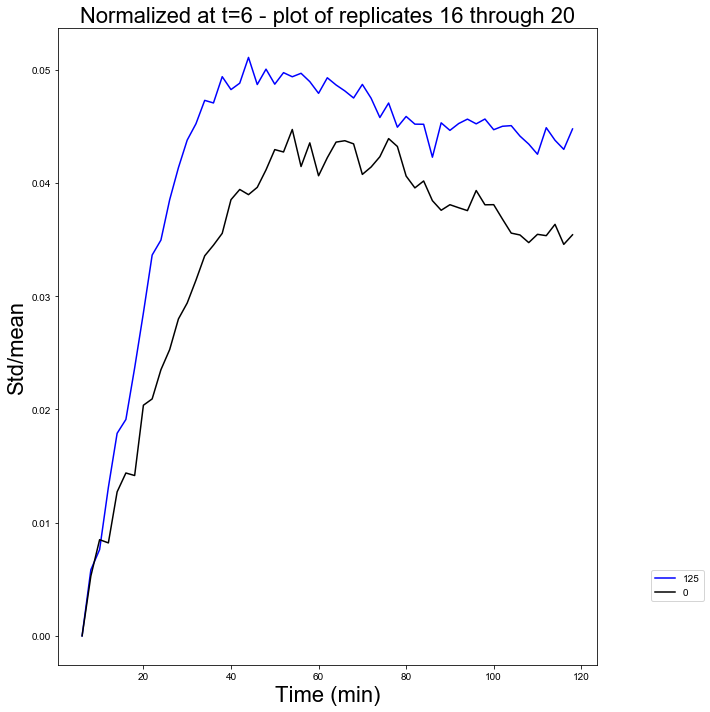

In [16]:
pct_err_125, time_125 = run_tests()

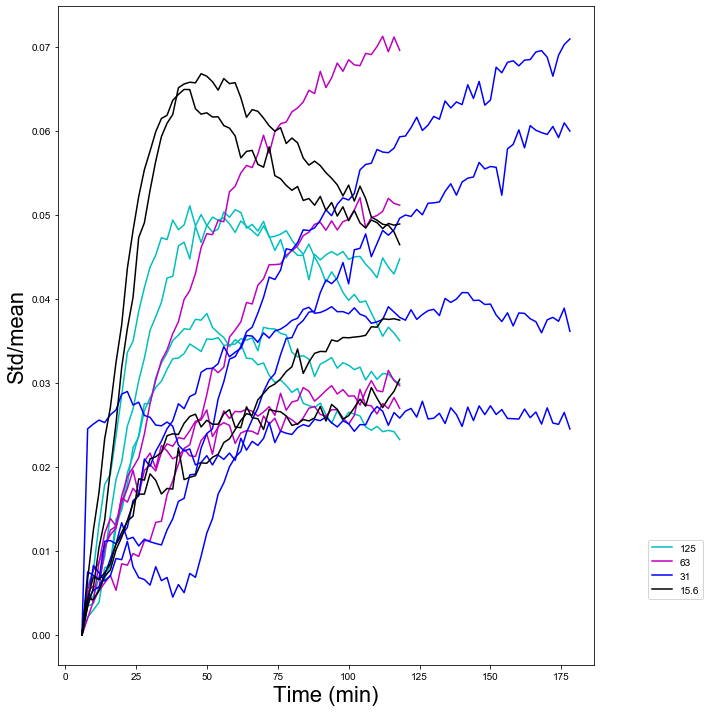

In [17]:
plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')
plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

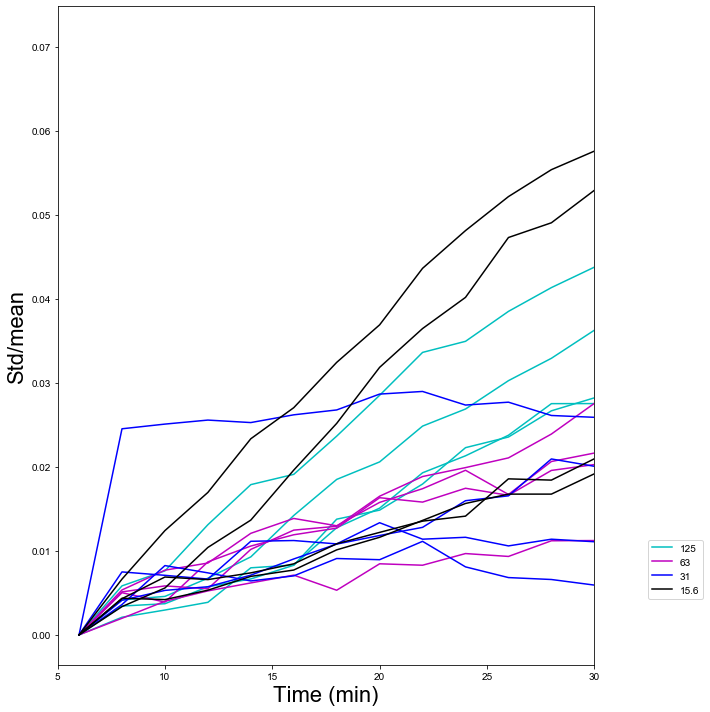

In [18]:
plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')

plt.xlim(5,30)
plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

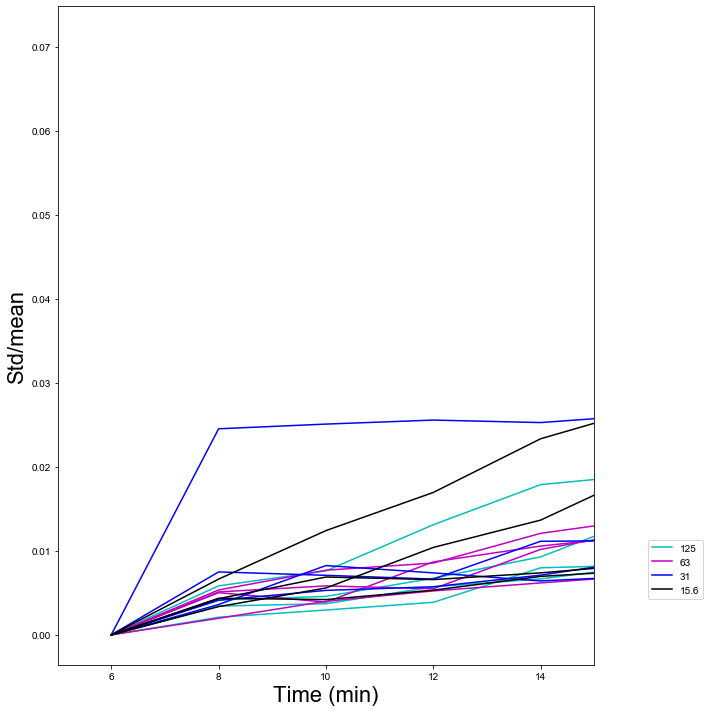

In [19]:
plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')
plt.xlim(5,15)

plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

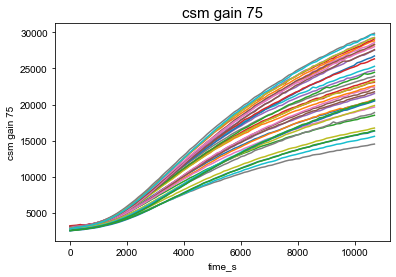

dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '15.6 cp/µl R8', '15.6 cp/µl R9', '15.6 cp/µl R10', '15.6 cp/µl R11',
       '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14', '15.6 cp/µl R15',
       '15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3',
       '0 cp/µl R4', '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8',
       '0 cp/µl R9', '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12',
       '0 cp/µl R13', '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16',
       '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20',
       'Reporter-1', 'Reporter-2', 'Reporter-3'],
      dtype='object')
dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '63 cp/µl-1', '63 cp/µl-2', '63 cp/µl-3', '63 cp/µl-4',
       '63 cp/µl-5', '63 cp/µl-

In [20]:
def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    end = 30*60
    
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        print('Working on: '+experiment)
        print(df.columns)
        end=end/60
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]

#     print(df.columns)
#     print(end)
#     for start, end in [(1,5), (6,10),(11,15),(16,20)]:
#         plt.figure(figsize=(10,10))
#         replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
#         zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
#         print('replicate.columns: %s'%str(replicate.columns))
#         print('zero.columns: %s'%str(zero.columns))
#         lines_1 = plt.plot(df[time], replicate, 'b')
#         lines_3 = plt.plot(df[time], zero, 'k')
#         plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
#         plt.xlabel(time, fontsize=22)
#         plt.ylabel('Fluorescence', fontsize=22)
#         plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
#         plt.tight_layout()
#         plt.show()
        
    pct_err = []
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
#         plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]    
        pct_err.append(np.std(zero,axis=1).values/np.mean(zero,axis=1).values)
#         lines_1 = plt.plot(df[time], pct_err[-1], 'b')
#         lines_3 = plt.plot(df[time], np.std(zero,axis=1).values/np.mean(zero,axis=1).values, 'k')
#         plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
#         plt.xlabel(time, fontsize=22)
#         plt.ylabel('Std/mean', fontsize=22)
#         plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
#         plt.tight_layout()
#         plt.show()
    
    return((pct_err, df[time]))
        
pct_err_31, time_31 = run_tests(plate_size=384, 
         plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
         data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
         conc = '31', norm_point = '4', experiment = 'csm gain 75',
         replicate_format='-R')

pct__err_15, time_15 = run_tests(data_file ='./LOD/2021-02-02 16 cp .xlsx', conc = '15.6',
                                             experiment = 't=6', replicate_format=' cp/µl R')

pct_err_63, time_63 = run_tests(data_file ='./LOD/2020-02-04 - 63 cp data.xlsx', conc = '63',
                                             experiment = 't=6', replicate_format=' cp/µl-')
pct_err_125, time_125 = run_tests()

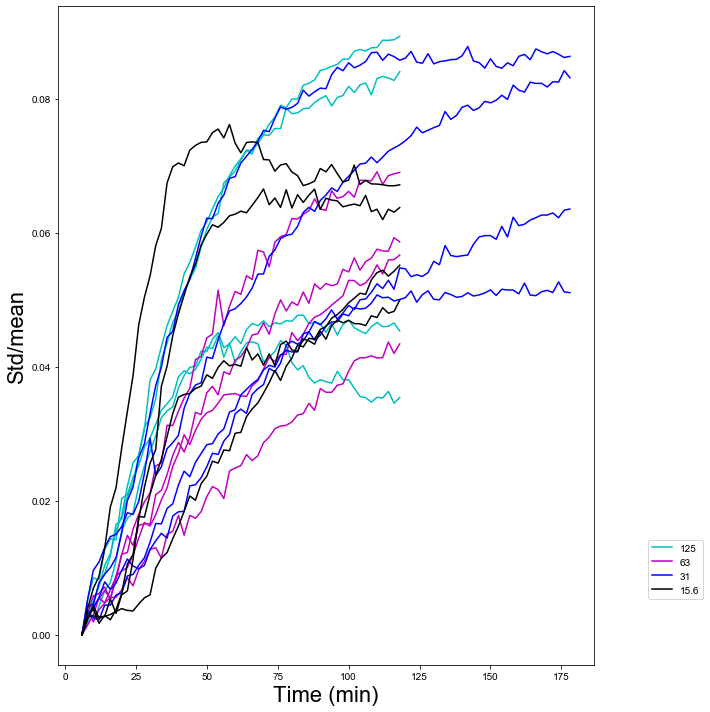

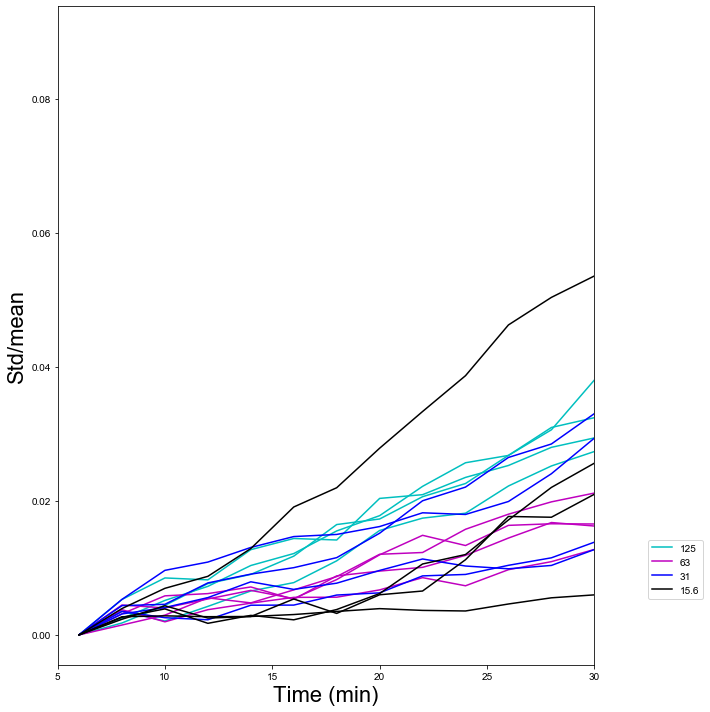

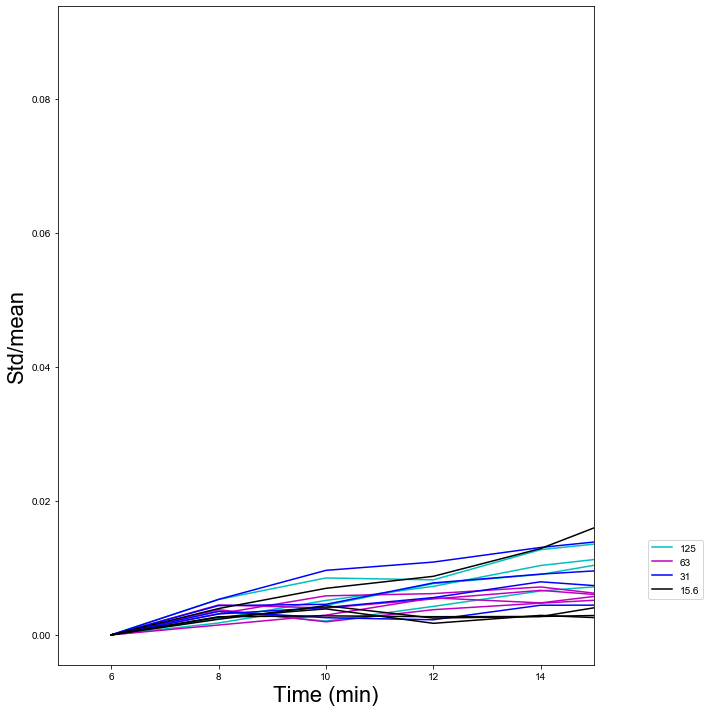

In [21]:
plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')
plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')

plt.xlim(5,30)
plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')
plt.xlim(5,15)

plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

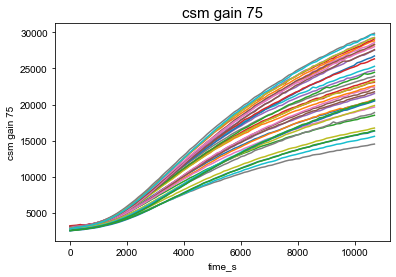

dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '15.6 cp/µl R8', '15.6 cp/µl R9', '15.6 cp/µl R10', '15.6 cp/µl R11',
       '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14', '15.6 cp/µl R15',
       '15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3',
       '0 cp/µl R4', '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8',
       '0 cp/µl R9', '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12',
       '0 cp/µl R13', '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16',
       '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20',
       'Reporter-1', 'Reporter-2', 'Reporter-3'],
      dtype='object')
dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '63 cp/µl-1', '63 cp/µl-2', '63 cp/µl-3', '63 cp/µl-4',
       '63 cp/µl-5', '63 cp/µl-

<ipython-input-22-d26a6cdc6d58>:62: RuntimeWarning: invalid value encountered in true_divide
  pct_err.append(np.std(zero,axis=1).values/(np.mean(replicate,axis=1).values-np.mean(zero,axis=1).values))


In [22]:
def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    end = 30*60
    
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        print('Working on: '+experiment)
        print(df.columns)
        end=end/60
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]

#     print(df.columns)
#     print(end)
#     for start, end in [(1,5), (6,10),(11,15),(16,20)]:
#         plt.figure(figsize=(10,10))
#         replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
#         zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]
#         print('replicate.columns: %s'%str(replicate.columns))
#         print('zero.columns: %s'%str(zero.columns))
#         lines_1 = plt.plot(df[time], replicate, 'b')
#         lines_3 = plt.plot(df[time], zero, 'k')
#         plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
#         plt.xlabel(time, fontsize=22)
#         plt.ylabel('Fluorescence', fontsize=22)
#         plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
#         plt.tight_layout()
#         plt.show()
        
    pct_err = []
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
#         plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]]    
        pct_err.append(np.std(zero,axis=1).values/(np.mean(replicate,axis=1).values-np.mean(zero,axis=1).values))
#         lines_1 = plt.plot(df[time], pct_err[-1], 'b')
#         lines_3 = plt.plot(df[time], np.std(zero,axis=1).values/np.mean(zero,axis=1).values, 'k')
#         plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
#         plt.xlabel(time, fontsize=22)
#         plt.ylabel('Std/mean', fontsize=22)
#         plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
#         plt.tight_layout()
#         plt.show()
    
    return((pct_err, df[time]))
        
pct_err_31, time_31 = run_tests(plate_size=384, 
         plate_map = './growth/plate_specs/tecan_384w_platemap_20210210 run.csv', 
         data_file ='growth/data/Method_Csm6 TYL_20210210_31 cp.xlsx', 
         conc = '31', norm_point = '4', experiment = 'csm gain 75',
         replicate_format='-R')

pct__err_15, time_15 = run_tests(data_file ='./LOD/2021-02-02 16 cp .xlsx', conc = '15.6',
                                             experiment = 't=6', replicate_format=' cp/µl R')

pct_err_63, time_63 = run_tests(data_file ='./LOD/2020-02-04 - 63 cp data.xlsx', conc = '63',
                                             experiment = 't=6', replicate_format=' cp/µl-')
pct_err_125, time_125 = run_tests()

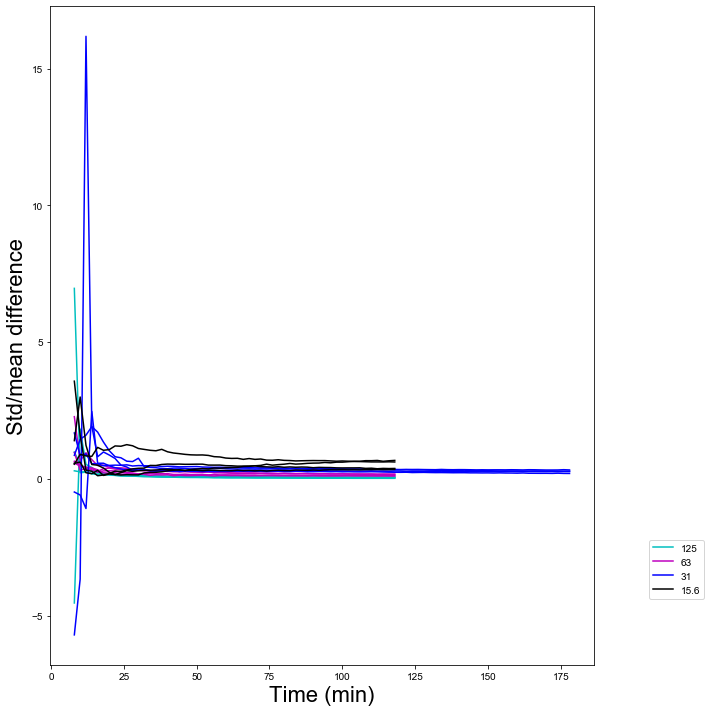

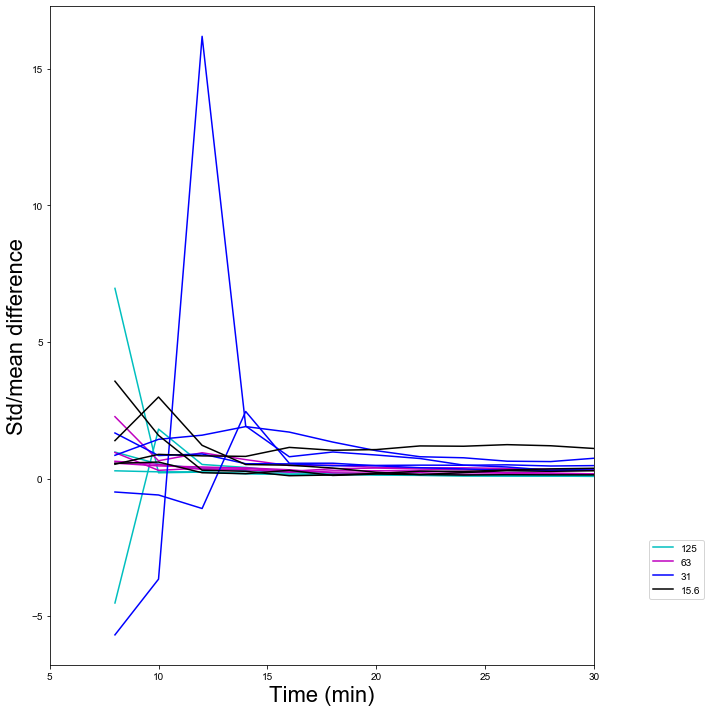

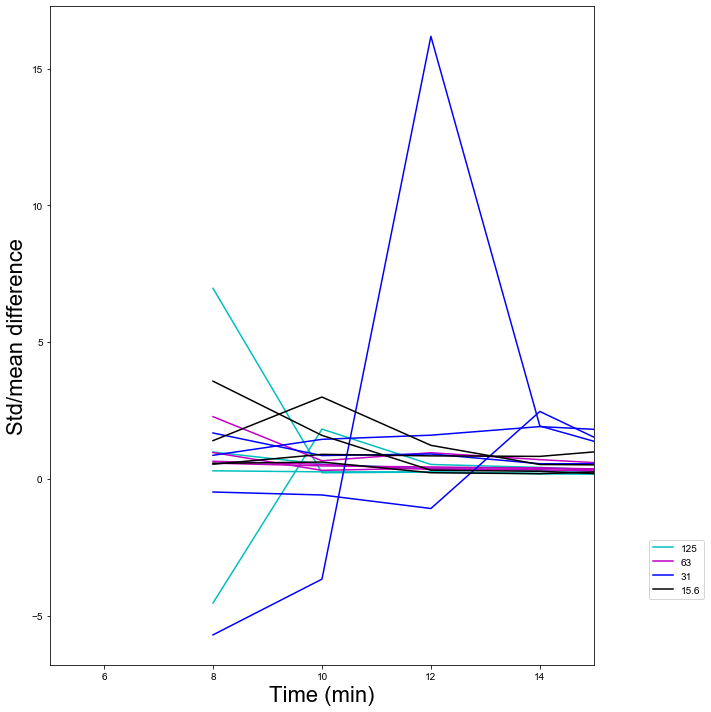

In [23]:
plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')
plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean difference', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')

plt.xlim(5,30)
plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean difference', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
lines_0 = plt.plot(time_125, np.array(pct_err_125).T, 'c')
lines_2 = plt.plot(time_63, np.array(pct_err_63).T, 'm')
lines_1 = plt.plot(time_31/60, np.array(pct_err_31).T, 'b')
lines_3 = plt.plot(time_15, np.array(pct__err_15).T, 'k')
plt.xlim(5,15)

plt.xlabel("Time (min)", fontsize=22)
plt.ylabel('Std/mean difference', fontsize=22)
plt.legend([lines_0[0],lines_2[0],lines_1[0],lines_3[0]],['125','63','31','15.6'],loc=(1.1,0.1))
plt.tight_layout()
plt.show()

/Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe_distro
mkdir: ./LOD/Reviewer/: File exists
mkdir: ./LOD/Reviewer/main_text/: File exists
mkdir: ./LOD/Reviewer/Supplements/: File exists
Icon?               growth              notebooks
LOD                 main_text           prisim_format.py
__init__.py         making_prisim_files supplements

Icon?       Supplements main_text
dict_keys(['Raw data', 'Normalized at t=10', 'Normalized at t=6', 'Normalized at t=0'])
Working on: Normalized at t=6
Index(['Time (min)', '125 cp/µl R1', '125 cp/µl R2', '125 cp/µl R3',
       '125 cp/µl R4', '125 cp/µl R5', '125 cp/µl R6', '125 cp/µl R7',
       '125 cp/µl R8', '125 cp/µl R9', '125 cp/µl R10', '125 cp/µl R11',
       '125 cp/µl R12', '125 cp/µl R13', '125 cp/µl R14', '125 cp/µl R15',
       '125 cp/µl R16', '125 cp/µl R17', '125 cp/µl R18', '125 cp/µl R19',
       '125 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3', '0 cp/µl R4',
       '0 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


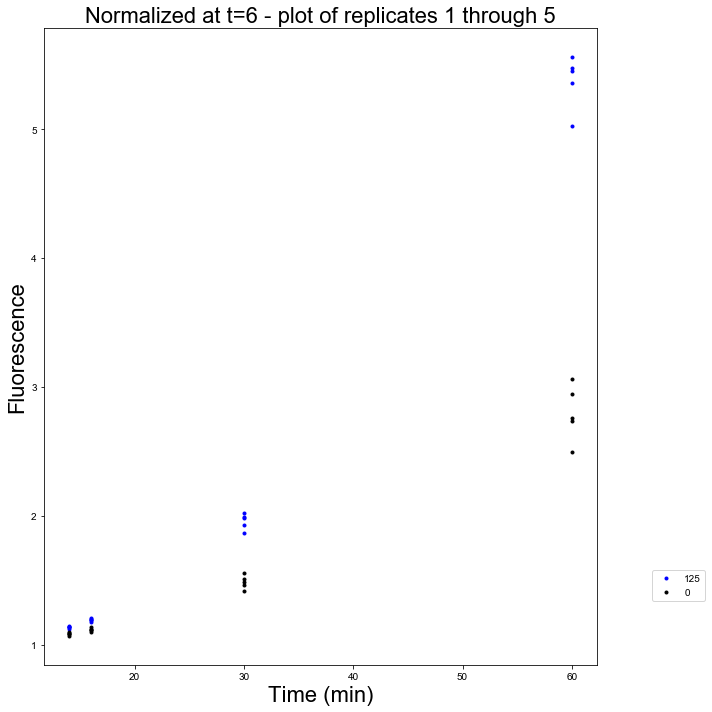

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['125 cp/µl R6', '125 cp/µl R7', '125 cp/µl R8', '125 cp/µl R9',
       '125 cp/µl R10'],
      dtype='object')
zero.columns: Index(['0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8', '0 cp/µl R9', '0 cp/µl R10'], dtype='object')


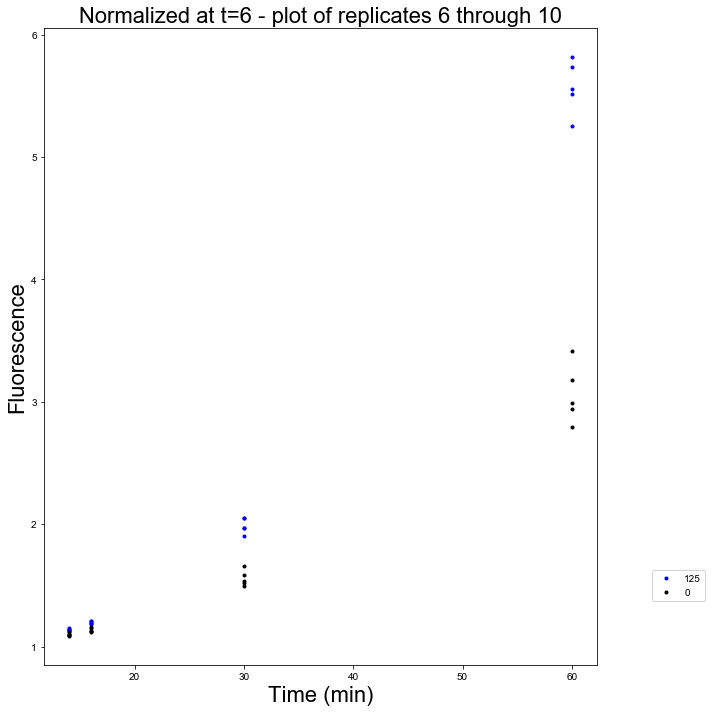

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['125 cp/µl R11', '125 cp/µl R12', '125 cp/µl R13', '125 cp/µl R14',
       '125 cp/µl R15'],
      dtype='object')
zero.columns: Index(['0 cp/µl R11', '0 cp/µl R12', '0 cp/µl R13', '0 cp/µl R14',
       '0 cp/µl R15'],
      dtype='object')


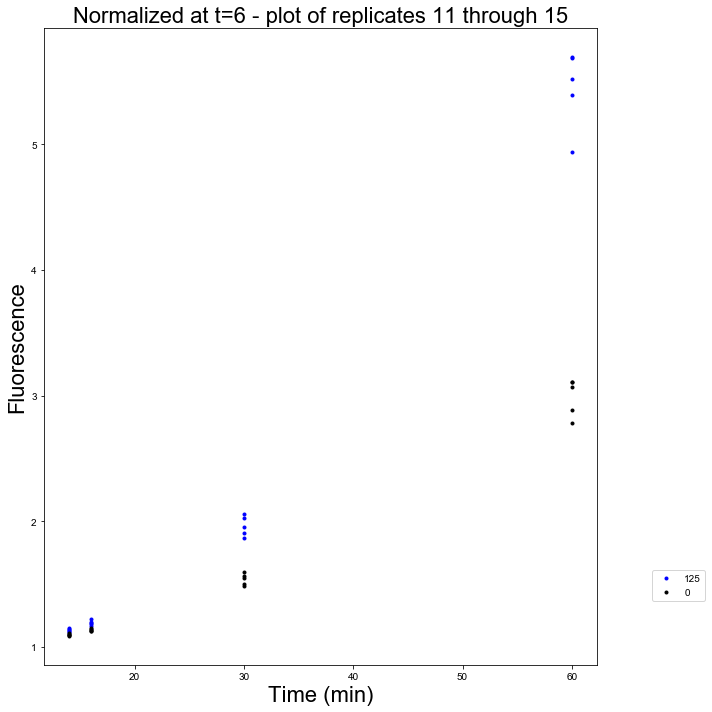

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['125 cp/µl R16', '125 cp/µl R17', '125 cp/µl R18', '125 cp/µl R19',
       '125 cp/µl R20'],
      dtype='object')
zero.columns: Index(['0 cp/µl R16', '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19',
       '0 cp/µl R20'],
      dtype='object')


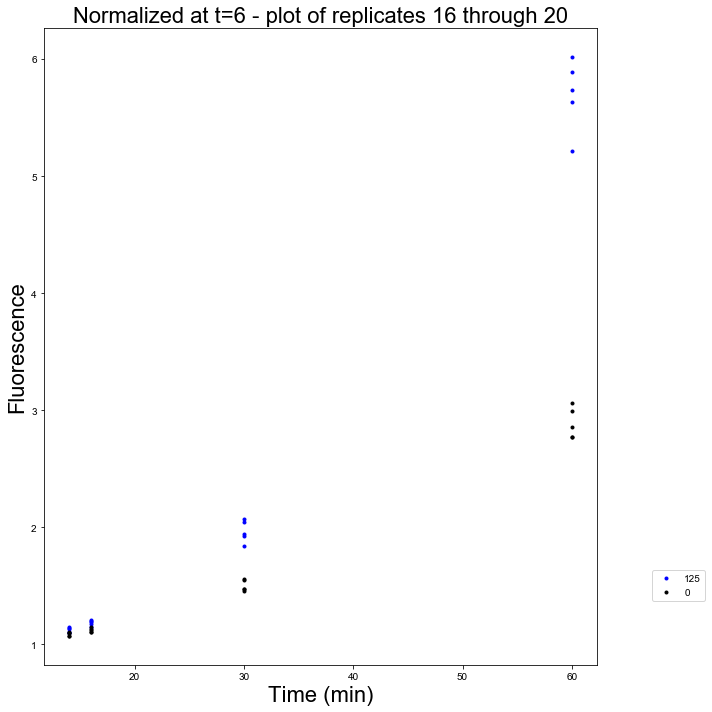

4
4
4
4
4
4
4
4
4
4
(40, 4)
Experimental probability shape
(4, 40)
Zero probability shape
(0,)
Experimental detected shape
[18 19 20 20]
[17 19 20 20]
[15 18 20 20]
dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '63 cp/µl-1', '63 cp/µl-2', '63 cp/µl-3', '63 cp/µl-4',
       '63 cp/µl-5', '63 cp/µl-6', '63 cp/µl-7', '63 cp/µl-8', '63 cp/µl-9',
       '63 cp/µl-10', '63 cp/µl-11', '63 cp/µl-12', '63 cp/µl-13',
       '63 cp/µl-14', '63 cp/µl-15', '63 cp/µl-16', '63 cp/µl-17',
       '63 cp/µl-18', '63 cp/µl-19', '63 cp/µl-20', '0 cp/µl-1', '0 cp/µl-2',
       '0 cp/µl-3', '0 cp/µl-4', '0 cp/µl-5', '0 cp/µl-6', '0 cp/µl-7',
       '0 cp/µl-8', '0 cp/µl-9', '0 cp/µl-10', '0 cp/µl-11', '0 cp/µl-12',
       '0 cp/µl-13', '0 cp/µl-14', '0 cp/µl-15', '0 cp/µl-16', '0 cp/µl-17',
       '0 cp/µl-18', '0 cp/µl-19', '0 cp/µl-20'],
      dtype='object')
Index(['Time (min)', '63 cp/µl-1', '63 cp/µl-2', '63 cp/µl-3', '63 cp/µl-4',
       '63 cp/µl-5', '63 cp/µl-6', '63 cp/µl-7', 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


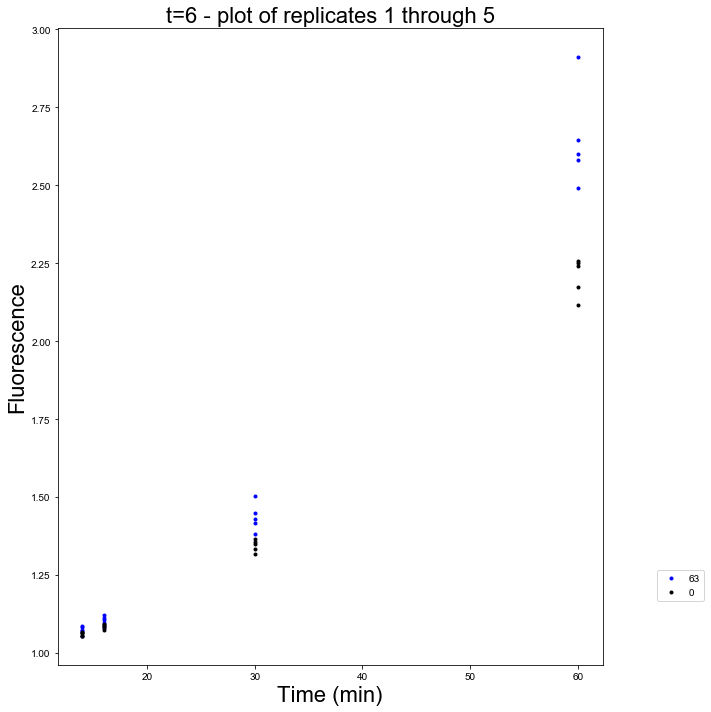

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['63 cp/µl-6', '63 cp/µl-7', '63 cp/µl-8', '63 cp/µl-9', '63 cp/µl-10'], dtype='object')
zero.columns: Index(['0 cp/µl-6', '0 cp/µl-7', '0 cp/µl-8', '0 cp/µl-9', '0 cp/µl-10'], dtype='object')


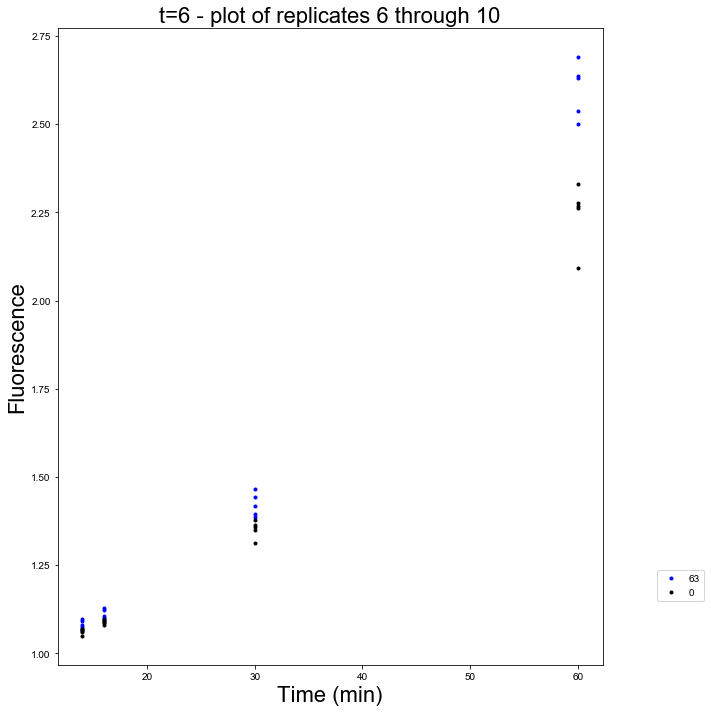

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['63 cp/µl-11', '63 cp/µl-12', '63 cp/µl-13', '63 cp/µl-14',
       '63 cp/µl-15'],
      dtype='object')
zero.columns: Index(['0 cp/µl-11', '0 cp/µl-12', '0 cp/µl-13', '0 cp/µl-14', '0 cp/µl-15'], dtype='object')


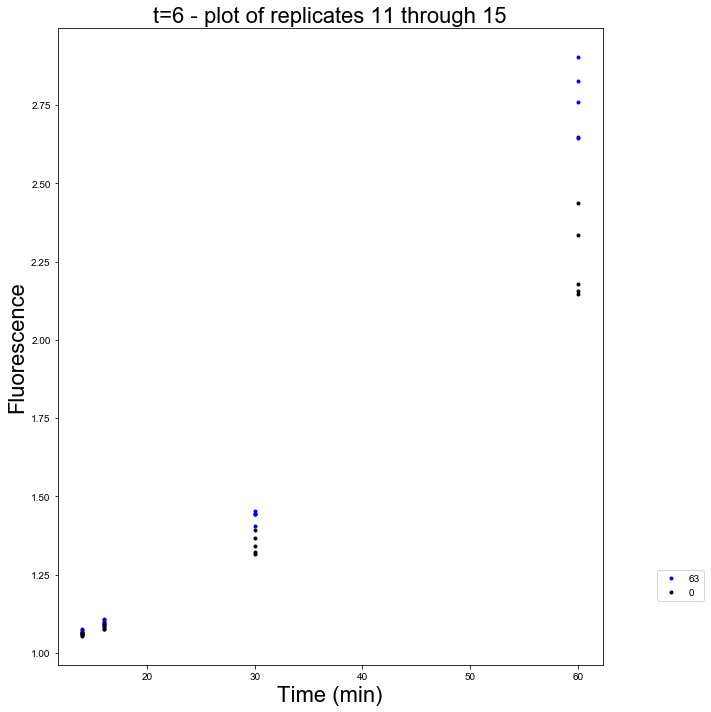

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['63 cp/µl-16', '63 cp/µl-17', '63 cp/µl-18', '63 cp/µl-19',
       '63 cp/µl-20'],
      dtype='object')
zero.columns: Index(['0 cp/µl-16', '0 cp/µl-17', '0 cp/µl-18', '0 cp/µl-19', '0 cp/µl-20'], dtype='object')


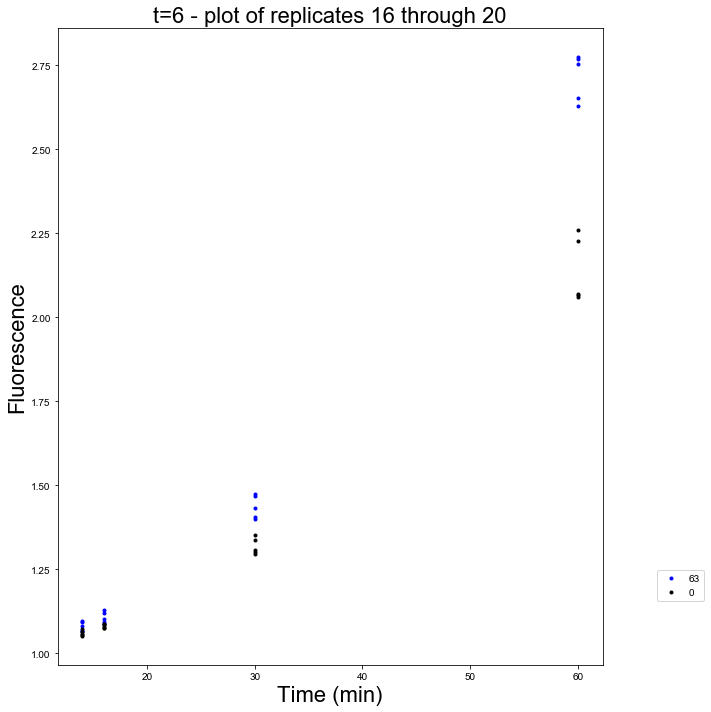

4
4
4
4
4
4
4
4
4
4
(40, 4)
Experimental probability shape
(4, 40)
Zero probability shape
(0,)
Experimental detected shape
[12 15 19 20]
[10 11 16 20]
[ 7  9 15 20]
dict_keys(['Raw data', 't=6'])
Working on: t=6
Index(['Time (min)', '15.6 cp/µl R1', '15.6 cp/µl R2', '15.6 cp/µl R3',
       '15.6 cp/µl R4', '15.6 cp/µl R5', '15.6 cp/µl R6', '15.6 cp/µl R7',
       '15.6 cp/µl R8', '15.6 cp/µl R9', '15.6 cp/µl R10', '15.6 cp/µl R11',
       '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14', '15.6 cp/µl R15',
       '15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20', '0 cp/µl R1', '0 cp/µl R2', '0 cp/µl R3',
       '0 cp/µl R4', '0 cp/µl R5', '0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8',
       '0 cp/µl R9', '0 cp/µl R10', '0 cp/µl R11', '0 cp/µl R12',
       '0 cp/µl R13', '0 cp/µl R14', '0 cp/µl R15', '0 cp/µl R16',
       '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19', '0 cp/µl R20',
       'Reporter-1', 'Reporter-2', 'Reporter-3'],
      dtype=

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


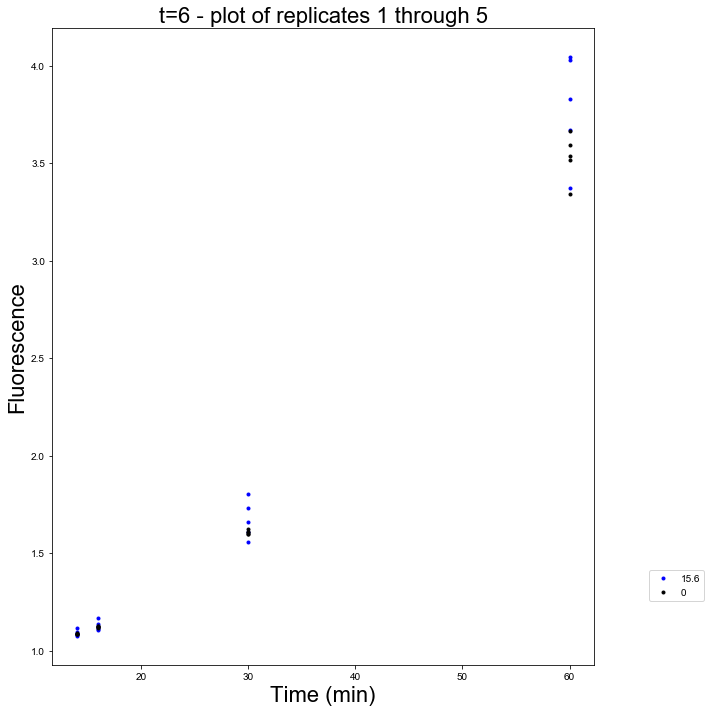

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['15.6 cp/µl R6', '15.6 cp/µl R7', '15.6 cp/µl R8', '15.6 cp/µl R9',
       '15.6 cp/µl R10'],
      dtype='object')
zero.columns: Index(['0 cp/µl R6', '0 cp/µl R7', '0 cp/µl R8', '0 cp/µl R9', '0 cp/µl R10'], dtype='object')


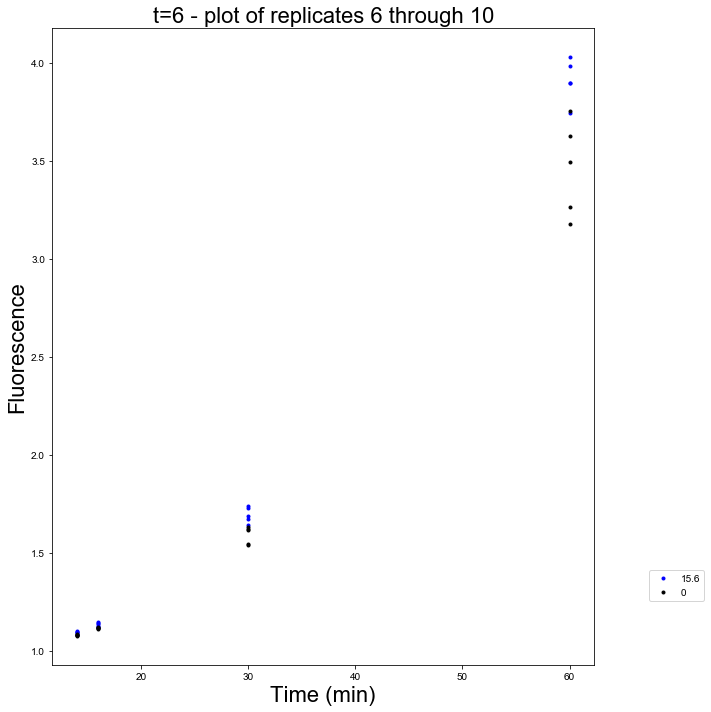

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['15.6 cp/µl R11', '15.6 cp/µl R12', '15.6 cp/µl R13', '15.6 cp/µl R14',
       '15.6 cp/µl R15'],
      dtype='object')
zero.columns: Index(['0 cp/µl R11', '0 cp/µl R12', '0 cp/µl R13', '0 cp/µl R14',
       '0 cp/µl R15'],
      dtype='object')


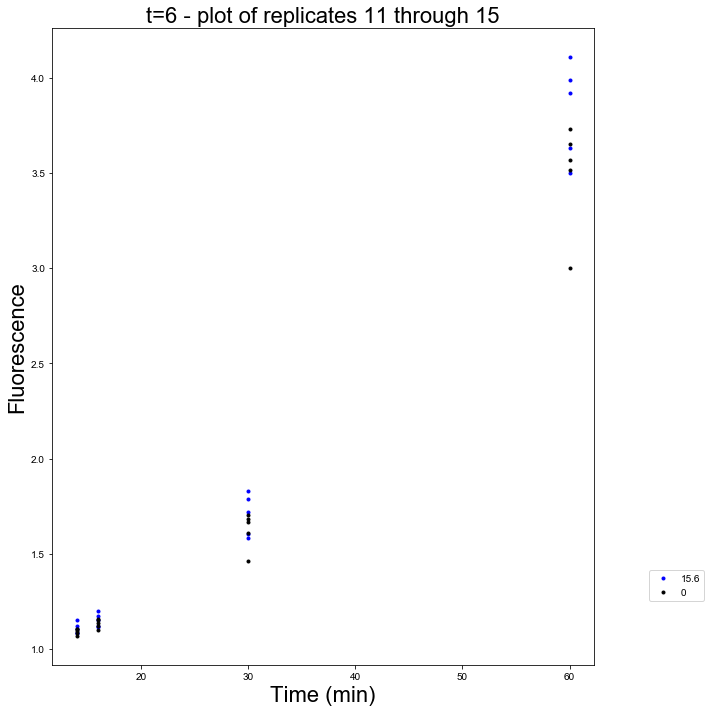

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['15.6 cp/µl R16', '15.6 cp/µl R17', '15.6 cp/µl R18', '15.6 cp/µl R19',
       '15.6 cp/µl R20'],
      dtype='object')
zero.columns: Index(['0 cp/µl R16', '0 cp/µl R17', '0 cp/µl R18', '0 cp/µl R19',
       '0 cp/µl R20'],
      dtype='object')


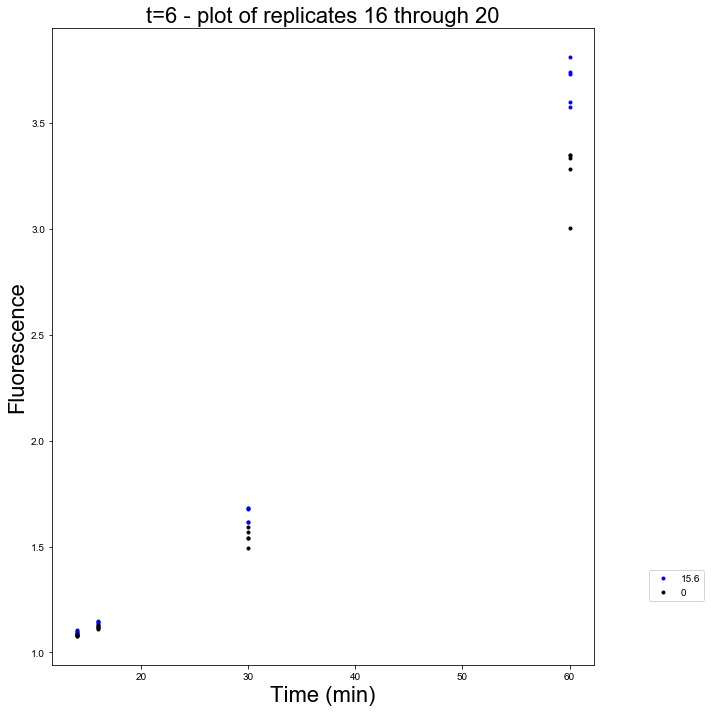

4
4
4
4
4
4
4
4
4
4
(40, 4)
Experimental probability shape
(4, 40)
Zero probability shape
(0,)
Experimental detected shape
[12 13 14 15]
[10 12 10 11]
[10 10  8  5]


In [24]:
%cd ~/Documents/berkeley/SavageLab/scripts/covid_diagnostics_modeling/tecantaloupe_distro/
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import itertools
from scipy import stats

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt
import matplotlib
from statsmodels.stats.multitest import multipletests


# Say, "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


main_text = './LOD/Reviewer/main_text/'
supplements = './LOD/Reviewer/Supplements/'

!mkdir ./LOD/Reviewer/
!mkdir ./LOD/Reviewer/main_text/
!mkdir ./LOD/Reviewer/Supplements/
!ls
print()
!ls ./LOD/Reviewer/


# time points only

def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
              experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    
    time_points = [14,16,30,60]
    if not plate_map:
        data = pd.read_excel(data_file,sheet_name=None,header = [0])
        print(data.keys())
        df = data[experiment]
        time = df.columns[[c.startswith('Time') for c in df.columns]][0]
        dat_cols = [c for c in df.columns if not c.startswith('Time')]
        
        indexing = df[time].astype('int')
        mask=[any(tup) for tup in zip(*[indexing==i for i in time_points])]
        print('Working on: '+experiment)
        print(df.columns)
    else:
        ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
        name_mapping = ps.well_to_name_mapping()
    #     display(ps.df)

        parser = SavageLabM1000Excel()
        timecourse = parser.ParseFromFilename(data_file)

        timecourse = timecourse.mean_by_name(ps)

        print(timecourse.labels())        
        print('Working on: '+experiment)
        fig = plt.figure(figsize=(10,10))
        df = timecourse.data_for_label(experiment)
        df.plot(x='time_s', legend=False)
        plt.ylabel(experiment)
        plt.title(experiment, fontsize=15)
        plt.show()
        time = timecourse.TIME_COL
        dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
    if norm_point:
        df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
        df = df.loc[norm_point:]
        print(df[time])
        indexing = df[time].astype('int')
        mask=[any(tup) for tup in zip(*[indexing==i*60 for i in time_points])]

    print(df.columns)
    
    
#     print(time_points)
#     print(df[time])
    
#     print(indexing)
    
    time_points = df[time][mask]
    print(time_points)
    
    probability = []
    zero_prob = []
    detected_05 = []
    detected_01 = []
    detected_001 = []
    z_detected_05 = []
    z_detected_01 = []
    z_detected_001 = []
    for start, end in [(1,5), (6,10),(11,15),(16,20)]:
        plt.figure(figsize=(10,10))
        replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]][mask]
        zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]][mask]
        print('replicate.columns: %s'%str(replicate.columns))
        print('zero.columns: %s'%str(zero.columns))
        lines_1 = plt.plot(time_points, replicate, 'b.')
        lines_3 = plt.plot(time_points, zero, 'k.')
        plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
        plt.xlabel(time, fontsize=22)
        plt.ylabel('Fluorescence', fontsize=22)
        plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
        plt.tight_layout()
        file= '_'.join((supplements+conc+' '+experiment+' - plot of replicates %s through %s'%(start, end)).split())
        plt.savefig(file+'.png',format='png')
        plt.savefig(file+'.svg',format='svg')
        plt.show()
        
        norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
                   scale=np.std(zero,axis=1).values.reshape(-1,1))
        
        pvals = norms.sf(replicate)
#         probability.append(pvals)
        
        z_pvals = norms.sf(zero)
#         zero_prob.append(z_pvals)
        
        for row in pvals.T:
            print(len(row))
            detected_05.append(row<=0.05)
            detected_01.append(row<=0.01)
            detected_001.append(row<=0.001)
            probability.append(row)
            
        for row in z_pvals.T:
            print(len(row))
            z_detected_05.append(row<=0.05)
            z_detected_01.append(row<=0.01)
            z_detected_001.append(row<=0.001)
            probability.append(row)
            
            
        
        
    print(np.array(probability).shape)
    
    print('Experimental probability shape')
    p = np.array(probability).T
    print(p.shape)
#     p=p.transpose(1,2,0)
#     print(p.shape)
#     p=p.reshape(p.shape[0],p.shape[1]*p.shape[2])
#     print(p.shape)
    
    print('Zero probability shape')
    zp = np.array(zero_prob).T
    print(zp.shape)
#     zp=zp.transpose(1,2,0)
#     print(p.shape)
#     zp=zp.reshape(zp.shape[0],zp.shape[1]*zp.shape[2])
#     print(zp.shape)
    
    print('Experimental detected shape')
    d_05 = sum(np.array(detected_05))
    d_01 = sum(np.array(detected_01))
    d_001 = sum(np.array(detected_001))
    
    print(d_05)
    print(d_01)
    print(d_001)
    return(d_05, d_01, d_001)

thresh_125  = run_tests()

thresh_62 = run_tests(data_file ='./LOD/2020-02-04 - 63 cp data.xlsx', conc = '63',
                                             experiment = 't=6', replicate_format=' cp/µl-')

thresh_15 = run_tests(data_file ='./LOD/2021-02-02 16 cp .xlsx', conc = '15.6',
                                             experiment = 't=6', replicate_format=' cp/µl R')

In [25]:
# def run_tests(window = 3, data_file ='./LOD/2020-02-02 125 cp (20x).xlsx', plate_map=None, conc = '125',
#               experiment = 'Normalized at t=6', replicate_format = ' cp/µl R', norm_point=None, plate_size=None):
    
#     time_points = [14,16,30,60,118]
#     if not plate_map:
#         data = pd.read_excel(data_file,sheet_name=None,header = [0])
#         print(data.keys())
#         df = data[experiment]
#         time = df.columns[[c.startswith('Time') for c in df.columns]][0]
#         dat_cols = [c for c in df.columns if not c.startswith('Time')]
        
#         indexing = df[time].astype('int')
#         mask=[any(tup) for tup in zip(*[indexing==i for i in time_points])]
#         print('Working on: '+experiment)
#         print(df.columns)
#     else:
#         ps = PlateSpec.FromFile(plate_map, plate_size=plate_size)
#         name_mapping = ps.well_to_name_mapping()
#     #     display(ps.df)

#         parser = SavageLabM1000Excel()
#         timecourse = parser.ParseFromFilename(data_file)

#         timecourse = timecourse.mean_by_name(ps)

#         print(timecourse.labels())        
#         print('Working on: '+experiment)
#         fig = plt.figure(figsize=(10,10))
#         df = timecourse.data_for_label(experiment)
#         df.plot(x='time_s', legend=False)
#         plt.ylabel(experiment)
#         plt.title(experiment, fontsize=15)
#         plt.show()
#         time = timecourse.TIME_COL
#         dat_cols = [c for c in df.columns if c not in timecourse.SPECIAL_COLS]
        
        
#     if norm_point:
#         df[dat_cols] = df[dat_cols]/df[dat_cols].loc[norm_point]
#         df = df.loc[norm_point:]
#         print(df[time])
#         indexing = df[time].astype('int')
#         mask=[any(tup) for tup in zip(*[indexing==i*60 for i in time_points])]

#     print(df.columns)
    
    
# #     print(time_points)
# #     print(df[time])
    
# #     print(indexing)
    
#     time_points = df[time][mask]
#     print(time_points)
    
#     probability = []
#     zero_prob = []
#     detected_05 = []
#     detected_01 = []
#     detected_001 = []
#     z_detected_05 = []
#     z_detected_01 = []
#     z_detected_001 = []
#     for start, end in [(1,5), (6,10),(11,15),(16,20)]:
#         plt.figure(figsize=(10,10))
#         replicate = df[[conc+replicate_format+str(i) for i in range(start, end+1)]][mask]
#         zero = df[['0'+replicate_format+str(i) for i in range(start, end+1)]][mask]
#         print('replicate.columns: %s'%str(replicate.columns))
#         print('zero.columns: %s'%str(zero.columns))
#         lines_1 = plt.plot(time_points, replicate, 'b.')
#         lines_3 = plt.plot(time_points, zero, 'k.')
#         plt.title(experiment+' - plot of replicates %s through %s'%(start, end), fontsize=22)
#         plt.xlabel(time, fontsize=22)
#         plt.ylabel('Fluorescence', fontsize=22)
#         plt.legend([lines_1[0],lines_3[0]],[conc,'0'],loc=(1.1,0.1))
#         plt.tight_layout()
#         file= '_'.join((supplements+conc+' '+experiment+' - plot of replicates %s through %s'%(start, end)).split())
#         plt.savefig(file+'.png',format='png')
#         plt.savefig(file+'.svg',format='svg')
#         plt.show()
        
#         norms = stats.norm(loc=np.mean(zero,axis=1).values.reshape(-1,1), 
#                    scale=np.std(zero,axis=1).values.reshape(-1,1))
        
#         pvals = norms.sf(replicate)
# #         probability.append(pvals)
        
#         z_pvals = norms.sf(zero)
# #         zero_prob.append(z_pvals)
        
#         print(pvals.shape)
#         for row in pvals.T:
#             print(len(row))
#             print(row)
#             detected_05.append(row<=0.05)
#             detected_01.append(row<=0.01)
#             detected_001.append(row<=0.001)
#             probability.append(row)
            
#         print(z_pvals.shape)
#         for row in z_pvals.T:
#             print(len(row))
#             print(row)
#             z_detected_05.append(row<=0.05)
#             z_detected_01.append(row<=0.01)
#             z_detected_001.append(row<=0.001)
#             probability.append(row)
            
            
        
        
#     print(np.array(probability).shape)
    
#     print('Experimental probability shape')
#     p = np.array(probability).T
#     print(p.shape)
# #     p=p.transpose(1,2,0)
# #     print(p.shape)
# #     p=p.reshape(p.shape[0],p.shape[1]*p.shape[2])
# #     print(p.shape)
    
#     print('Zero probability shape')
#     zp = np.array(zero_prob).T
#     print(zp.shape)
# #     zp=zp.transpose(1,2,0)
# #     print(p.shape)
# #     zp=zp.reshape(zp.shape[0],zp.shape[1]*zp.shape[2])
# #     print(zp.shape)
    
#     print('Experimental detected shape')
#     d_05 = sum(np.array(detected_05))
#     d_01 = sum(np.array(detected_01))
#     d_001 = sum(np.array(detected_001))
    
#     print(d_05)
#     print(d_01)
#     print(d_001)
#     return(d_05, d_01, d_001)

['csm gain 75', 'csm6 gain 55']
Working on: csm gain 75


<Figure size 720x720 with 0 Axes>

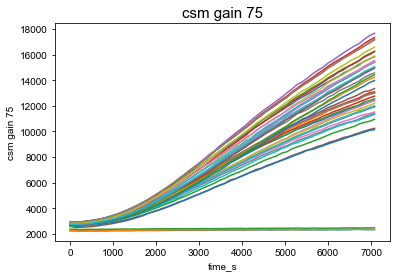

cycle_n
4      360.031
5      480.048
6      600.076
7      720.087
8      840.114
9      960.132
10    1080.141
11    1200.160
12    1320.182
13    1440.208
14    1560.225
15    1680.244
16    1800.267
17    1920.281
18    2040.306
19    2160.329
20    2280.351
21    2400.376
22    2520.398
23    2640.416
24    2760.429
25    2880.442
26    3000.449
27    3120.478
28    3240.499
29    3360.521
30    3480.534
31    3600.559
32    3720.573
33    3840.581
34    3960.599
35    4080.607
36    4200.617
37    4320.634
38    4440.656
39    4560.671
40    4680.691
41    4800.706
42    4920.720
43    5040.741
44    5160.762
45    5280.785
46    5400.798
47    5520.824
48    5640.836
49    5760.855
50    5880.875
51    6000.892
52    6120.913
53    6240.931
54    6360.946
55    6480.961
56    6600.981
57    6720.990
58    6841.005
59    6961.014
60    7081.021
Name: time_s, dtype: float64
Index(['0-R1', '0-R10', '0-R11', '0-R12', '0-R13', '0-R14', '0-R15', '0-R16',
       '0-R17', '0-R18', '0-R1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


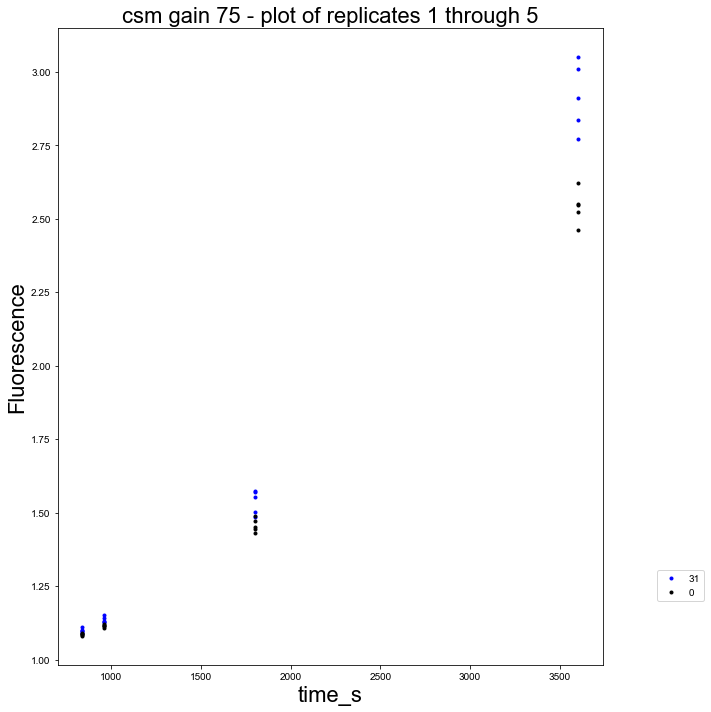

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['31-R6', '31-R7', '31-R8', '31-R9', '31-R10'], dtype='object', name='label')
zero.columns: Index(['0-R6', '0-R7', '0-R8', '0-R9', '0-R10'], dtype='object', name='label')


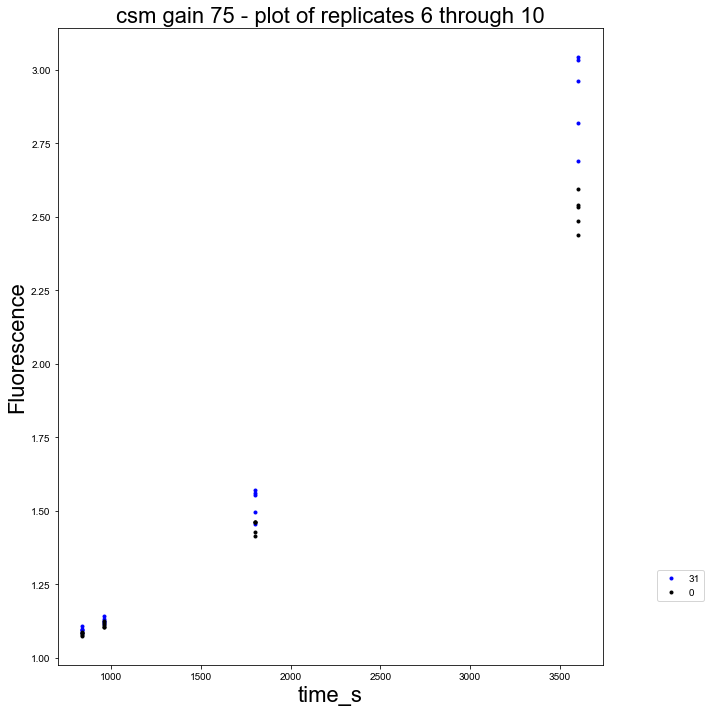

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['31-R11', '31-R12', '31-R13', '31-R14', '31-R15'], dtype='object', name='label')
zero.columns: Index(['0-R11', '0-R12', '0-R13', '0-R14', '0-R15'], dtype='object', name='label')


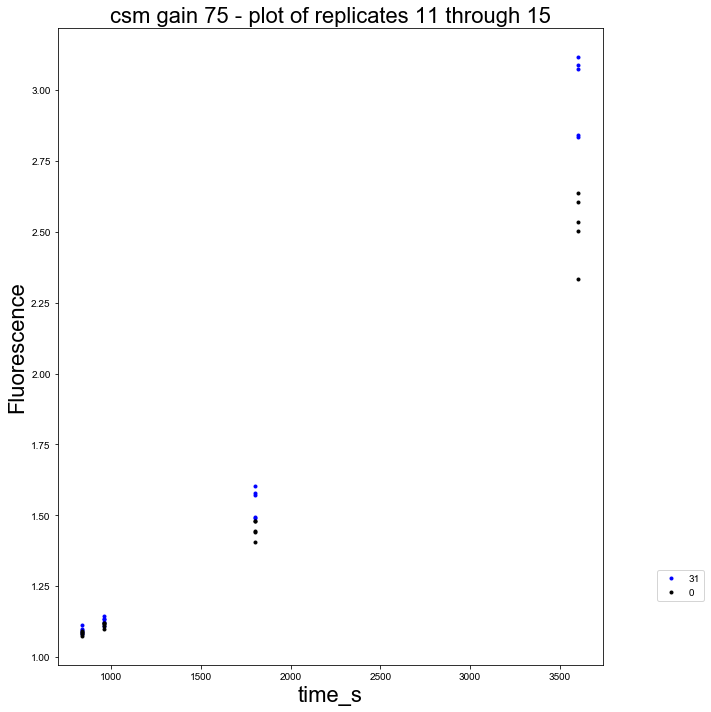

4
4
4
4
4
4
4
4
4
4
replicate.columns: Index(['31-R16', '31-R17', '31-R18', '31-R19', '31-R20'], dtype='object', name='label')
zero.columns: Index(['0-R16', '0-R17', '0-R18', '0-R19', '0-R20'], dtype='object', name='label')


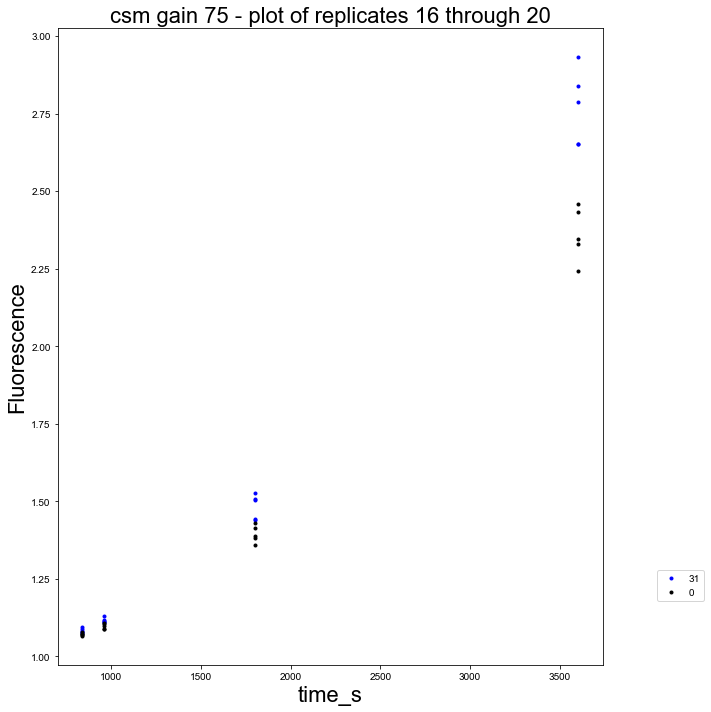

4
4
4
4
4
4
4
4
4
4
(40, 4)
Experimental probability shape
(4, 40)
Zero probability shape
(0,)
Experimental detected shape
[15 16 16 20]
[12 11 13 20]
[ 9  6 12 18]
[[[18 17 15]
  [19 19 18]
  [20 20 20]
  [20 20 20]]

 [[12 10  7]
  [15 11  9]
  [19 16 15]
  [20 20 20]]

 [[15 12  9]
  [16 11  6]
  [16 13 12]
  [20 20 18]]

 [[12 10 10]
  [13 12 10]
  [14 10  8]
  [15 11  5]]]
(4, 4, 3)
./LOD/Reviewer/main_text/Fraction_detected


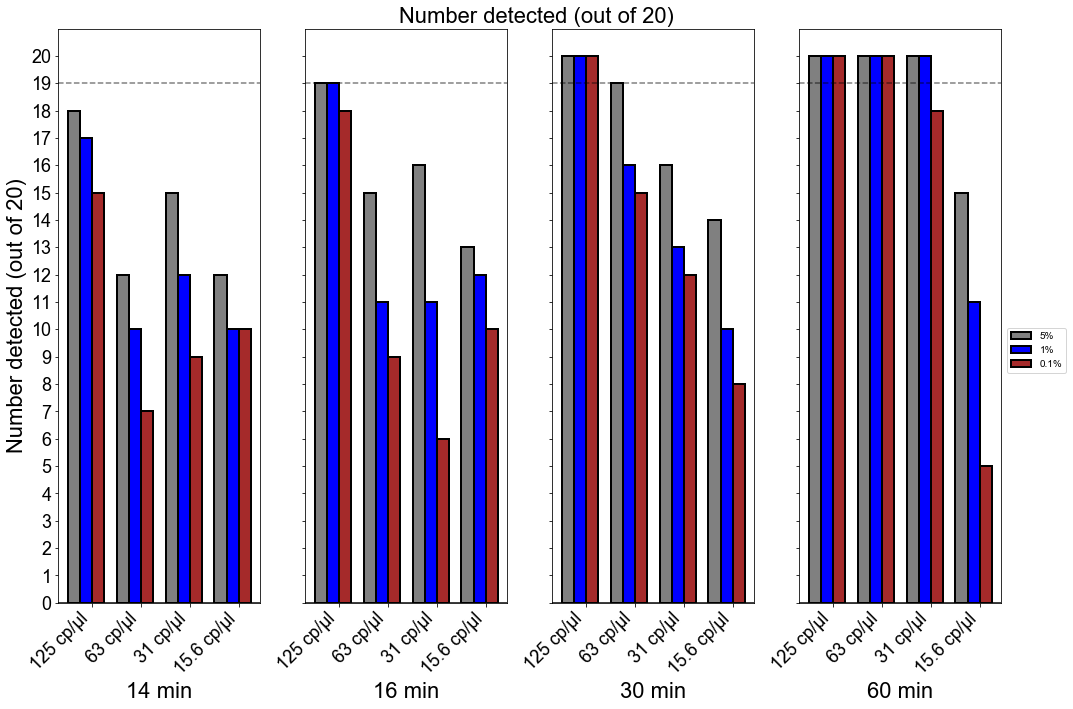

In [26]:
thresh_31 = run_tests(plate_size=384, 
                     plate_map = './growth/plate_specs/tecan_384w_platemap_20210504 31cp repeat.csv', 
                     data_file ='growth/data/Method_Csm6 TYL_20210504_31cp repeat.xlsx', 
                     conc = '31', norm_point = '4', experiment = 'csm gain 75',
                     replicate_format='-R')

n_det = np.array([np.array(thresh_125).T,
                 np.array(thresh_62).T,
                 np.array(thresh_31).T,
                 np.array(thresh_15).T])
print(n_det)
print(n_det.shape)

colors = ['grey', 'blue','brown','cyan','green']

n_subplots = n_det.shape[1]
n_conditions = n_det.shape[0]
n_threshes = n_det.shape[2]
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(15, 10))  # width, height

axes[0].set_ylabel('Number detected (out of 20)', fontsize=22)
fig.suptitle('Number detected (out of 20)',ha='center', fontsize=22)

axes[0].set_yticks(range(21))
axes[0].set_yticklabels(range(21),ha='right', fontsize=18)

for i in range(n_subplots):
    axes[i].axhline(y=0,c='k',ls='-',)
    axes[i].axhline(y=19,c='k',ls='--',alpha=0.5)
    axes[i].set_xticks(range(n_conditions))
    axes[i].set_xticklabels(['%s cp/µl'%(n) for n in ['125', '63', '31','15.6']],rotation=45, 
                            ha='right', fontsize=18)
    axes[i].set_xlabel([str(t)+' min' for t in [14,16,30,60,118]][i],horizontalalignment='center', fontsize=22)
    for j in range(n_conditions):
        bars = []
        for k in range(n_threshes):
            bars.append(axes[i].bar(j-(0.75/2)+0.25*k,n_det[j,i,k], color= colors[k],
                        width=0.25, edgecolor='k', linewidth=2))

plt.legend(bars,['5%', '1%', '0.1%'],loc=(1.03,0.4))

fig.tight_layout()
plt.subplots_adjust(top=0.95)

file= '_'.join((main_text+'Fraction detected').split())
print(file)
plt.savefig(file+'.png',format='png')
plt.savefig(file+'.svg',format='svg')
plt.show()

[[[18 17 15]
  [19 19 18]
  [20 20 20]
  [20 20 20]]

 [[12 10  7]
  [15 11  9]
  [19 16 15]
  [20 20 20]]

 [[15 12  9]
  [16 11  6]
  [16 13 12]
  [20 20 18]]

 [[12 10 10]
  [13 12 10]
  [14 10  8]
  [15 11  5]]]
(4, 4, 3)
./LOD/Reviewer/main_text/Fraction_detected


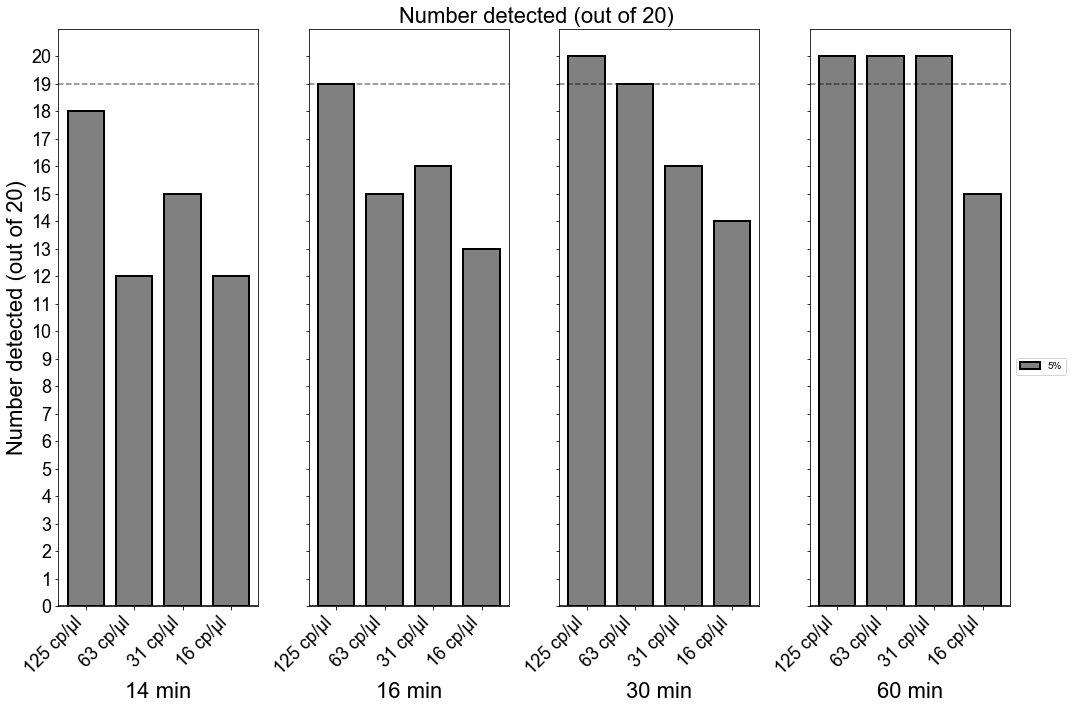

In [27]:
n_det = np.array([np.array(thresh_125).T,
                 np.array(thresh_62).T,
                 np.array(thresh_31).T,
                 np.array(thresh_15).T])
print(n_det)
print(n_det.shape)

colors = ['grey', 'blue','brown','cyan','green']

n_subplots = n_det.shape[1]
n_conditions = n_det.shape[0]
# n_threshes = n_det.shape[2]
n_threshes = 1
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(15, 10))  # width, height

axes[0].set_ylabel('Number detected (out of 20)', fontsize=22)
fig.suptitle('Number detected (out of 20)',ha='center', fontsize=22)

axes[0].set_yticks(range(21))
axes[0].set_yticklabels(range(21),ha='right', fontsize=18)

for i in range(n_subplots):
    axes[i].axhline(y=0,c='k',ls='-',)
    axes[i].axhline(y=19,c='k',ls='--',alpha=0.5)
    axes[i].set_xticks(range(n_conditions))
    axes[i].set_xticklabels(['%s cp/µl'%(n) for n in ['125', '63', '31','16']],rotation=45, 
                            ha='right', fontsize=18)
    axes[i].set_xlabel([str(t)+' min' for t in [14,16,30,60]][i],horizontalalignment='center', fontsize=22)
    for j in range(n_conditions):
        bars = []
        for k in range(n_threshes):
            bars.append(axes[i].bar(j,n_det[j,i,k], color= colors[k],
                        width=0.75, edgecolor='k', linewidth=2))

plt.legend(bars,['5%'],loc=(1.03,0.4))

fig.tight_layout()
plt.subplots_adjust(top=0.95)

file= '_'.join((main_text+'Fraction detected').split())
print(file)
plt.savefig(file+'.png',format='png')
plt.savefig(file+'.svg',format='svg')
plt.show()